In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from pickle import load

# import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

from Preprocessing import Preprocessing
pp = Preprocessing()

from TimeSeries_KMeans_Cluster import KMeans_Clustering

%load_ext autoreload
%autoreload 2
SAVE_PATH = './Data/한미연_도시유형화/'

## 0. 데이터 불러오기

In [2]:
## 인구구조 및 사회적 인구이동에 사용되는 데이터
total_population_2013_df = pd.read_excel('./Data/한미연_도시유형화/(pre) 행정구역(시군구)_인구_2012-2022.xlsx')
total_population_2013_df.drop(['2012 년'], axis= 1, inplace= True)
total_sum_population_2013_df = pp.population_split_age_range(total_population_2013_df, pp.age_range(0,100))

men_population_2013_df = pd.read_csv('./Data/한미연_도시유형화/행정구역_남자_전체.csv')
women_population_2013_df = pd.read_csv('./Data/한미연_도시유형화/행정구역_여자_전체.csv')

## 외국인구 비율 산출에 사용되는 데이터
total_population_2012_df = pd.read_excel('./Data/한미연_도시유형화/(pre) 행정구역(시군구)_인구_2012-2022.xlsx')
total_population_2012_df.drop(['2022 년'], axis= 1, inplace= True)
total_sum_population_2012_df = pp.population_split_age_range(total_population_2012_df, pp.age_range(0,100))

## 사회적 인구이동
social_move_df = pd.read_csv('./Data/한미연_도시유형화/행정구역_사회적이동_전체.csv')

## 외국인 인구
foreigner_df = pd.read_csv('./Data/한미연_도시유형화/행정구역_외국인_전체.csv')

## 1. 데이터전처리

* 인구구도 도시유형화 데이터

In [3]:
## 1. 유소년 및 학령인구(0세 ~ 19세)
child_age = pp.age_range(0, 19)
child_df = pp.population_split_age_range(total_population_2013_df, child_age)
child_rate_df = pp.population_rate(child_df, total_sum_population_2013_df)
child_rate_df = pp.MinMaxScaler_func(
    dataframe= child_rate_df, 
    title= '소아+학령인구비율',
    save_path= SAVE_PATH
)

## 2. 청년 및 핵심 가임연령 인구(20세 ~ 39세)
young_age = pp.age_range(20, 39)
young_df = pp.population_split_age_range(total_population_2013_df, young_age)

if 'check' in list(young_df.columns):
    young_df = young_df.drop(['check'], axis= 1)

young_rate_df = pp.population_rate(young_df, total_sum_population_2013_df)

if 'check' in list(young_rate_df.columns):
    young_rate_df = young_rate_df.drop(['check'], axis= 1)

young_rate_df = pp.MinMaxScaler_func(
    dataframe= young_rate_df, 
    # title= '가임연령인구비율',
    title= '청년가임인구 비율',
    save_path= SAVE_PATH
)

## 3. 양육 및 소비활력 인구(40세 ~ 59세)
prime_age = pp.age_range(40, 59)
prime_df = pp.population_split_age_range(total_population_2013_df, prime_age)

if 'check' in list(prime_df.columns):
    prime_df = prime_df.drop(['check'], axis= 1)

prime_rate_df = pp.population_rate(prime_df, total_sum_population_2013_df)

if 'check' in list(prime_rate_df.columns):
    prime_rate_df = prime_rate_df.drop(['check'], axis= 1)

prime_rate_df = pp.MinMaxScaler_func(
    dataframe= prime_rate_df, 
    # title= '소비활력인구비율',
    title= '소비활력인구 비율',
    save_path= SAVE_PATH
)

## 4. 고령인구(60세 ~ 74세)
# elder_age = pp.age_range(60, 74)
# elder_df = pp.population_split_age_range(total_population_2013_df, elder_age)
# elder_rate_df = pp.population_rate(elder_df, total_sum_population_2013_df)
# elder_rate_df = pp.MinMaxScaler_func(
#     dataframe= elder_rate_df, 
#     title= '고령인구비율',
#     save_path= SAVE_PATH
# )

## 5. 초고령인구(75세 이상)
# superaged_age = pp.age_range(75, 100)
# superaged_df = pp.population_split_age_range(total_population_2013_df, superaged_age)
# superaged_rate_df = pp.population_rate(superaged_df, total_sum_population_2013_df)
# superaged_rate_df = pp.MinMaxScaler_func(
#     dataframe= superaged_rate_df, 
#     title= '초고령인구비율',
#     save_path= SAVE_PATH
# )

## 6. 사회적인구(전입 - 전출)
social_move_rate_df = pp.population_rate(social_move_df, total_sum_population_2013_df, pre= 1000)
social_move_rate_df = pp.MinMaxScaler_func(
    dataframe= social_move_rate_df, 
    title= '사회적이동비율',
    save_path= SAVE_PATH
)

## 7. 외국인 인구
if 'check' in list(foreigner_df.columns):
    foreigner_df = foreigner_df.drop(['check'], axis= 1)

foreigner_rate_df = pp.population_rate(foreigner_df, total_sum_population_2012_df, pre= 1000)

if 'check' in list(foreigner_rate_df.columns):
    foreigner_rate_df = foreigner_rate_df.drop(['check'], axis= 1)

foreigner_rate_df = pp.MinMaxScaler_func(
    dataframe= foreigner_rate_df, 
    # title= '외국인인구비율',
    title= '외국인 비율',
    save_path= SAVE_PATH
)

In [4]:
foreigner_rate_df.columns

Index(['행정구역(시도)', '행정구역(시군구)별', '2012 년', '2013 년', '2014 년', '2015 년',
       '2016 년', '2017 년', '2018 년', '2019 년', '2020 년', '2021 년'],
      dtype='object')

* (행안부) 인구감소지역

In [5]:
## 1. 연평균인구증감율
pop_cagr_df = pd.read_excel('./Data/인구감소지역/(pre) 행정구역(시군구)_연평균인구증감율_2013-2022.xlsx')

## 2. 인구밀도
pop_density_df = pd.read_excel('./Data/인구감소지역/(pre) 행정구역(시군구)_인구밀도_2012-2022.xlsx')

## 3. 청년순이동률
pop_youngman_move_df = pd.read_excel('./Data/인구감소지역/(pre) 행정구역(시군구)_청년가임인구 순이동률_2012-2022.xlsx')

## 4. 고령화비율
pop_elder_df = pd.read_excel('./Data/인구감소지역/(pre) 행정구역(시군구)_고령인구 비율_2012-2022.xlsx')

## 5. 유소년비율
pop_boyhood_df = pd.read_excel('./Data/인구감소지역/(pre) 행정구역(시군구)_유소년인구 비율_2012-2022.xlsx')

## 6. 조출생률
pop_birth_df = pd.read_excel('./Data/인구감소지역/(pre) 행정구역(시군구)_조출생률_2012-2022.xlsx')

## 7. 재정자립도
finance_df = pd.read_excel('./Data/인구감소지역/(pre) 행정구역(시군구)_재정자립도_2012-2022.xlsx')

* 연령별 순이동률

In [6]:
pop_prime_move_df = pd.read_excel('./Data/인구감소지역/(pre) 행정구역(시군구)_소비활력인구 순이동률_2012-2022.xlsx')
pop_elder_move_df = pd.read_excel('./Data/인구감소지역/(pre) 행정구역(시군구)_고령화인구 순이동률_2012-2022.xlsx')
boyhood_move_df = pd.read_excel('./Data/인구감소지역/(pre) 행정구역(시군구)_유소년 순이동률_2012-2022.xlsx')
total_move_df = pd.read_excel('./Data/인구감소지역/(pre) 행정구역(시군구)_전체인구 순이동률_2012-2022.xlsx')

## 2. EDA 분석

In [7]:
analysis_dict = {
    # '소아+학령인구비율' : ['Child & Student Rate', 'Rate', child_rate_df],
    '청년가임인구 비율' : ['Childbearing Young Rate', 'Rate', young_rate_df],
    '소비활력인구 비율' : ['Prime & Consume Rate', 'Rate', prime_rate_df],
    # '고령인구비율' : ['Elder Rate', 'Rate', elder_rate_df],
    # '초고령인구비율' : ['Superaged Rate', 'Rate', superaged_rate_df],
    # '사회적이동비율' : ['Scocial Population Rate', 'Rate', social_move_rate_df],
    '외국인 비율' : ['Foreigner Rate', 'Rate', foreigner_rate_df],

    '연평균인구증감율' : ['Population CAGR', 'Rate', pop_cagr_df],
    '인구밀도' : ['Population Density', 'Rate', pop_density_df],
    '청년가임인구 순이동률' : ['Young Man Move', 'Rate', pop_youngman_move_df],
    '고령인구 비율' : ['Elder Rate', 'Rate', pop_elder_df],
    '유소년인구 비율' : ['Boyhood Rate', 'Rate', pop_boyhood_df],
    '조출생률' : ['Birth Rate', 'Rate', pop_birth_df],
    '재정자립도' : ['Foreigner Rate', 'Rate', finance_df],

    # '소비활력인구순이동률' : ['Prime & Consume Move', 'Rate', pop_prime_move_df],
    # '고령화인구순이동률' : ['Elder Move', 'Rate', pop_elder_move_df],
    # '유소년인구순이동률' : ['Boyhood Move', 'Rate', boyhood_move_df],
}

print("분석에 사용한 변수 개수: ", len(analysis_dict), "개")

분석에 사용한 변수 개수:  10 개


In [8]:
# analysis_dict = {
#     '조출생률' : ['Birth Rate', 'Rate', pop_birth_df],
#     '유소년인구 비율' : ['Boyhood Rate', 'Rate', pop_boyhood_df],
#     '청년가임인구 비율' : ['Childbearing Young Rate', 'Rate', young_rate_df],
#     '소비활력인구 비율' : ['Prime & Consume Rate', 'Rate', prime_rate_df],
#     '고령인구 비율' : ['Elder Rate', 'Rate', pop_elder_df],
#     '외국인 비율' : ['Foreigner Rate', 'Rate', foreigner_rate_df],

#     '연평균인구증감율' : ['Population CAGR', 'Rate', pop_cagr_df],
#     '인구밀도' : ['Population Density', 'Rate', pop_density_df],
#     '청년가임인구 순이동률' : ['Young Man Move', 'Rate', pop_youngman_move_df],
#     '재정자립도' : ['Foreigner Rate', 'Rate', finance_df],
# }

# print("분석에 사용한 변수 개수: ", len(analysis_dict), "개")

In [9]:
analysis_df = pd.DataFrame()

for key in analysis_dict.keys():
    analysis_df = pp.mk_analysis_dataframe(analysis_df, analysis_dict[key][-1], key)

In [10]:
for key in analysis_dict.keys():
    print(key, len(analysis_dict[key][-1].columns))

청년가임인구 비율 12
소비활력인구 비율 12
외국인 비율 12
연평균인구증감율 12
인구밀도 12
청년가임인구 순이동률 12
고령인구 비율 12
유소년인구 비율 12
조출생률 12
재정자립도 12


In [11]:
## 모든 변수에 대한 상관관계분석
corr_df = pd.DataFrame()

for i, key in enumerate(analysis_dict.keys()):
    tmp_df = pd.Series(analysis_dict[key][-1].drop(['행정구역(시도)', '행정구역(시군구)별'], axis= 1).mean(), name= key).to_frame()

    if i == 0:
        corr_df = tmp_df

    else:
        corr_df = pd.concat([corr_df, tmp_df], axis= 1)

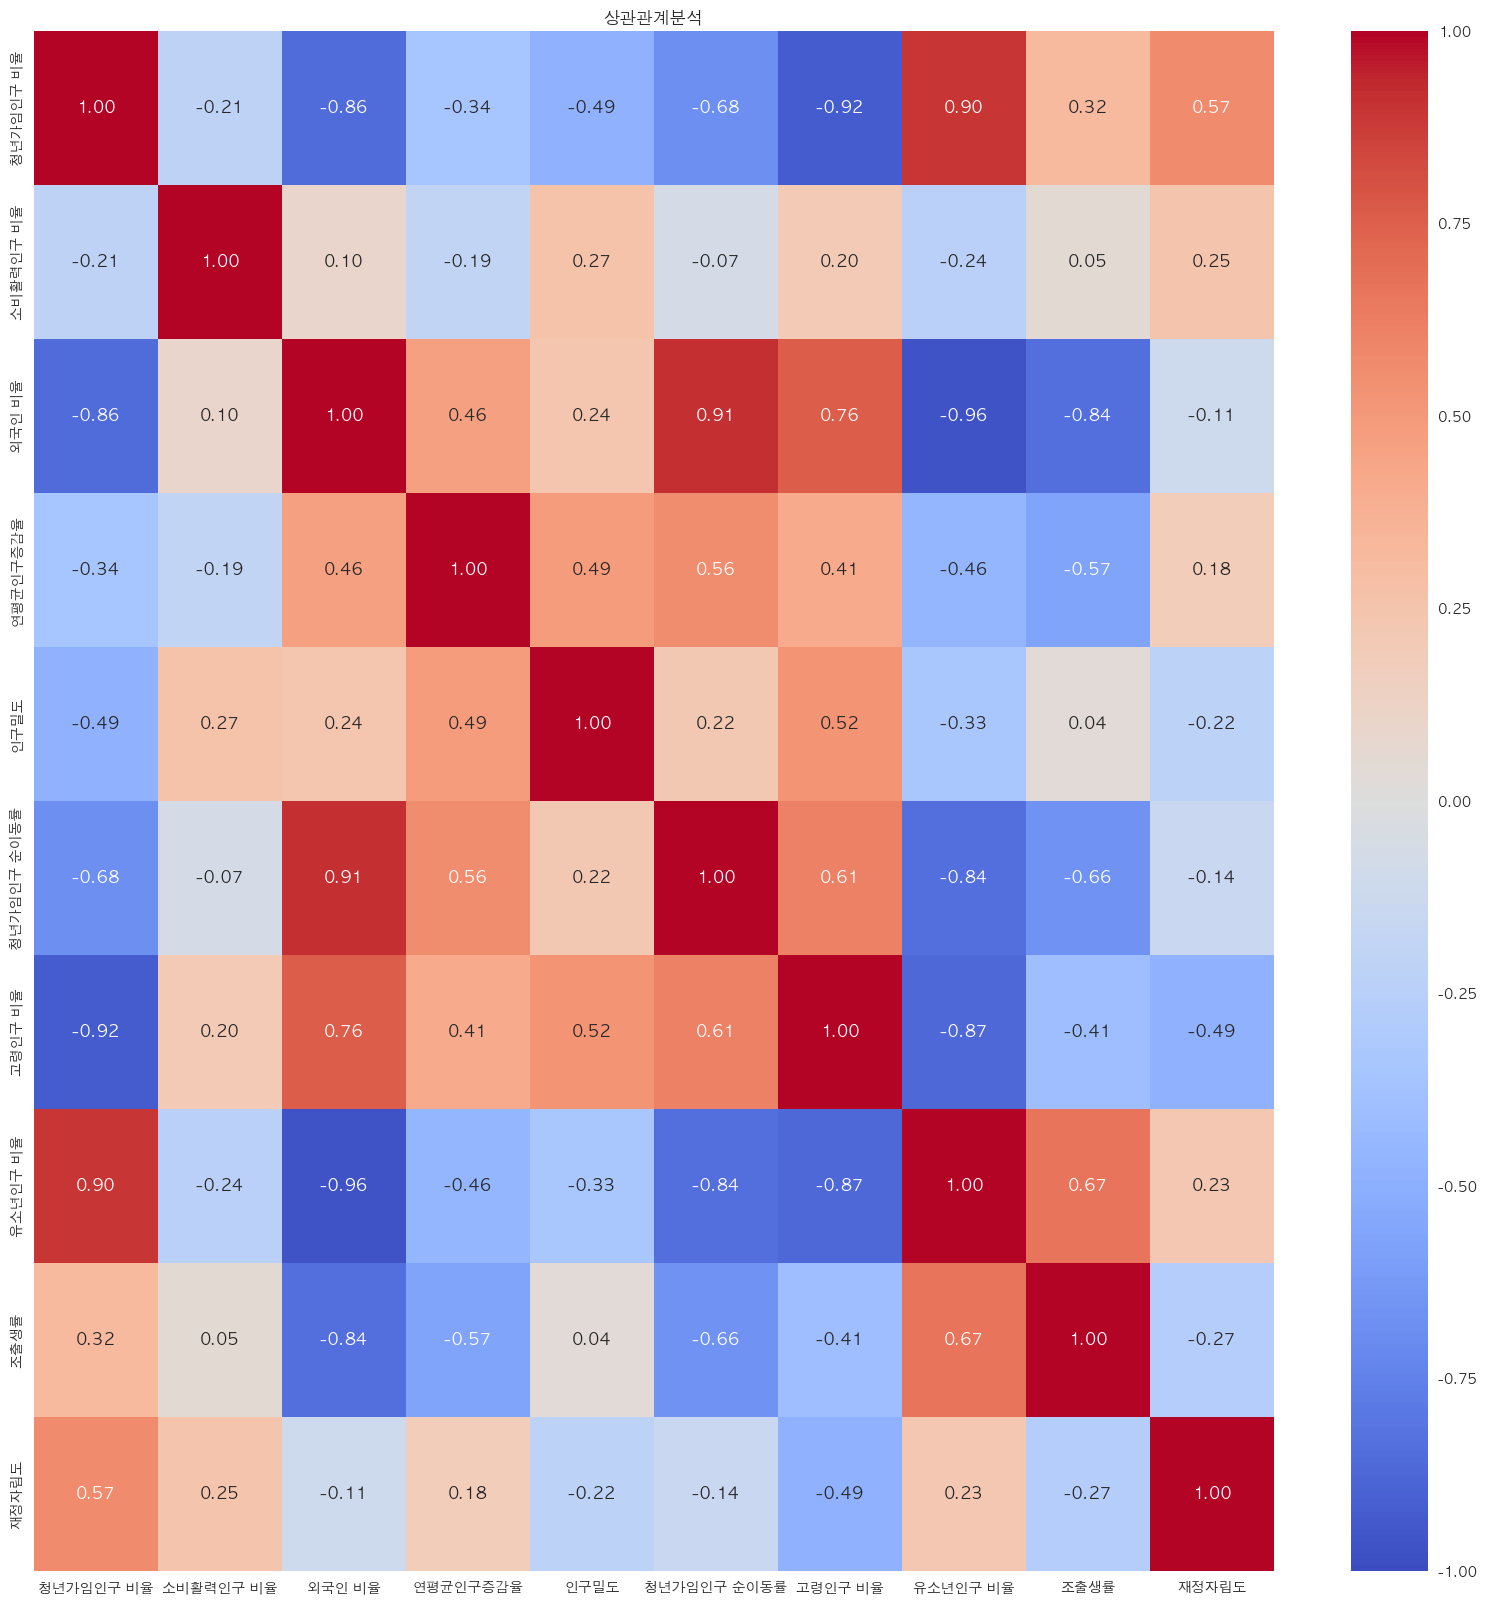

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    data= corr_df.corr(method= 'pearson'),
    annot = True,
    fmt = '.2f',
    vmin= -1, vmax= 1,
    cmap= 'coolwarm'
)
plt.title('상관관계분석')
plt.savefig(SAVE_PATH + '분석변수 상관관계결과.png')

## 3. K-Means Cluster

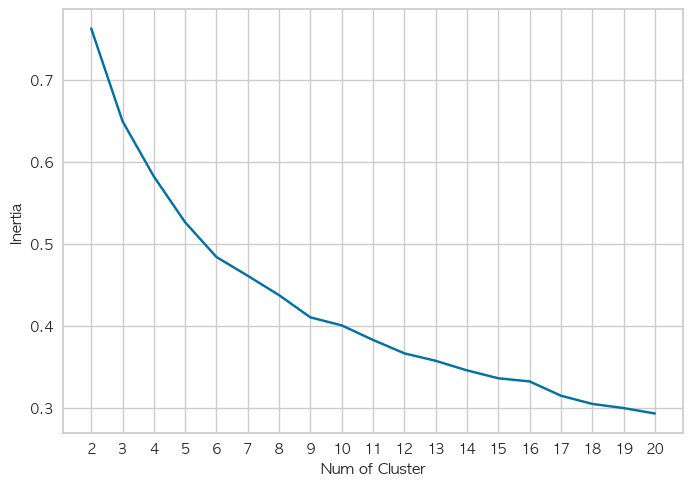

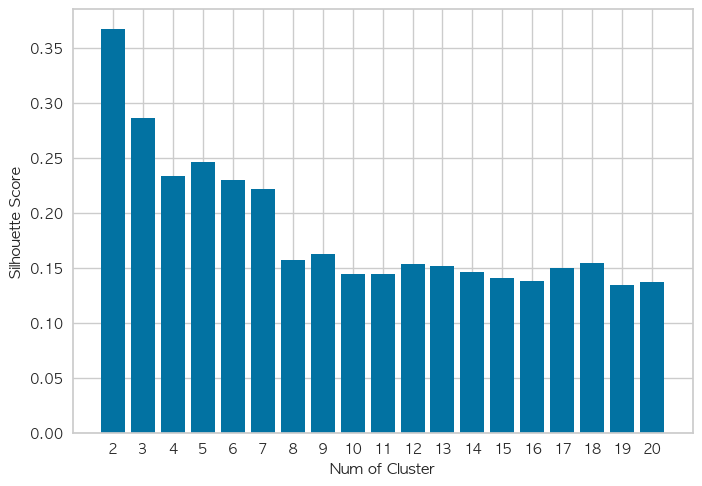

In [13]:
kmeans = KMeans_Clustering(
    timeseries_data= analysis_df,
    analysis_columns_dict= analysis_dict,
    save_path= './img/한미연+인구감소지역/',
    total_dataframe= total_population_2013_df,
    men_dataframe= men_population_2013_df,
    women_dataframe= women_population_2013_df
)
kmeans.find_best_K(metric= 'dtw')
kmeans.find_best_K_vis()

#### 최적의 K 선택

229


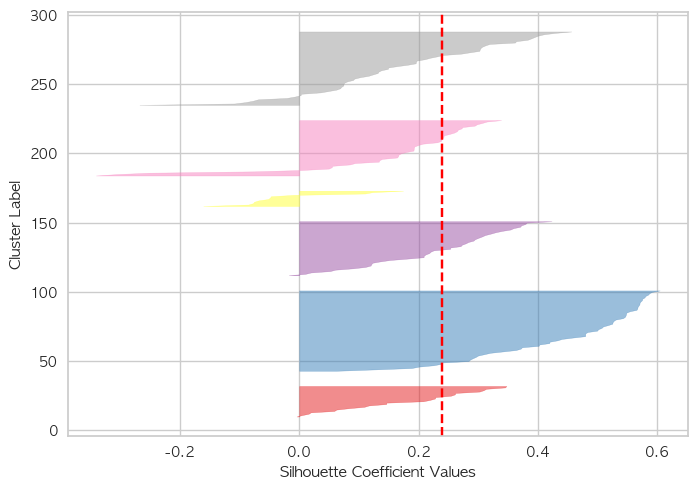

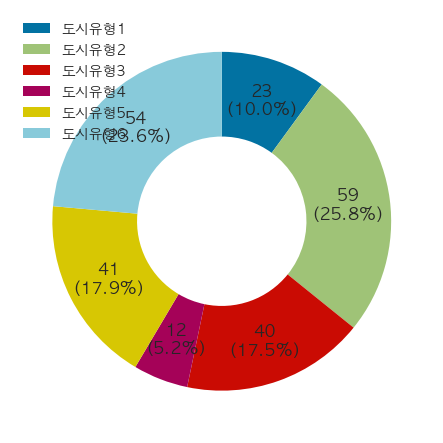

In [14]:
best_k = 6
kmeans.best_K_vis(best_k)

* 중심점까지의 거리측정(대표도시 선정)

In [15]:
mid_distance = pd.DataFrame()
distance = kmeans.distance_centroid()
for k in range(1 , best_k + 1):
    tmp_distace_min_df = distance[distance['Cluster Pred'] == k]
    tmp_distace_min_df = tmp_distace_min_df.sort_values('distance')
    tmp_distace_min_df['distance'] = tmp_distace_min_df['distance'].apply(lambda x: np.round(x, 3))
    tmp_distace_min_df = tmp_distace_min_df.head(3)

    mid_distance = pd.concat([mid_distance, tmp_distace_min_df], axis= 0)
    
mid_distance.to_excel(SAVE_PATH + '중심점 최소거리 Top3.xlsx', index= False)
mid_distance

행정구역(시도) 행정구역(시군구)별  Cluster Pred  distance
102    대구광역시         중구             1     0.979
137    서울특별시       서대문구             1     1.230
135    서울특별시        동작구             1     1.237
65      경상남도        함양군             2     0.523
192     전라북도        부안군             2     0.561
209     충청남도        부여군             2     0.582
26       경기도       남양주시             3     0.641
57      경상남도        양산시             3     0.748
61      경상남도        창원시             3     0.755
108    부산광역시        강서구             4     1.275
149  세종특별자치시    세종특별자치시             4     1.862
146    서울특별시        종로구             4     1.883
158    인천광역시         동구             5     0.653
111    부산광역시         남구             5     0.840
117    부산광역시        사하구             5     0.913
228     충청북도        충주시             6     0.611
68      경상북도        경주시             6     0.628
224     충청북도        제천시             6     0.636

In [16]:
max_distance = pd.DataFrame()
distance = kmeans.distance_centroid()
for k in range(1 , best_k + 1):
    tmp_distace_min_df = distance[distance['Cluster Pred'] == k]
    tmp_distace_min_df = tmp_distace_min_df.sort_values('distance')
    tmp_distace_min_df['distance'] = tmp_distace_min_df['distance'].apply(lambda x: np.round(x, 3))
    tmp_distace_min_df = tmp_distace_min_df.tail(3)

    max_distance = pd.concat([max_distance, tmp_distace_min_df], axis= 0)
    
max_distance.to_excel(SAVE_PATH + '중심점 최대거리 Top3.xlsx', index= False)
max_distance

행정구역(시도) 행정구역(시군구)별  Cluster Pred  distance
130    서울특별시        구로구             1     1.914
159    인천광역시       미추홀구             1     1.918
143    서울특별시       영등포구             1     2.186
185     전라남도        해남군             2     1.401
82      경상북도        예천군             2     1.588
178     전라남도        영광군             2     1.819
110    부산광역시        기장군             3     1.668
39       경기도        오산시             3     1.723
31       경기도        시흥시             3     1.885
124    서울특별시        강남구             4     2.424
34       경기도        안양시             4     2.460
20       경기도        과천시             4     2.897
5    강원특별자치도        양구군             5     2.133
9    강원특별자치도        인제군             5     2.195
16   강원특별자치도        화천군             5     2.263
225     충청북도        증평군             6     1.552
14   강원특별자치도        평창군             6     1.627
83      경상북도        울릉군             6     1.828

* 행안부 인구감소지역과 유사도 분석

In [17]:
pred_df = kmeans.pred_result()
pred_df = pred_df[['행정구역(시도)', '행정구역(시군구)별', 'Cluster Pred']]

haengan_df = pd.read_excel('./Data/02Map/행정구역_인구감소지역_전체.xlsx')
haengan_df = haengan_df[['행정구역(시도)', '행정구역(시군구)별', '인구감소지역']]
haengan_df = pred_df.merge(haengan_df, on= ['행정구역(시도)', '행정구역(시군구)별'], how= 'inner')

print('행안부 인구감소지역:', len(haengan_df), '개')
print('도시유형화 분석:', len(pred_df), '개')

similarity_list = list()
haengan_num_cluster = len(haengan_df[haengan_df.columns[-1]].value_counts().index)

for k in range(best_k):
    tmp_list = list()
    for n in range(haengan_num_cluster):
        tmp_haengan = haengan_df[haengan_df[haengan_df.columns[-1]] == n]
        tmp_pred = pred_df[pred_df['Cluster Pred'] == k+1]
        tmp_similarity = tmp_pred.merge(tmp_haengan, on= ['행정구역(시도)', '행정구역(시군구)별'], how= 'inner')

        percent = np.round(len(tmp_similarity) / len(tmp_haengan) * 100, 2)
        count = len(tmp_similarity)

        tmp_list.append('{}% ({})'.format(percent, count))
    similarity_list.append(tmp_list)

similarity_df = pd.DataFrame(similarity_list, columns= ['인구감소지역', '관심지역', '그 외 지역'], index=['도시유형{}'.format(x) for x in range(1, best_k + 1)])
similarity_df.to_excel(SAVE_PATH + '인구감소지역과 비교.xlsx', index= False)
similarity_df

행안부 인구감소지역: 229 개
도시유형화 분석: 229 개


인구감소지역         관심지역       그 외 지역
도시유형1     0.0% (0)    5.56% (1)  18.03% (22)
도시유형2  65.17% (58)     0.0% (0)    0.82% (1)
도시유형3     0.0% (0)     0.0% (0)  32.79% (40)
도시유형4     0.0% (0)     0.0% (0)   9.84% (12)
도시유형5    7.87% (7)   38.89% (7)  22.13% (27)
도시유형6  26.97% (24)  55.56% (10)  16.39% (20)

In [18]:
urban_short_name = {
    '전라북도' : '전북',
    '전라남도' : '전남',
    '충청북도' : '충북',
    '충청남도' : '충남',
    '강원특별자치도' : '강원',
    '경상북도' : '경북',
    '경상남도' : '경남',
    '제주특별자치도' : '제주',
    '경기도' : '경기',
    '서울특별시' : '서울',
    '부산광역시' : '부산',
    '인천광역시' : '인천',
    '대구광역시' : '대구',
    '대전광역시' : '대전',
    '광주광역시' : '광주',
    '울산광역시' : '울산',
    '세종특별자치시' : '세종'
}

In [19]:
len(urban_short_name.keys())

17

In [20]:
new_pred_df = pred_df.copy()
new_pred_df['n_행정구역(시도)'] = new_pred_df['행정구역(시도)'].apply(lambda x: urban_short_name[x])
new_pred_df['n_행정구역(시군구)별'] = new_pred_df['행정구역(시군구)별'].apply(lambda x: urban_short_name[x] if x in urban_short_name.keys() else x)
new_pred_df['도시명'] = new_pred_df[['n_행정구역(시도)', 'n_행정구역(시군구)별']].apply(lambda x: x[1] + "(" + x[0] + ")", axis= 1)

for k in range(1, best_k + 1):
    tmp_pred_df = new_pred_df[new_pred_df['Cluster Pred'] == k]
    tmp_pred_urban_list = tmp_pred_df['도시명'].values
    tmp_urban = ""
    for urban in tmp_pred_urban_list:
       if len(tmp_urban) > 0:
        tmp_urban = tmp_urban + ',' + urban

       else:
          tmp_urban = urban
    
    print('도시유형', k)
    print(tmp_urban)

도시유형 1
부천시(경기),중구(대구),부산진구(부산),수영구(부산),강동구(서울),강서구(서울),관악구(서울),광진구(서울),구로구(서울),금천구(서울),동대문구(서울),동작구(서울),마포구(서울),서대문구(서울),성동구(서울),성북구(서울),송파구(서울),영등포구(서울),용산구(서울),은평구(서울),중랑구(서울),미추홀구(인천),부평구(인천)
도시유형 2
고성군(강원),영월군(강원),횡성군(강원),거창군(경남),고성군(경남),남해군(경남),산청군(경남),의령군(경남),창녕군(경남),하동군(경남),함양군(경남),합천군(경남),고령군(경북),군위군(경북),문경시(경북),봉화군(경북),상주시(경북),성주군(경북),영덕군(경북),영양군(경북),예천군(경북),의성군(경북),청도군(경북),청송군(경북),강화군(인천),강진군(전남),고흥군(전남),곡성군(전남),구례군(전남),담양군(전남),보성군(전남),신안군(전남),영광군(전남),완도군(전남),장성군(전남),장흥군(전남),진도군(전남),함평군(전남),해남군(전남),고창군(전북),김제시(전북),남원시(전북),무주군(전북),부안군(전북),순창군(전북),임실군(전북),장수군(전북),진안군(전북),금산군(충남),부여군(충남),서천군(충남),예산군(충남),청양군(충남),태안군(충남),괴산군(충북),단양군(충북),보은군(충북),영동군(충북),옥천군(충북)
도시유형 3
원주시(강원),고양시(경기),광명시(경기),광주시(경기),구리시(경기),군포시(경기),김포시(경기),남양주시(경기),시흥시(경기),안산시(경기),양주시(경기),오산시(경기),용인시(경기),의왕시(경기),이천시(경기),파주시(경기),평택시(경기),거제시(경남),김해시(경남),양산시(경남),창원시(경남),경산시(경북),구미시(경북),칠곡군(경북),광산구(광주),달성군(대구),유성구(대전),기장군(부산),동구(울산),북구(울산),울주군(울산),서구(인천),연수구(인천),중구(인천),광양시(전남),제주시(제주),계룡시(충남),아산시(충남),천안시(충남),청주시(충북)
도시

In [21]:
new_pred_df['n_행정구역(시군구)별'].value_counts()

n_행정구역(시군구)별
중구     6
동구     6
서구     5
북구     4
남구     4
      ..
구미시    1
군위군    1
김천시    1
문경시    1
충주시    1
Name: count, Length: 207, dtype: int64

* 2022년 인구피라미드

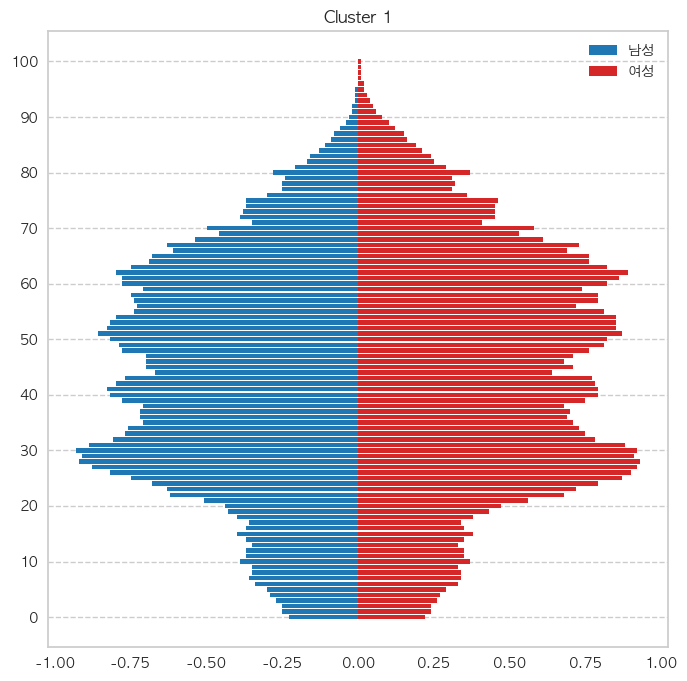

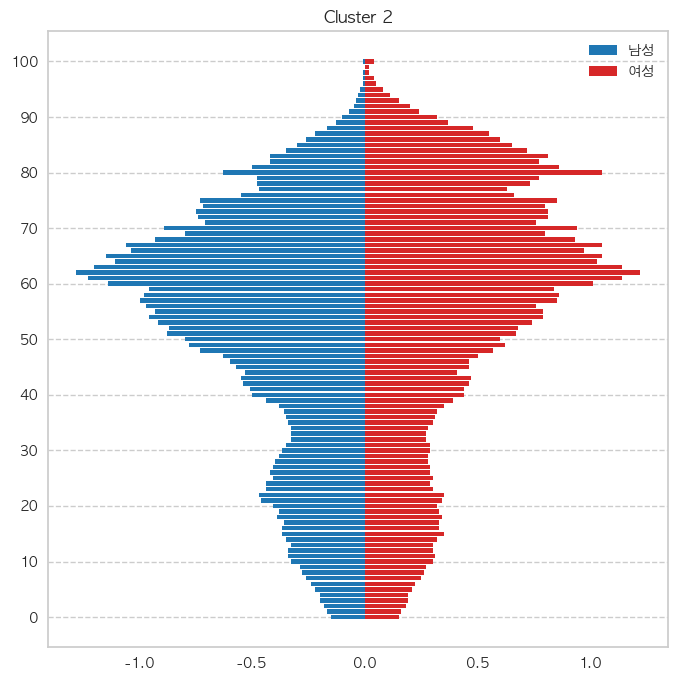

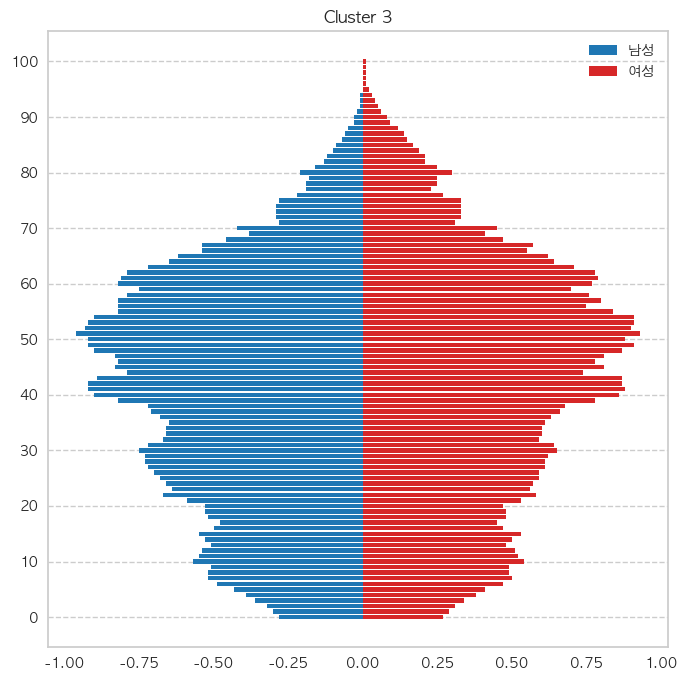

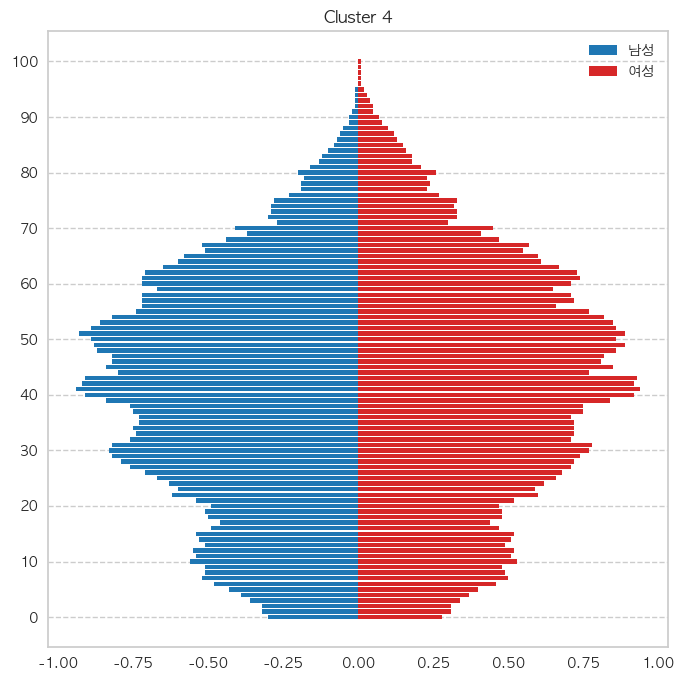

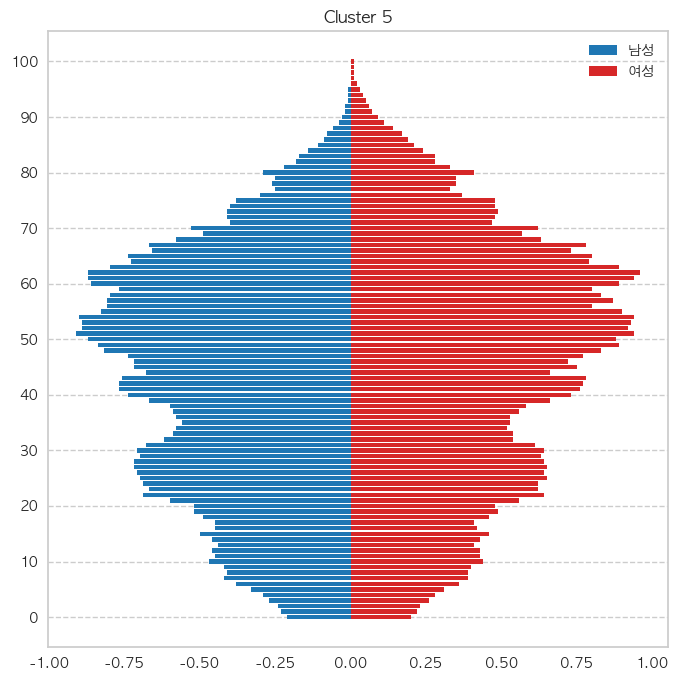

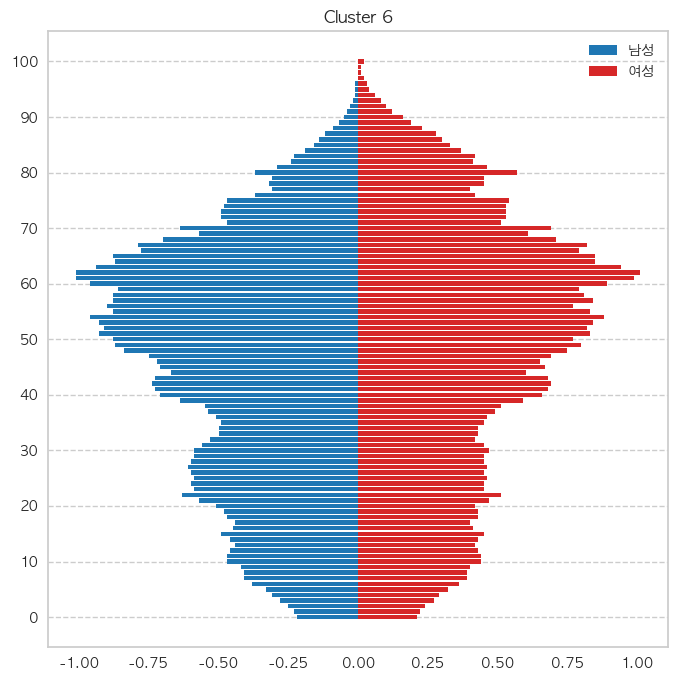

In [22]:
for k in range(1, best_k + 1):
    kmeans.population_pyramid_vis(year= 2022, cluster= k)

* 2017년 인구피라미드

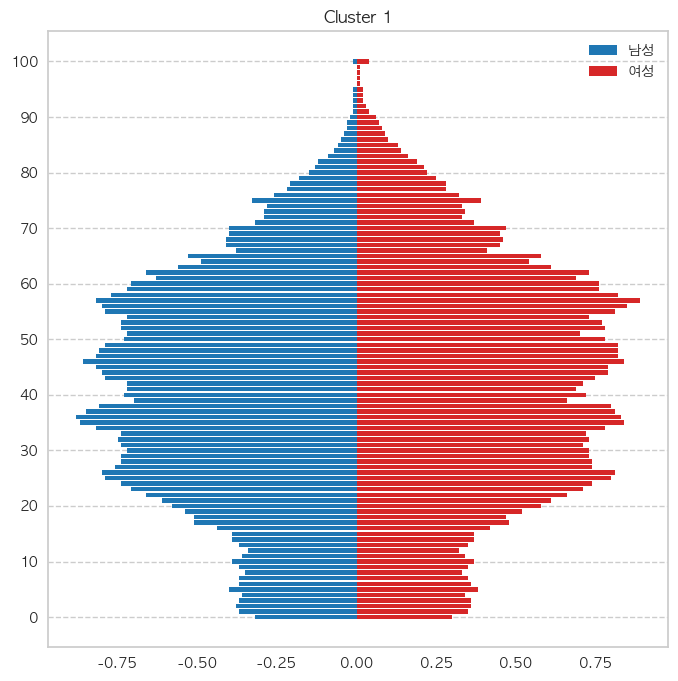

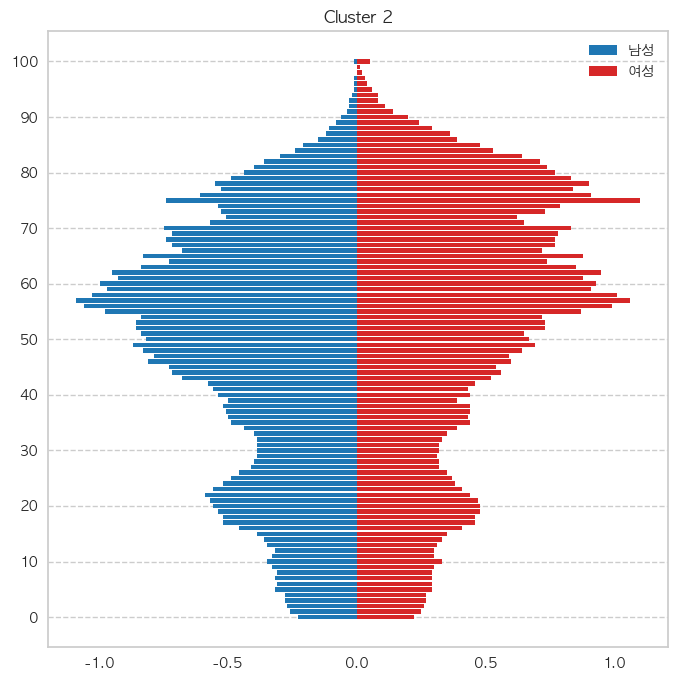

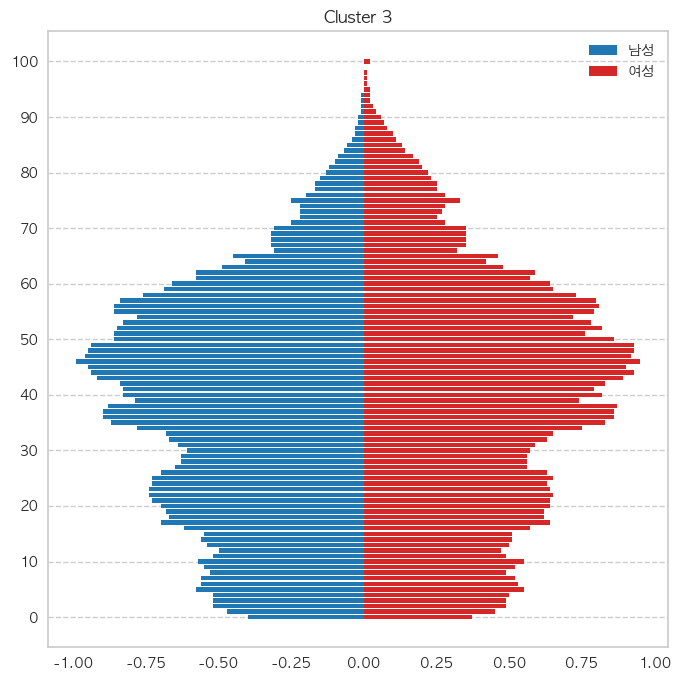

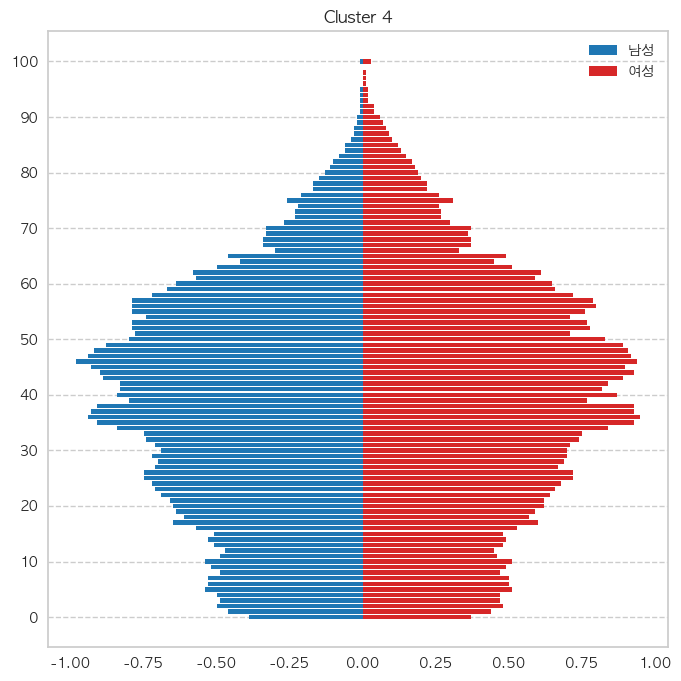

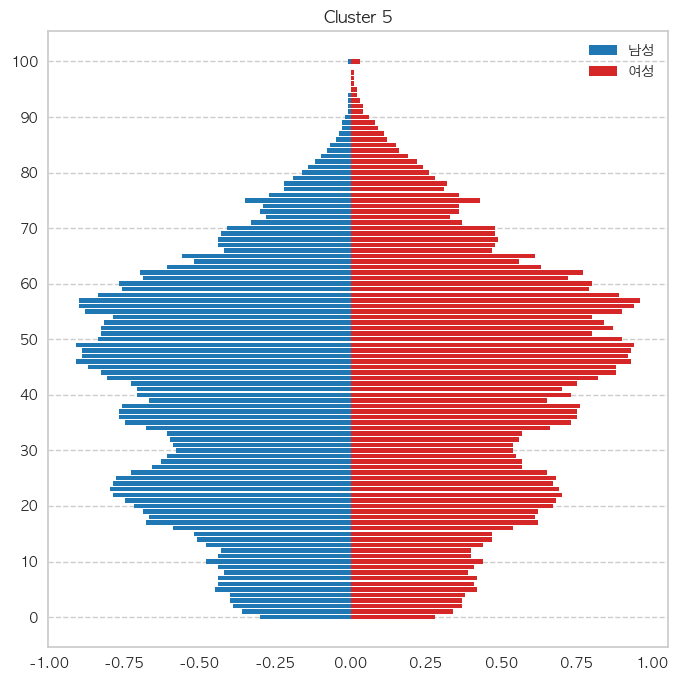

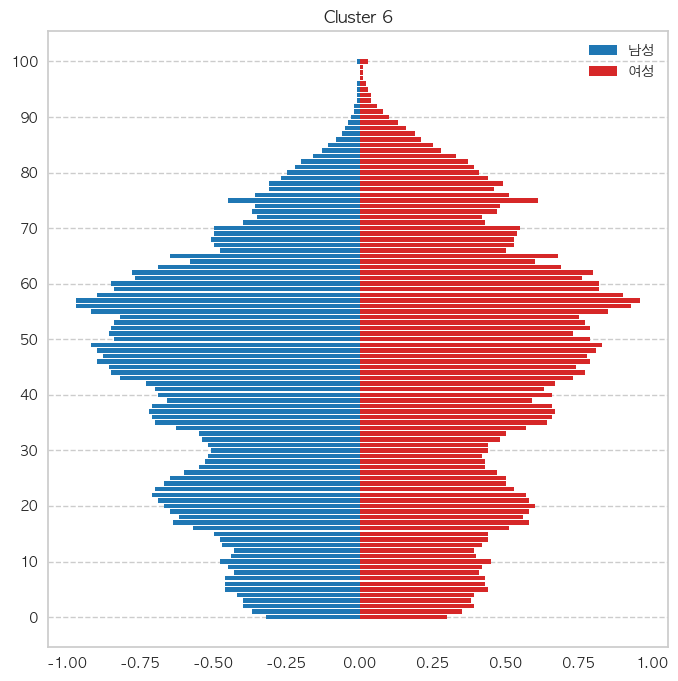

In [23]:
for k in range(1, best_k + 1):
    kmeans.population_pyramid_vis(year= 2017, cluster= k)

* 2013년 인구피라미드

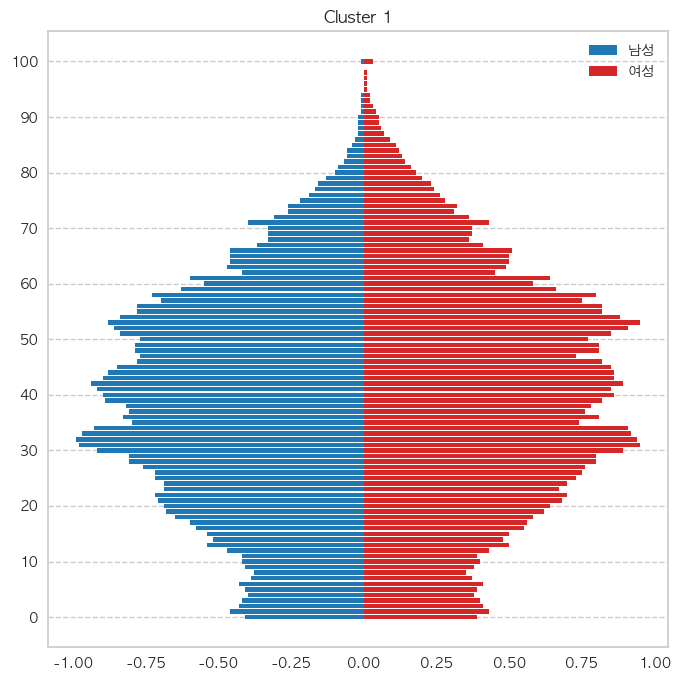

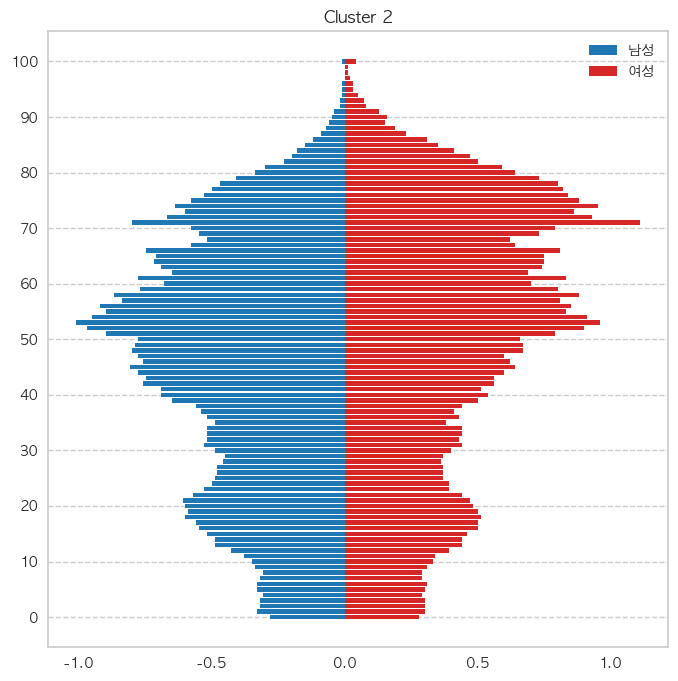

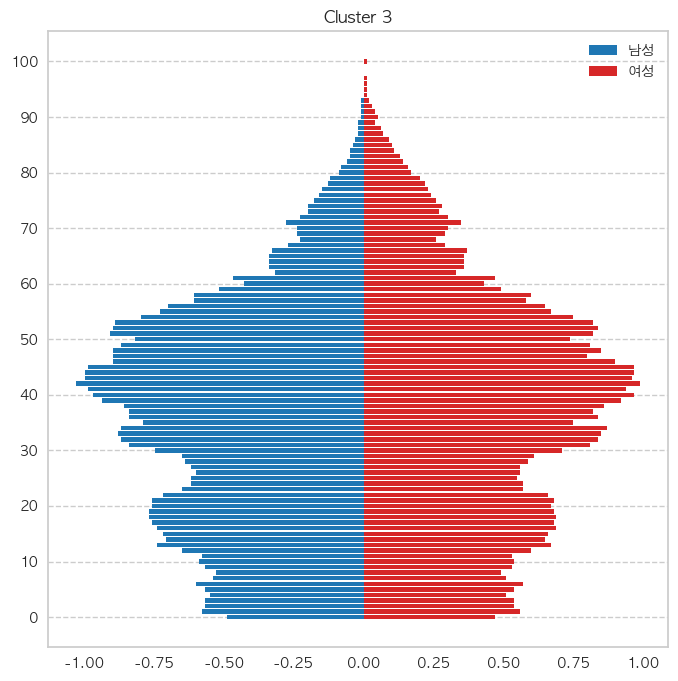

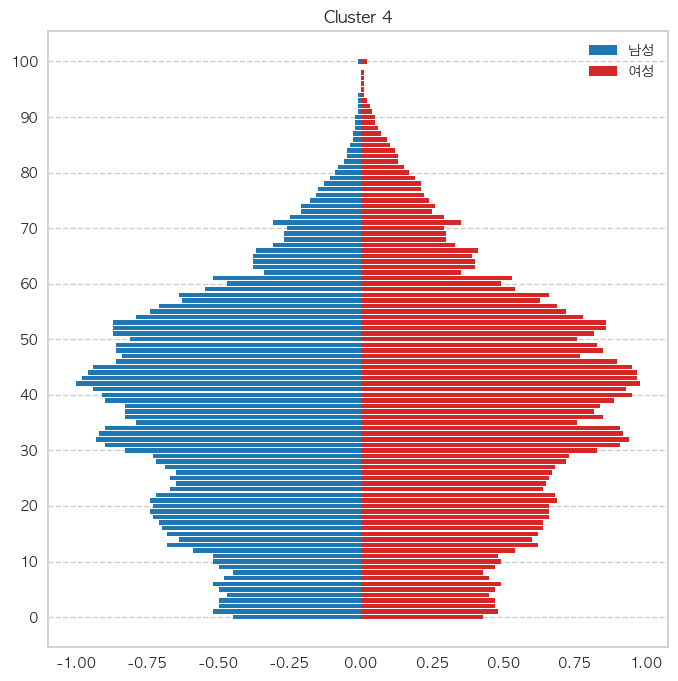

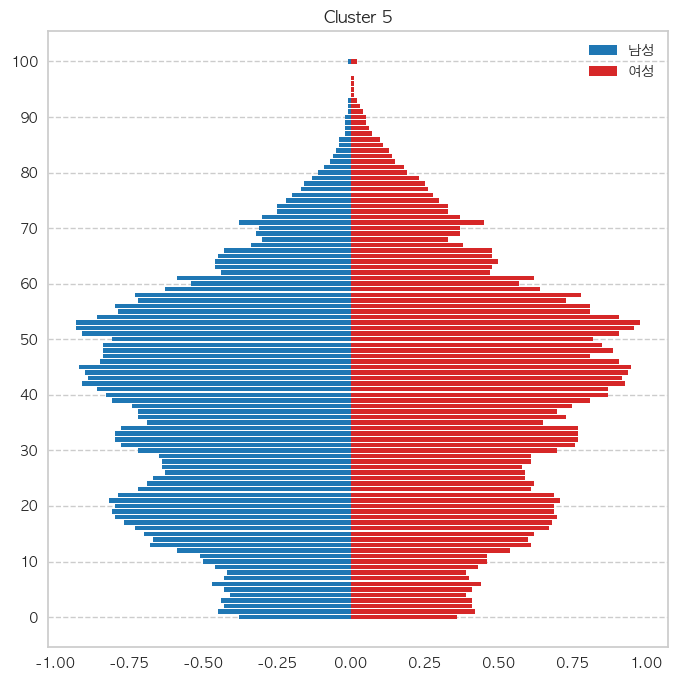

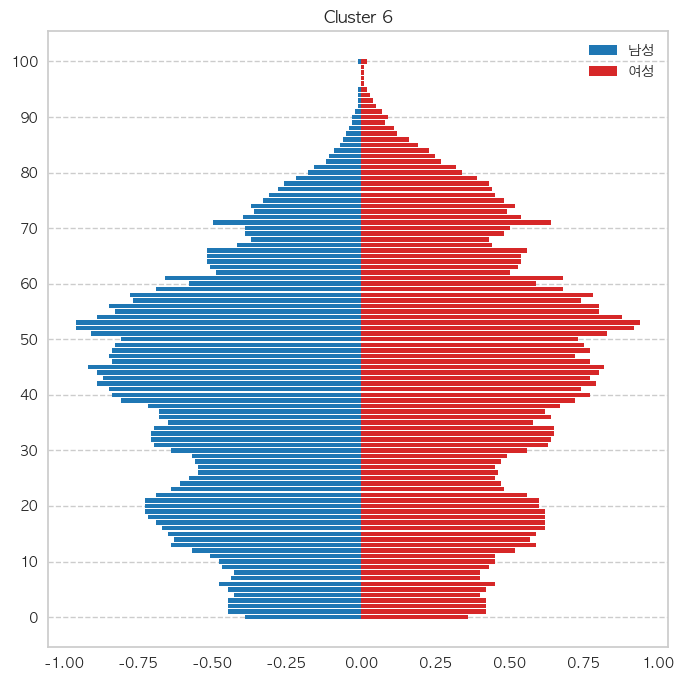

In [24]:
for k in range(1, best_k + 1):
    kmeans.population_pyramid_vis(year= 2013, cluster= k)

* 지도 기반 도시유형화 결과 시각화

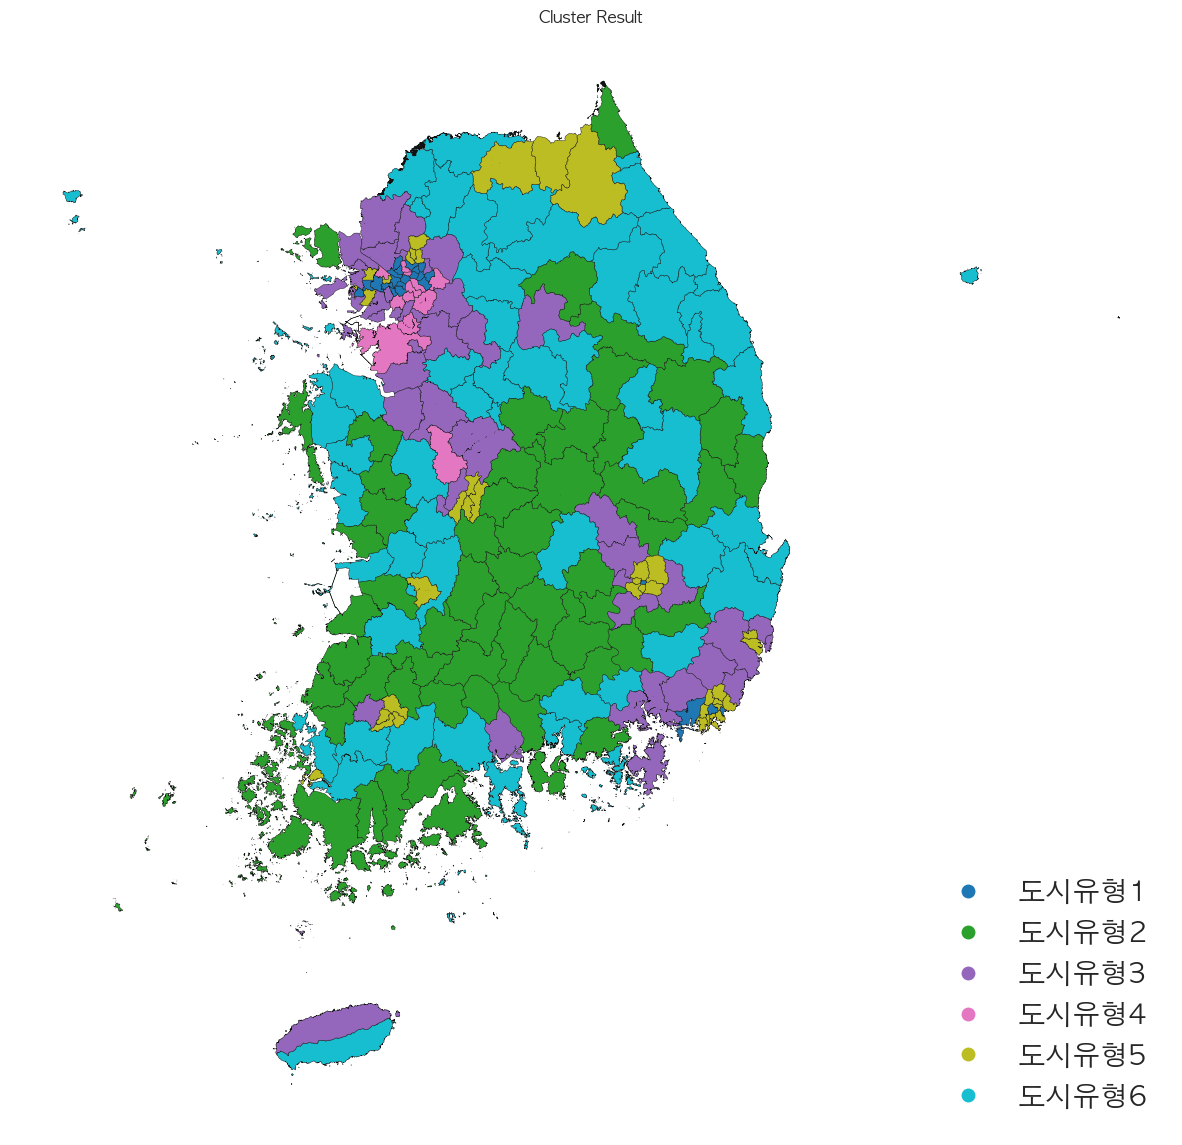

In [25]:
kmeans.geo_vis()

* 도시 유형별 중심값 추이 시각화

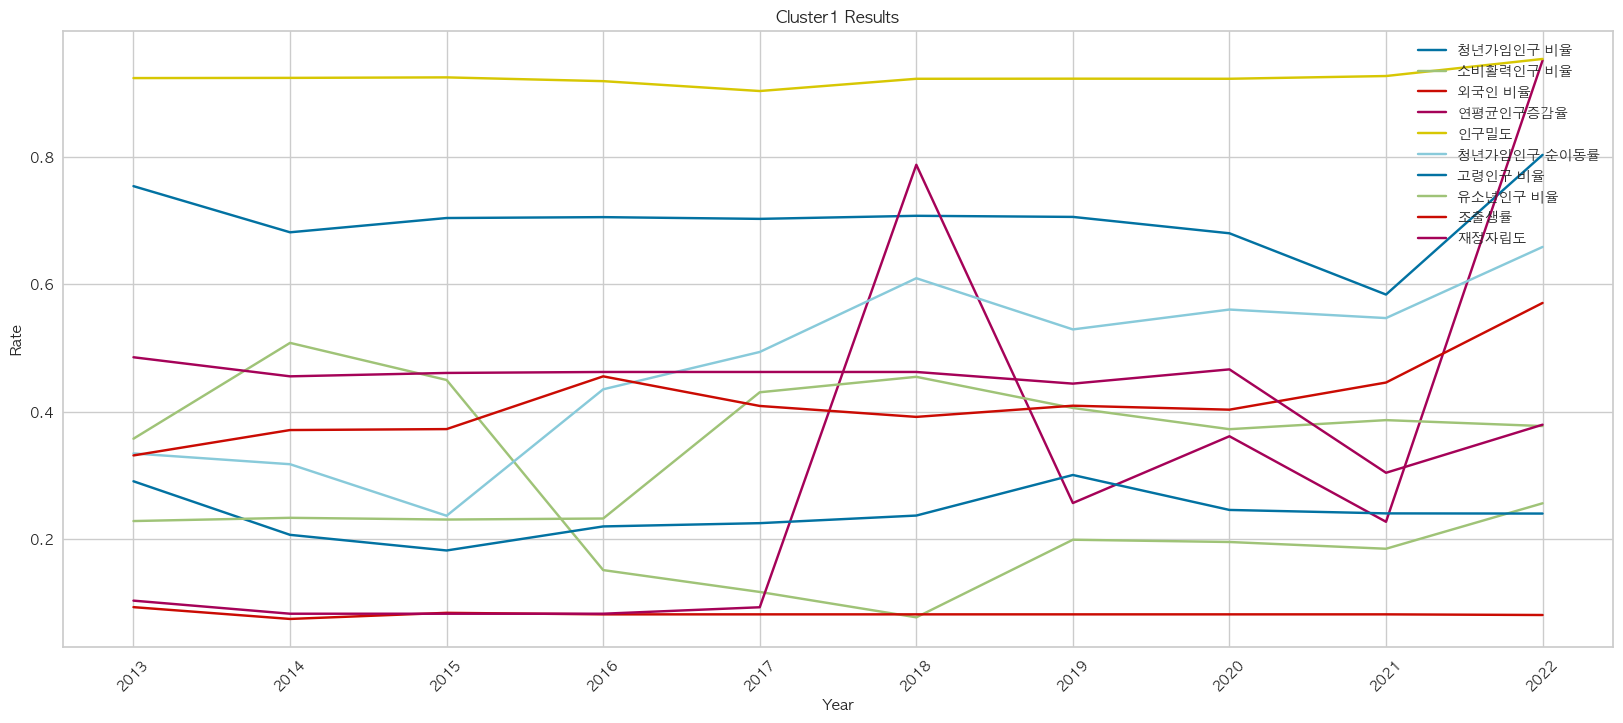

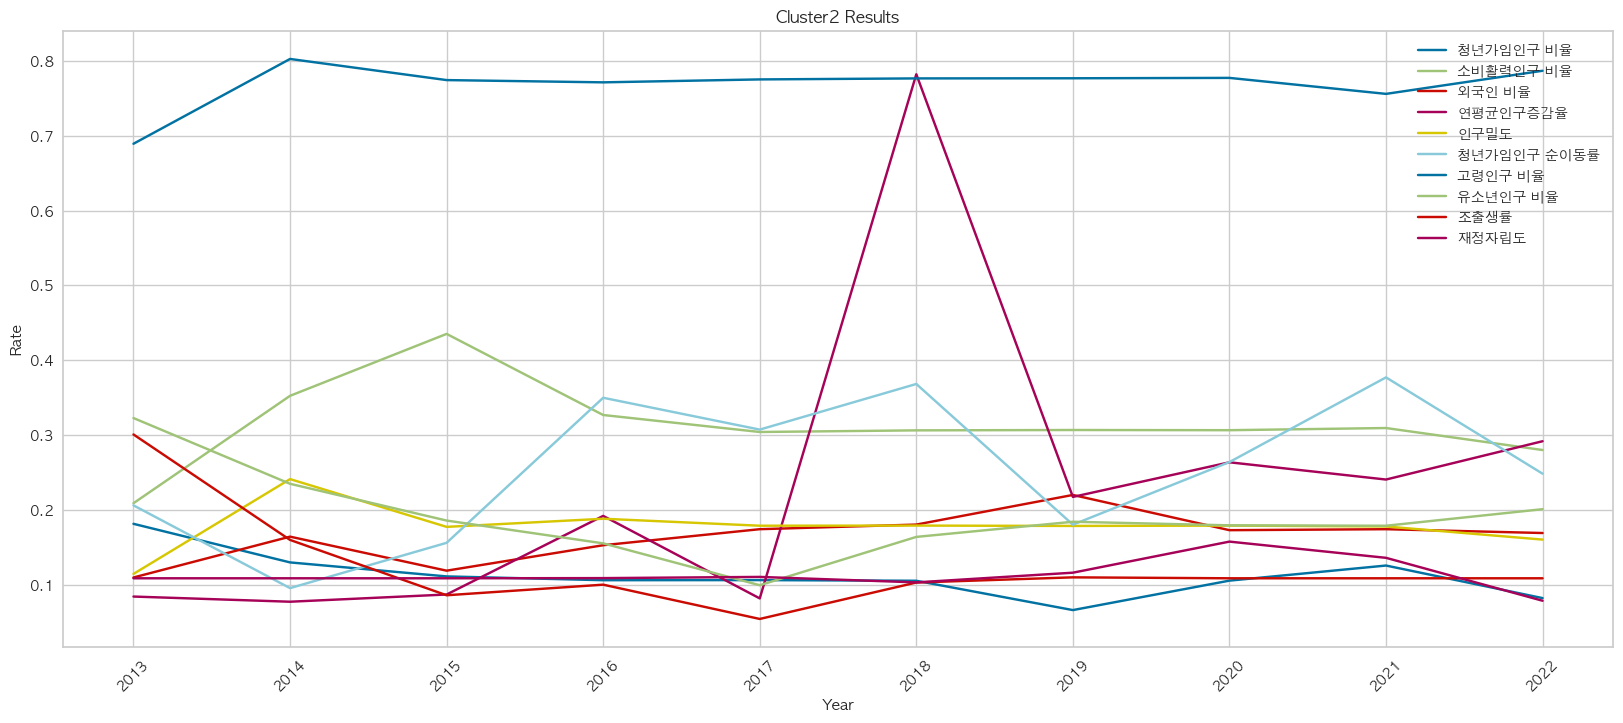

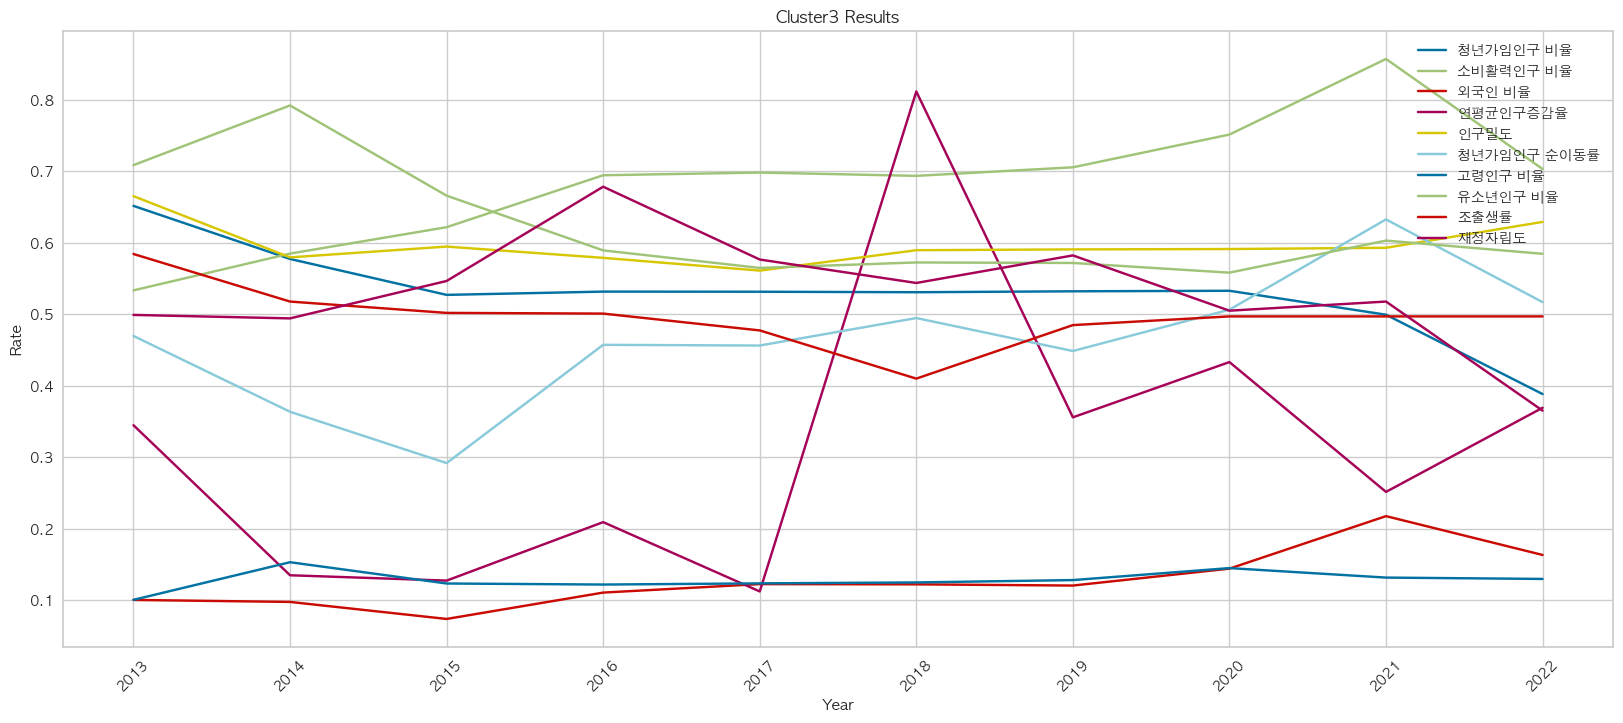

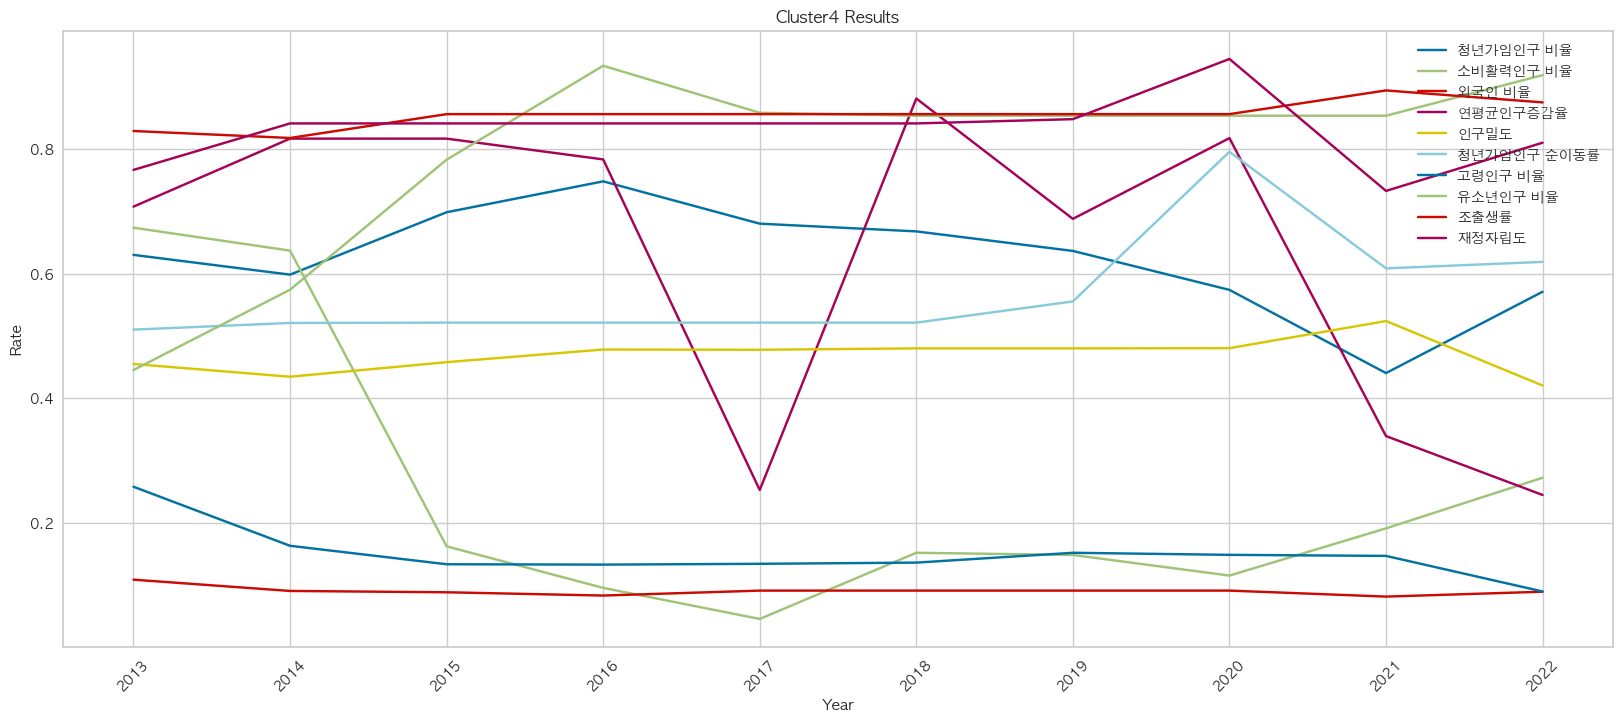

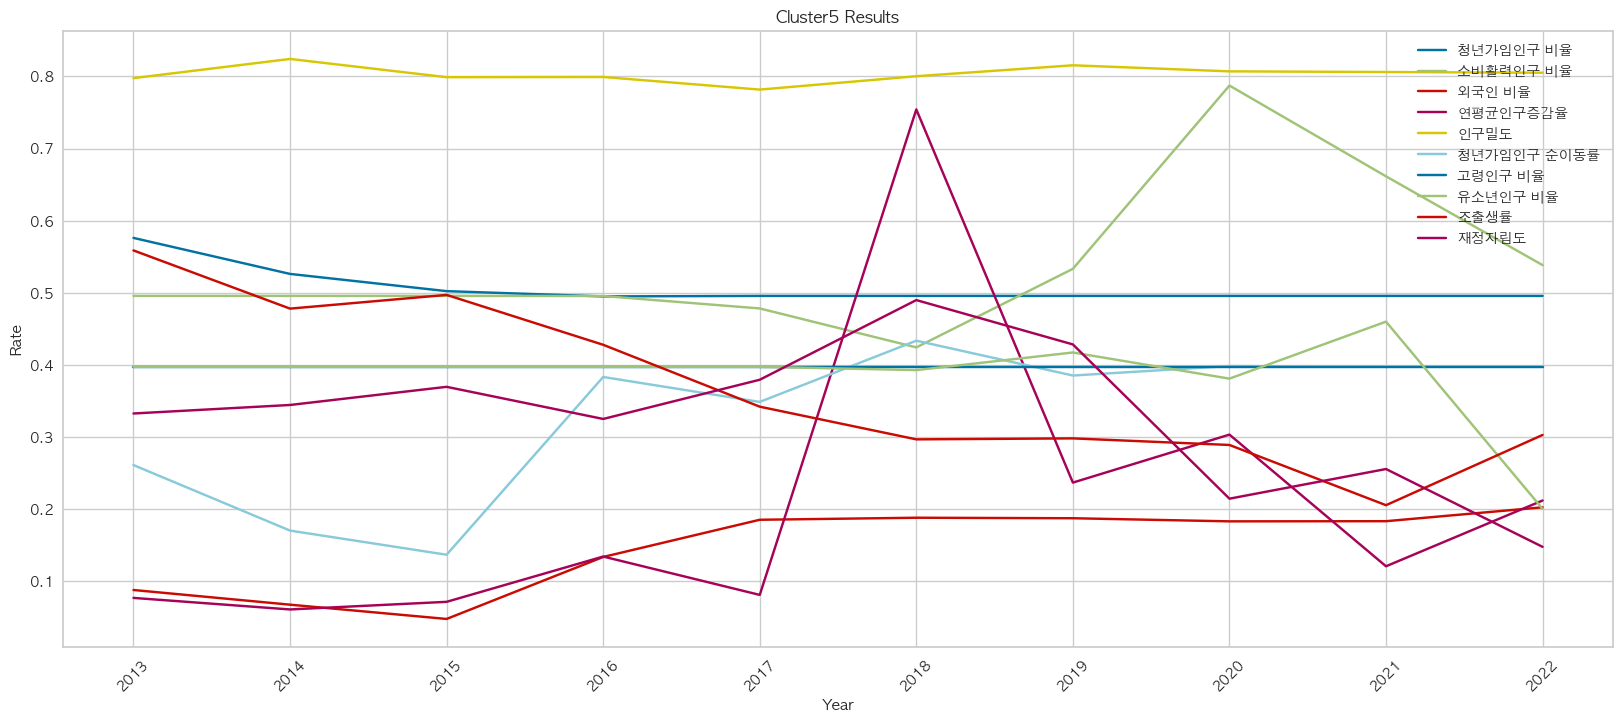

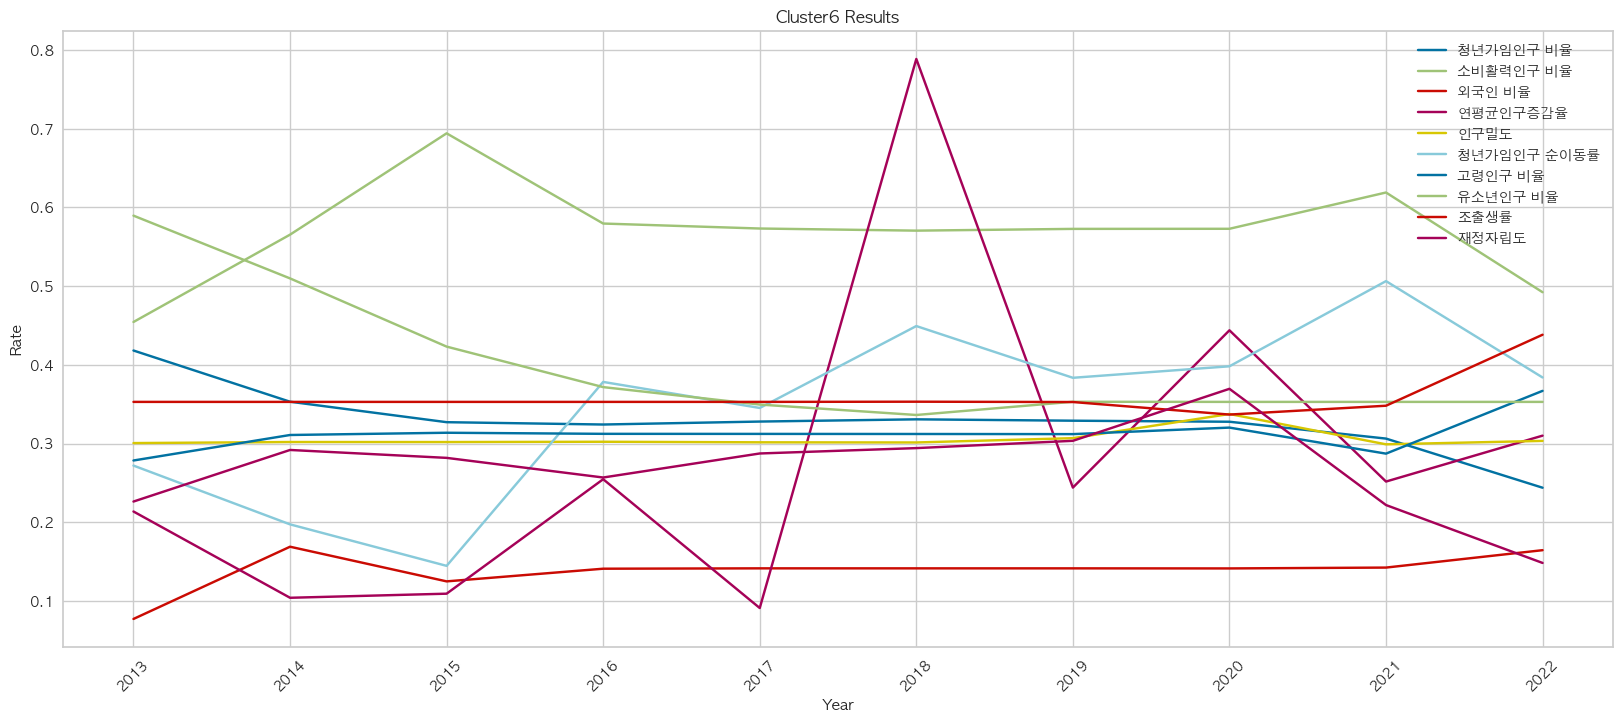

In [26]:
for k in range(1, best_k + 1):
    kmeans.cluster_centerios_vis(cluster= k)

kmeans.cluster_centerios_columns()

* 도시 유형별 상관관계분석 결과 시각화

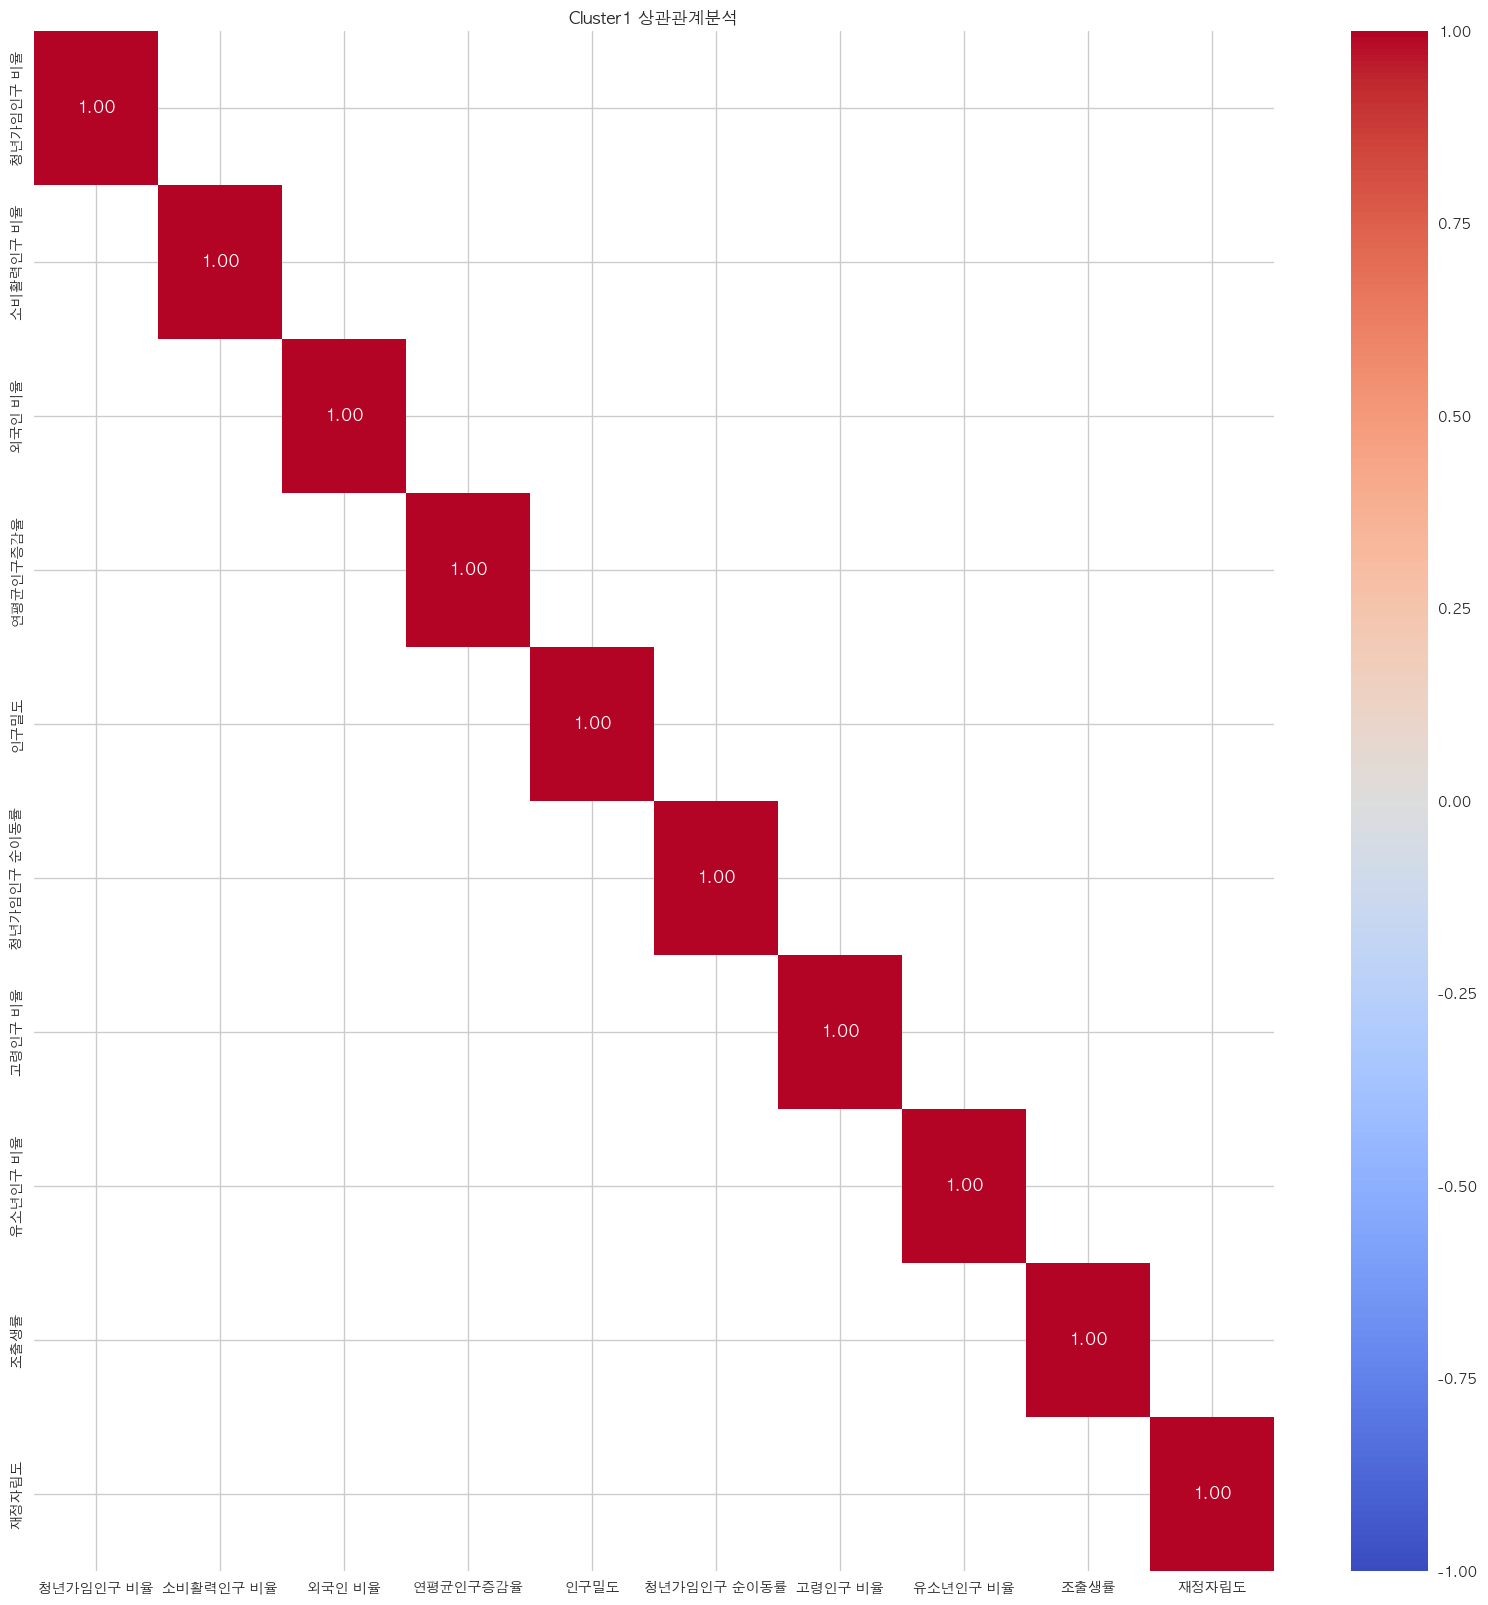

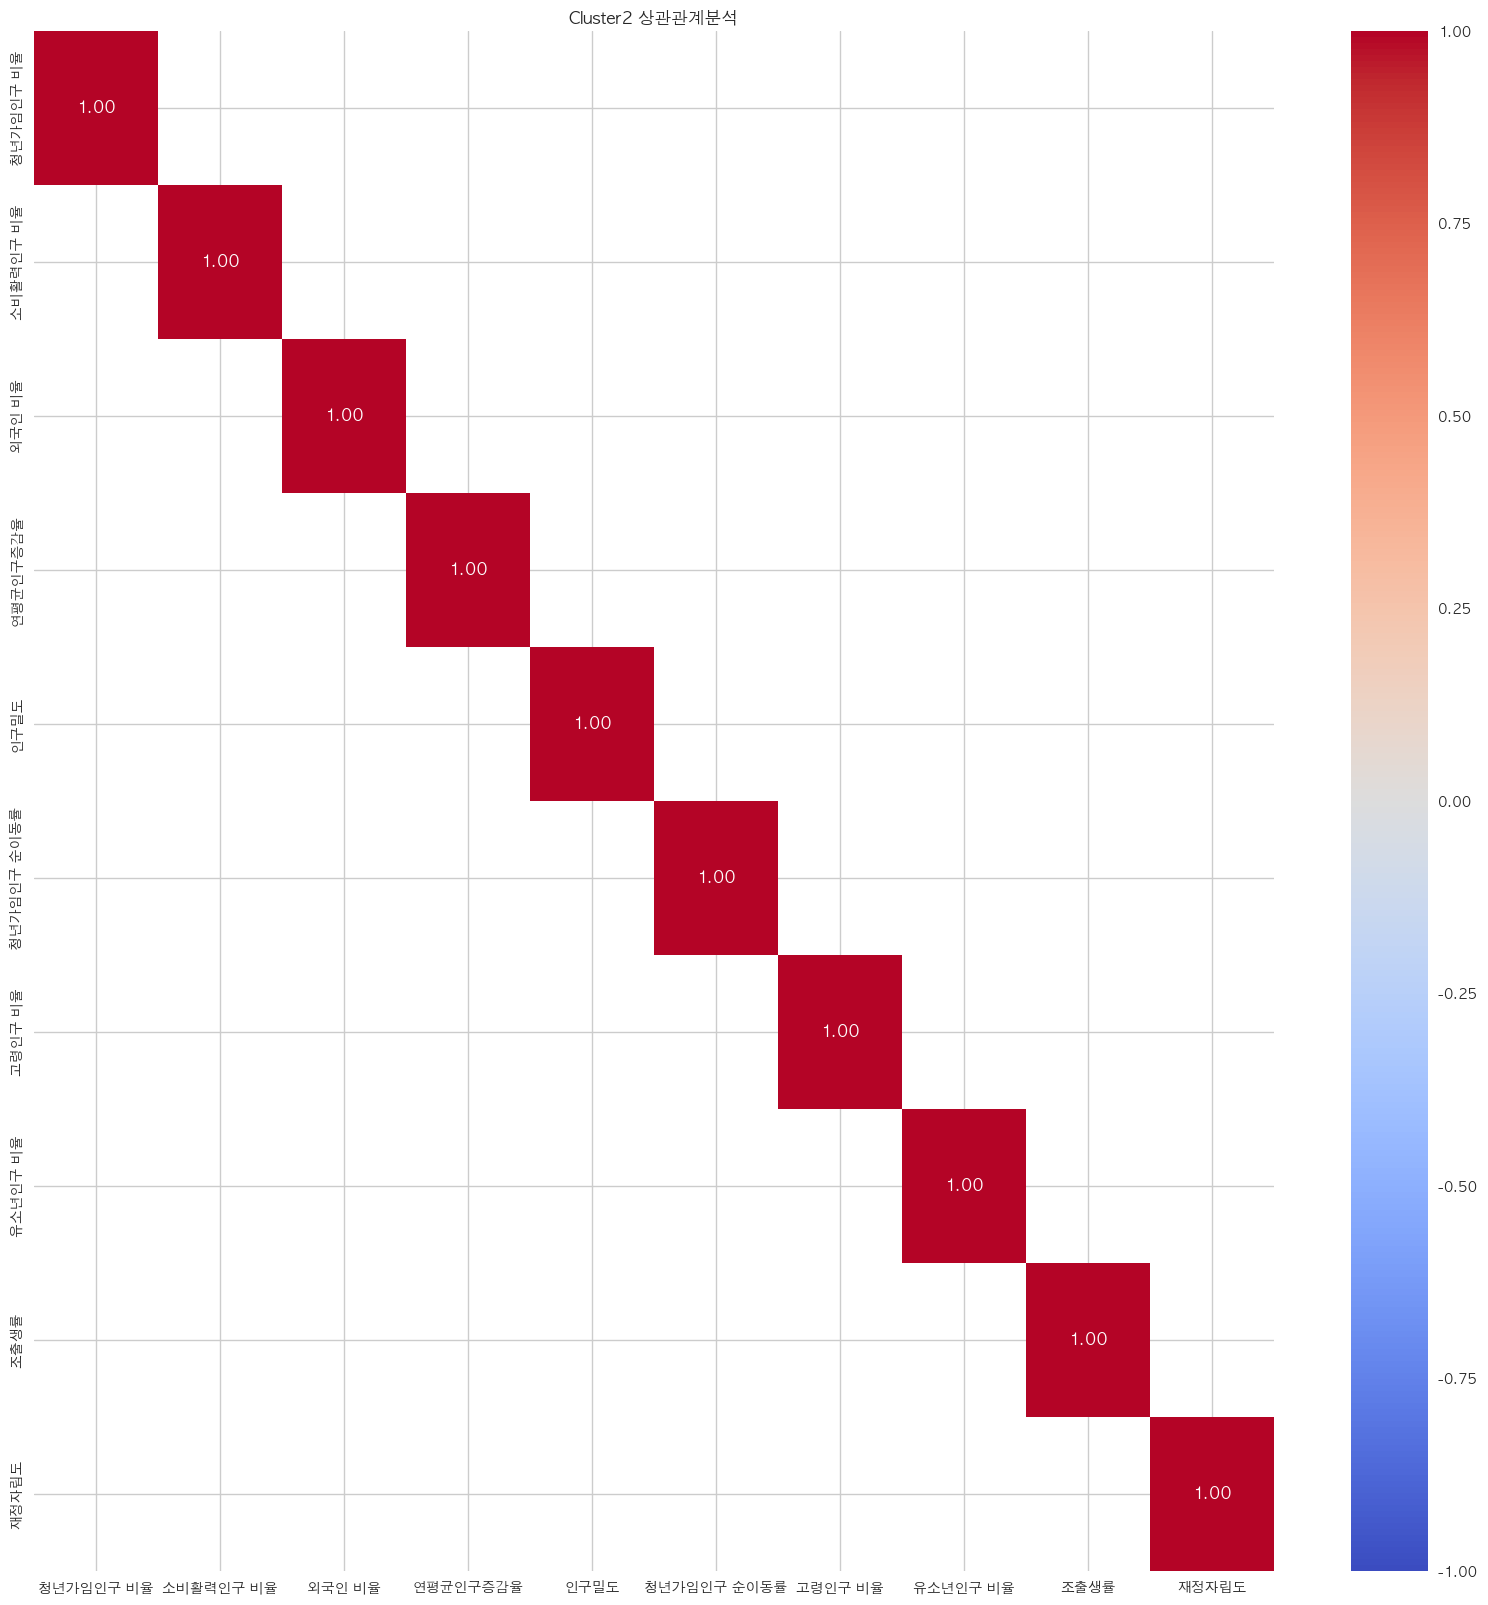

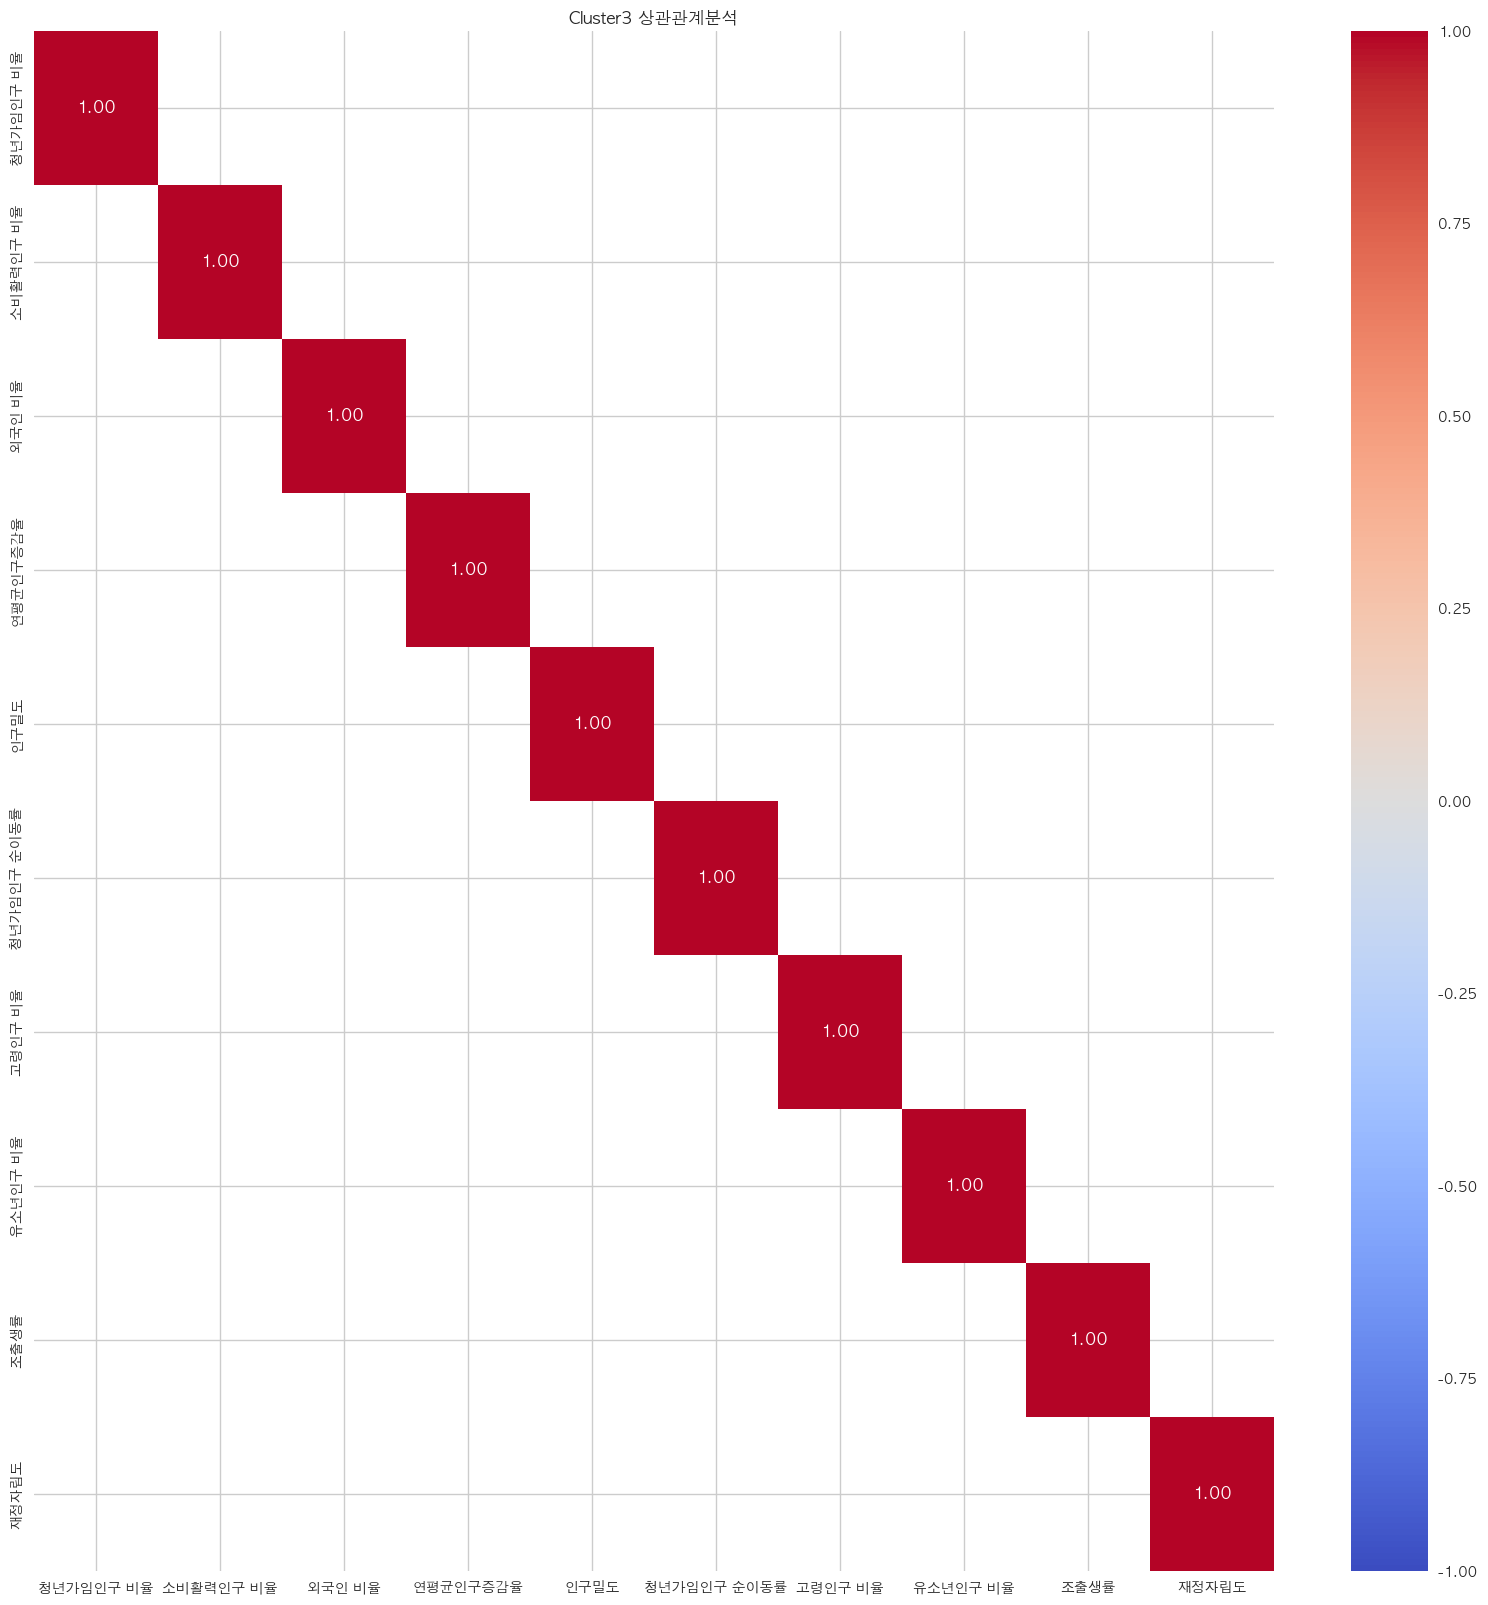

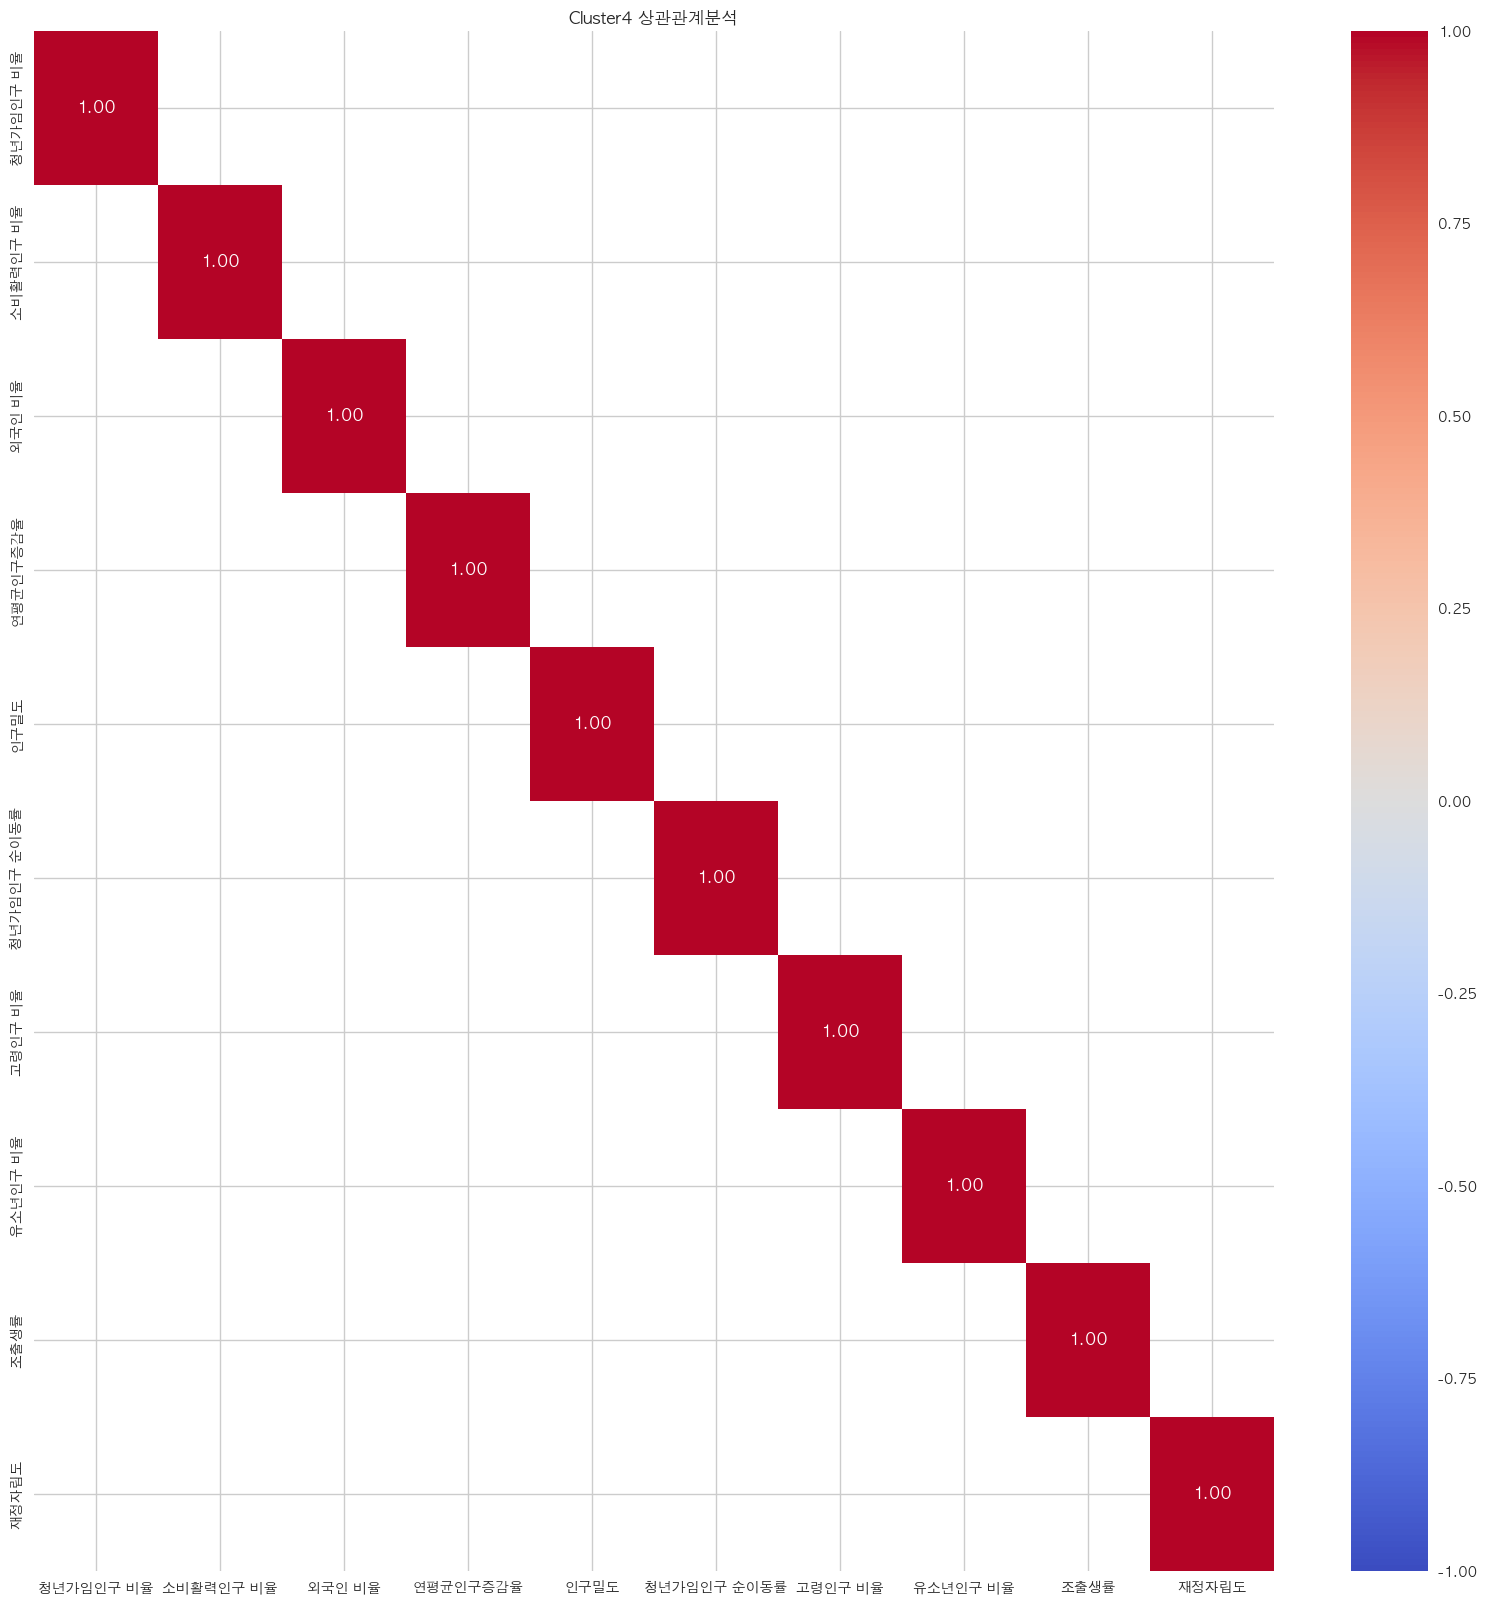

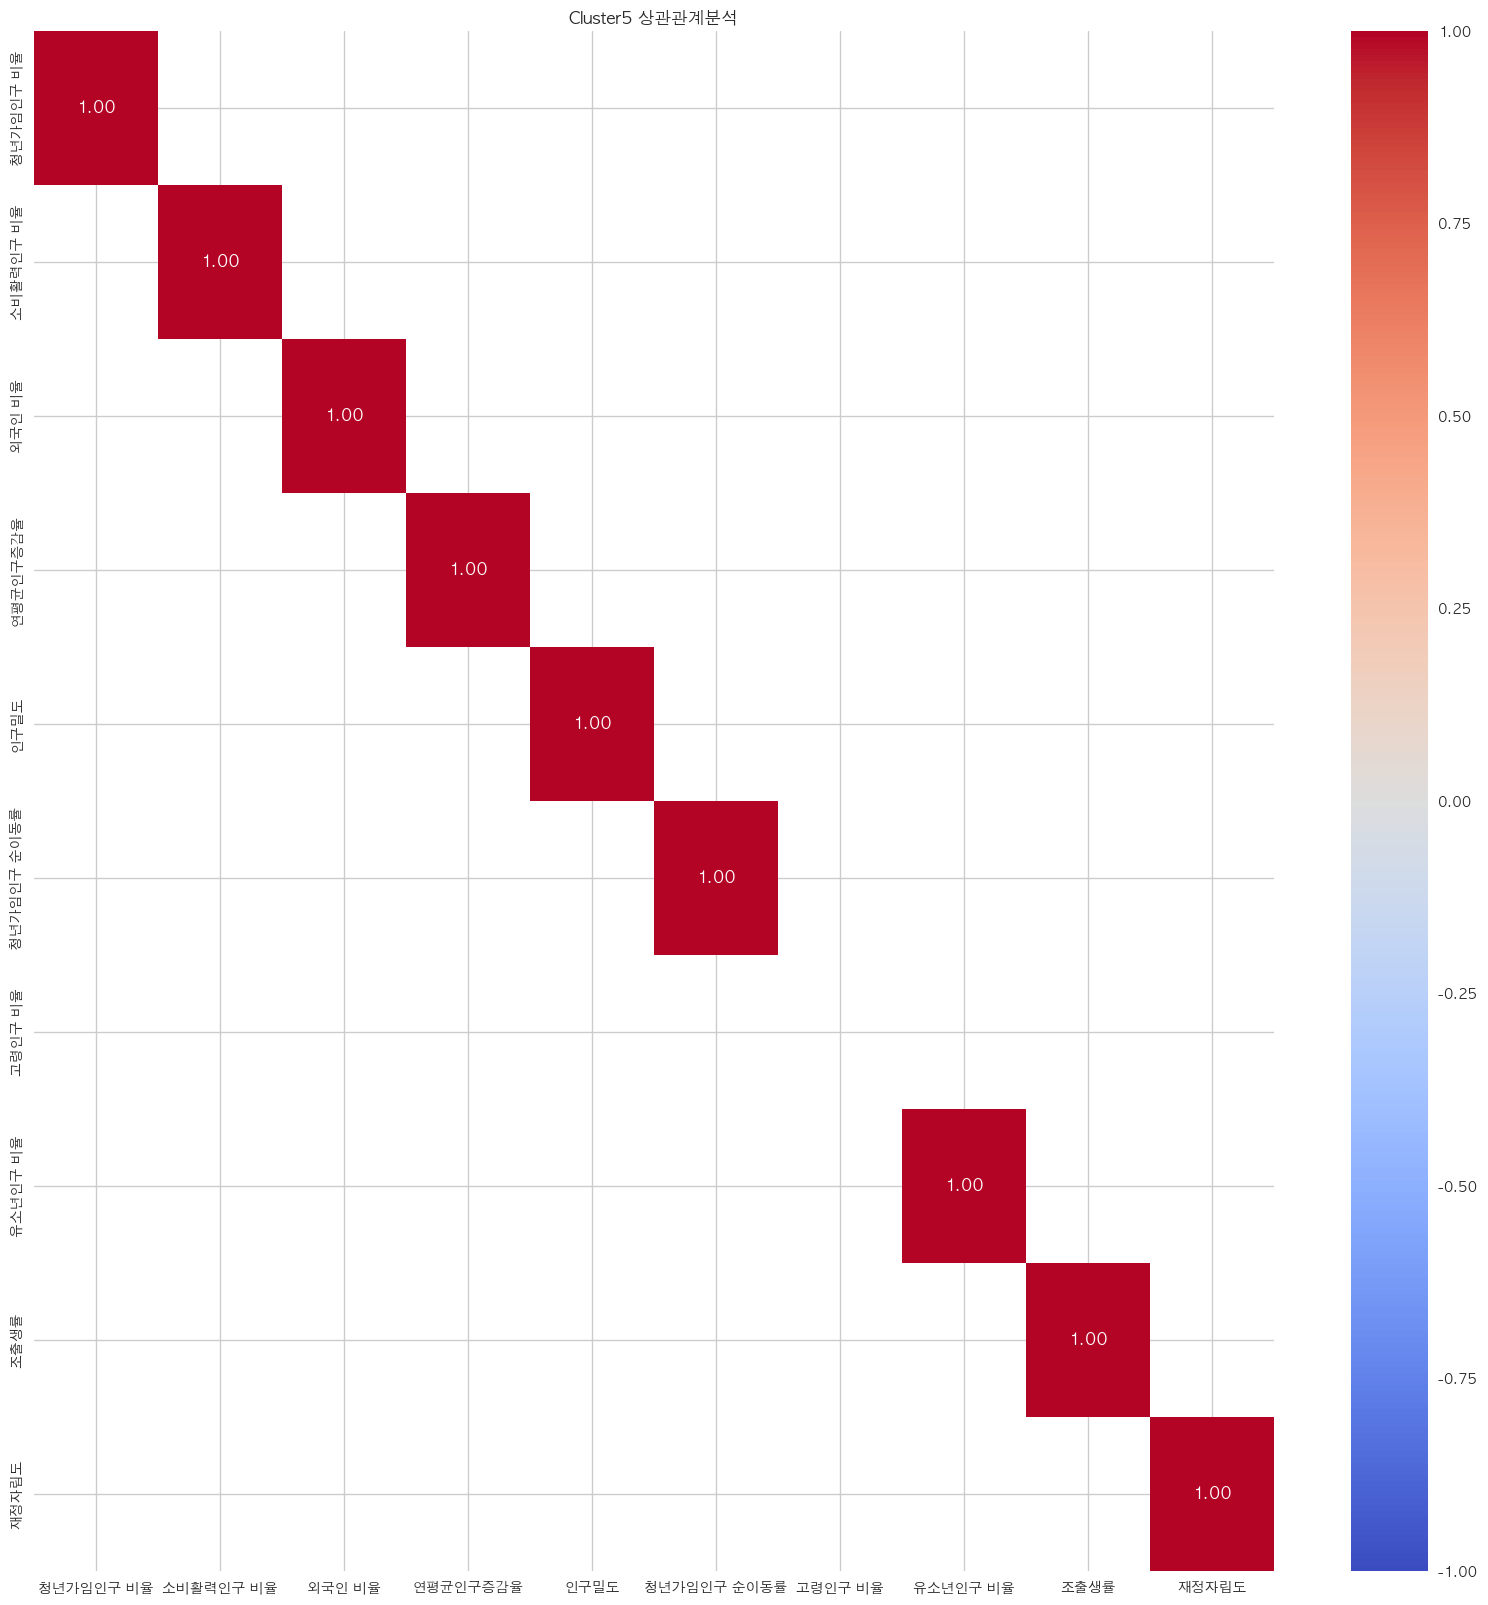

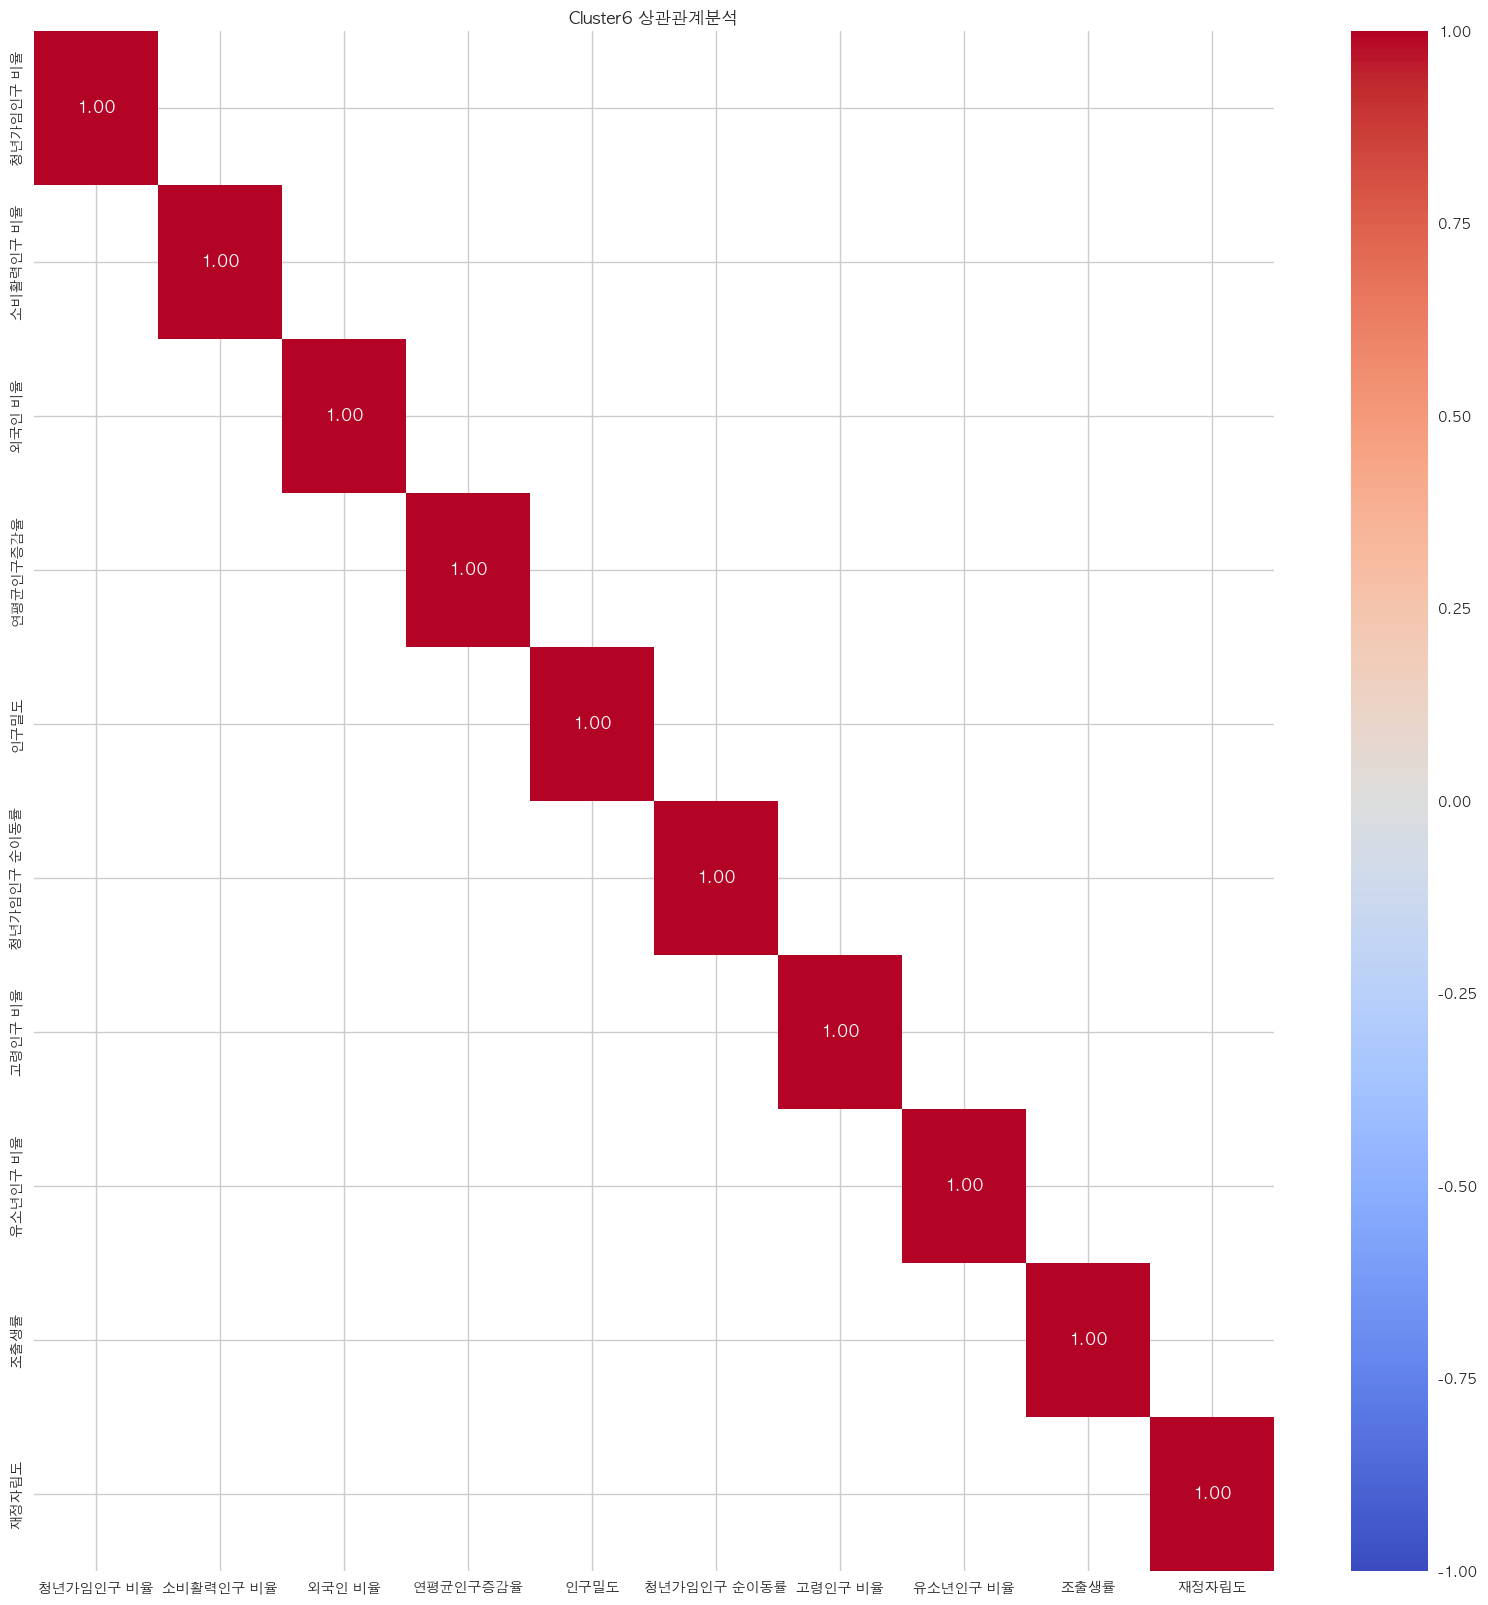

In [27]:
for k in range(1, best_k + 1):
    kmeans.corr_analysis_vis(cluster= k)

* 클러스터 별 차원축소 결과

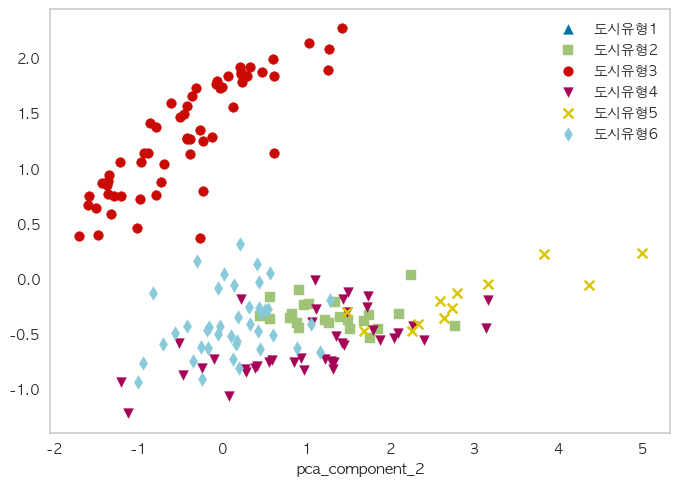

In [28]:
kmeans.dimensionality_reduction()

* Inverse MinMaxScaler

In [30]:
scaler_model_list = list()

for file_name in analysis_dict.keys():
    tmp_model = load(open(SAVE_PATH + 'MinMaxScaler_{}.pkl'.format(file_name), 'rb'))
    scaler_model_list.append(tmp_model)

In [31]:
def inverse_minmaxscaler_func(dataframe, model, colums= ['행정구역(시도)', '행정구역(시군구)별']):
    tmp_df = dataframe.drop(colums, axis= 1)
    tmp_values = np.array(tmp_df.values)
    value = model.inverse_transform(tmp_values)
    value_df = pd.DataFrame(value, columns= tmp_df.columns)

    return pd.concat([dataframe[colums], value_df], axis= 1)

def pre_merge_func(dataframe, pred_dataframe, columns= ['행정구역(시도)', '행정구역(시군구)별', 'Cluster Pred']):
    return dataframe.merge(pred_dataframe[columns], on= columns[:-1], how= 'inner')

In [32]:
real_values_list = list()

for i, key in enumerate(analysis_dict.keys()):
    tmp_value = inverse_minmaxscaler_func(analysis_dict[key][-1], scaler_model_list[i])
    tmp_value = pre_merge_func(tmp_value, pred_df)
    real_values_list.append(tmp_value)

In [33]:
mean_df_list = list()

for i, key in enumerate(analysis_dict.keys()):
    mean_df = real_values_list[i].drop(['행정구역(시도)', '행정구역(시군구)별'], axis= 1).groupby(['Cluster Pred']).mean()
    mean_df = np.round(mean_df, 2)
    mean_df = mean_df.reset_index(drop= False)
    mean_df.to_excel(SAVE_PATH + 'mean_{}.xlsx'.format(key), index= False)
    mean_df_list.append(mean_df)

In [34]:
median_df_list = list()

for i, key in enumerate(analysis_dict.keys()):
    median_df = real_values_list[i].drop(['행정구역(시도)', '행정구역(시군구)별'], axis= 1).groupby(['Cluster Pred']).median()
    median_df = np.round(median_df, 2)
    median_df = median_df.reset_index(drop= False)
    median_df.to_excel(SAVE_PATH + 'median_{}.xlsx'.format(key), index= False)
    median_df_list.append(median_df)

* 평균, 중앙값 데이터 시각화

In [35]:
def data_value_vis(dataframe, columns_dict, type_name= '평균'):
    for i, df in enumerate(dataframe):
        df['Cluster Pred'] = df['Cluster Pred'].apply(lambda x: '도시유형{}'.format(x))
        plot_df = df.set_index(['Cluster Pred']).T
        plot_title = list(columns_dict.keys())[i]

        plt.figure(figsize=(12, 8))
        sns.lineplot(plot_df, markers= 'o', dashes= False)
        plt.title('{} {}값'.format(plot_title, type_name))
        # plt.legend(
        #     labels= plot_df.columns.tolist(), 
        #     bbox_to_anchor= (1, 1)
        # )
        plt.grid(False, axis= 'x')
        plt.savefig(SAVE_PATH + '{} {}값.png'.format(plot_title, type_name))
        # plt.show()

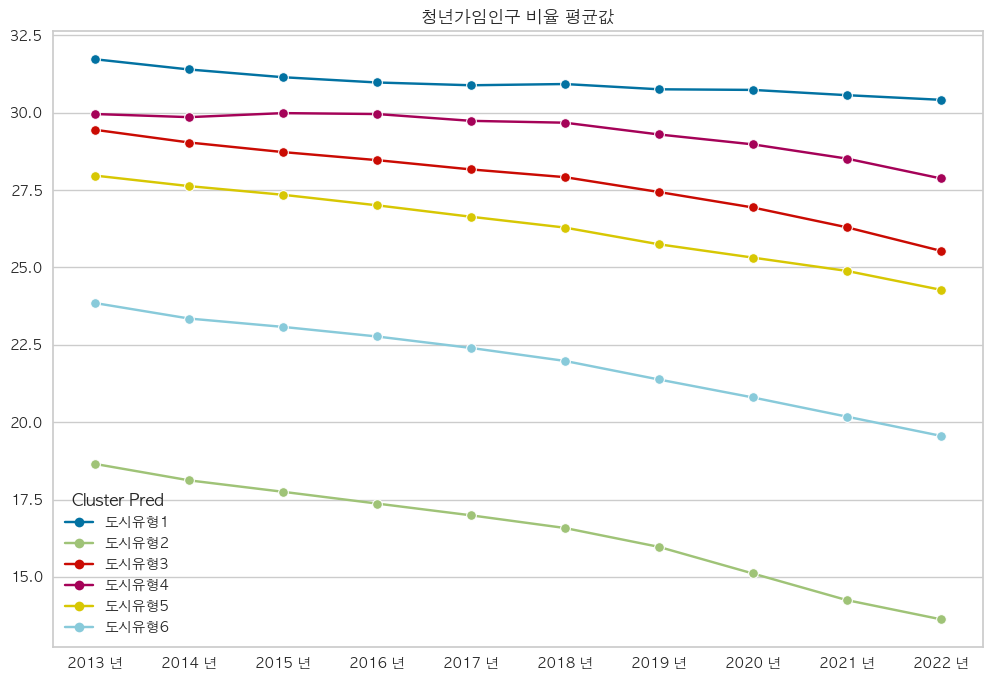

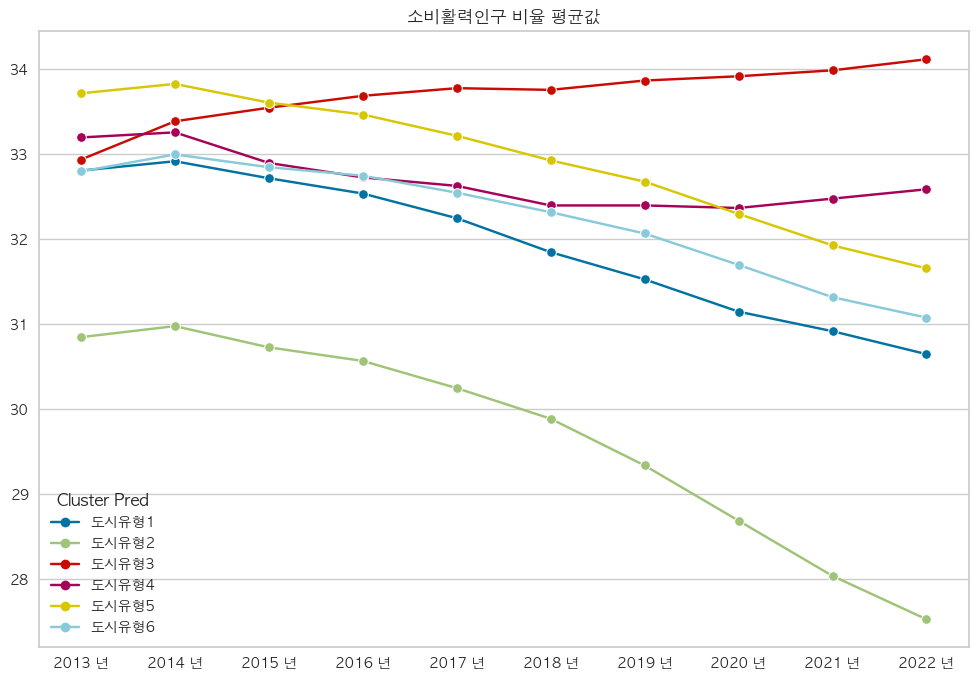

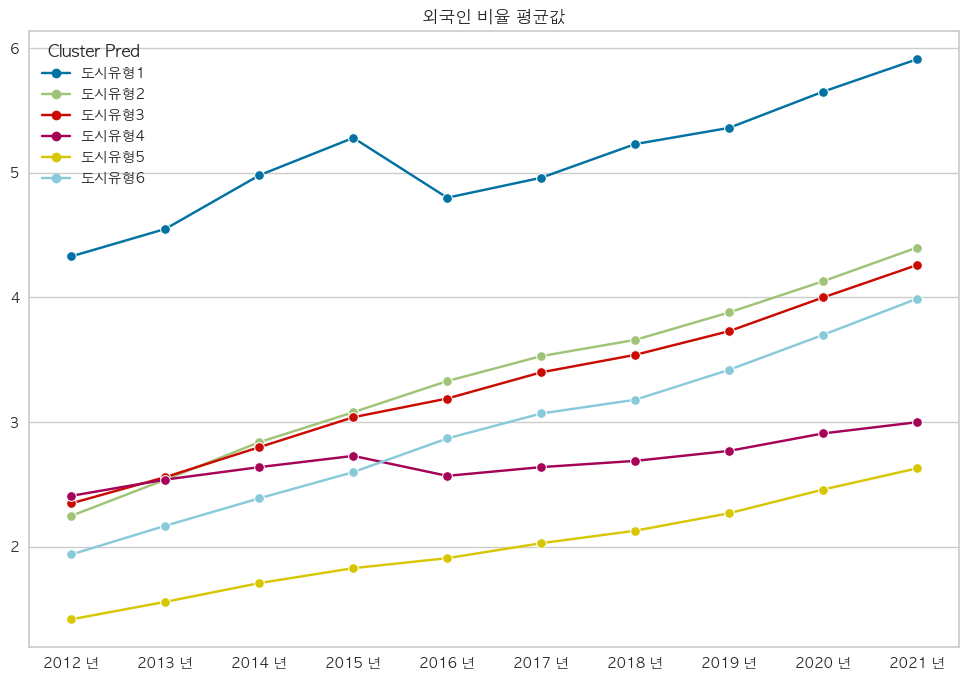

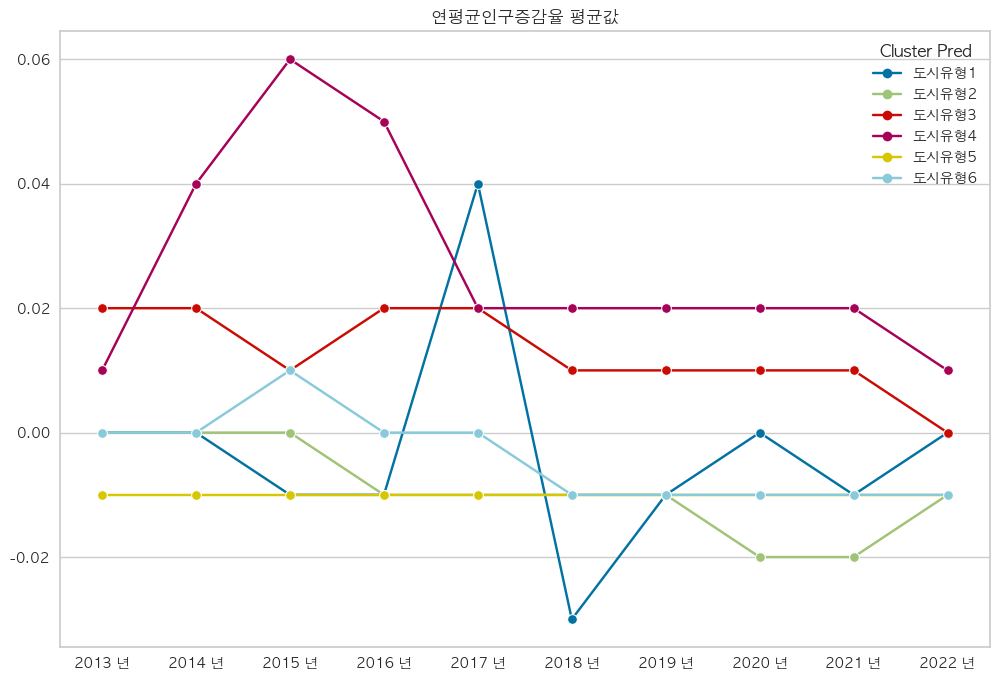

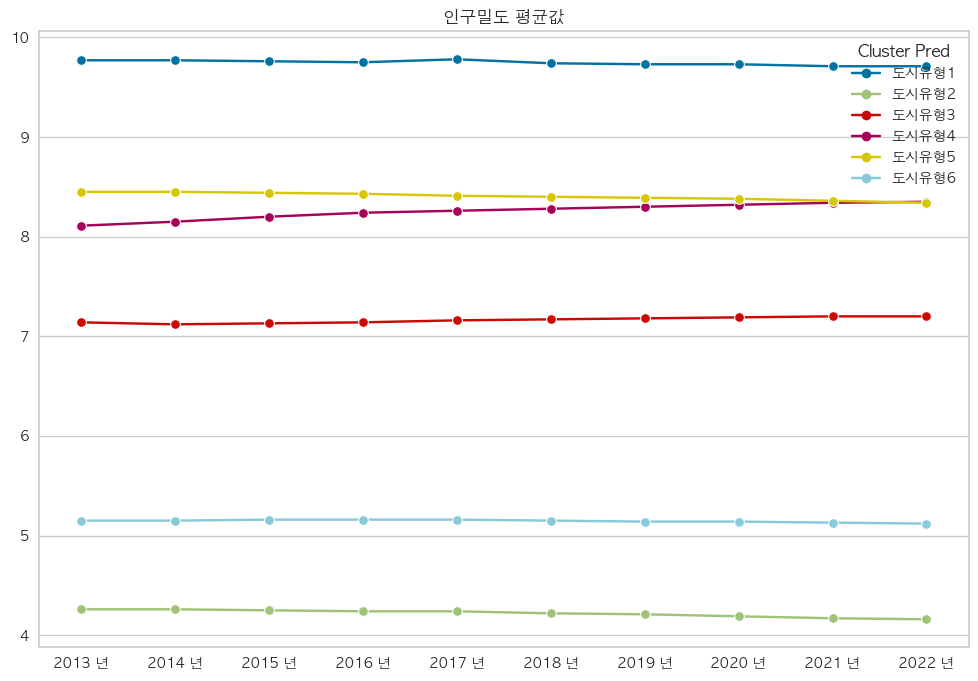

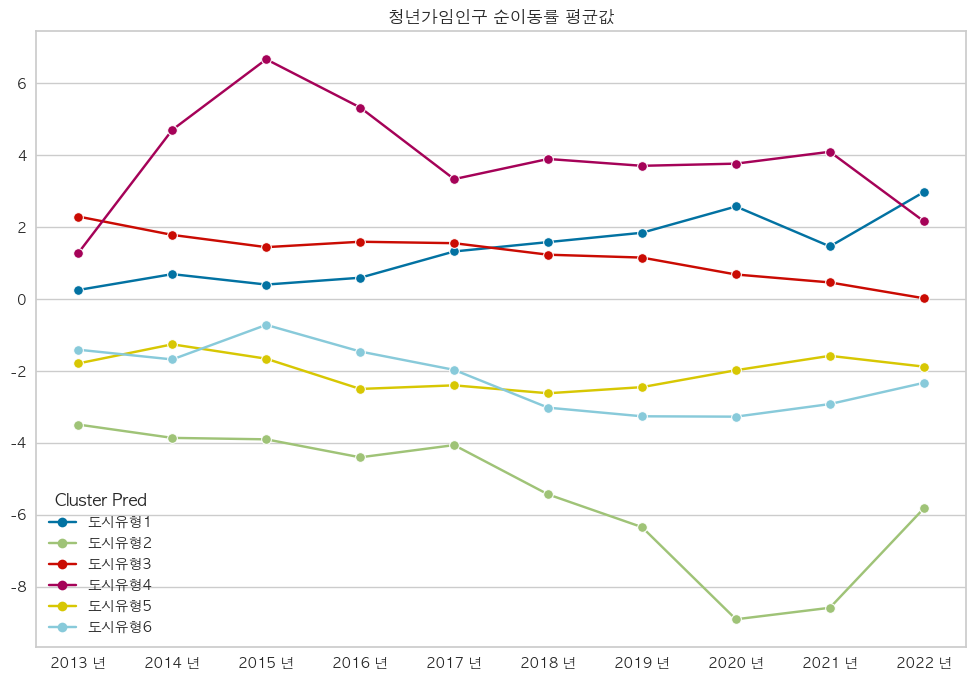

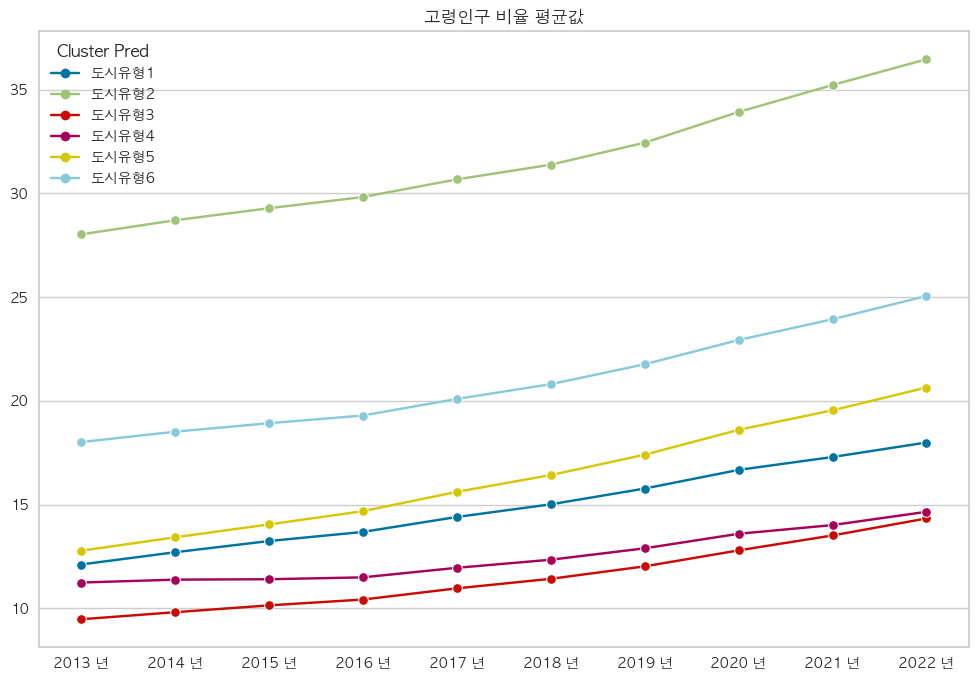

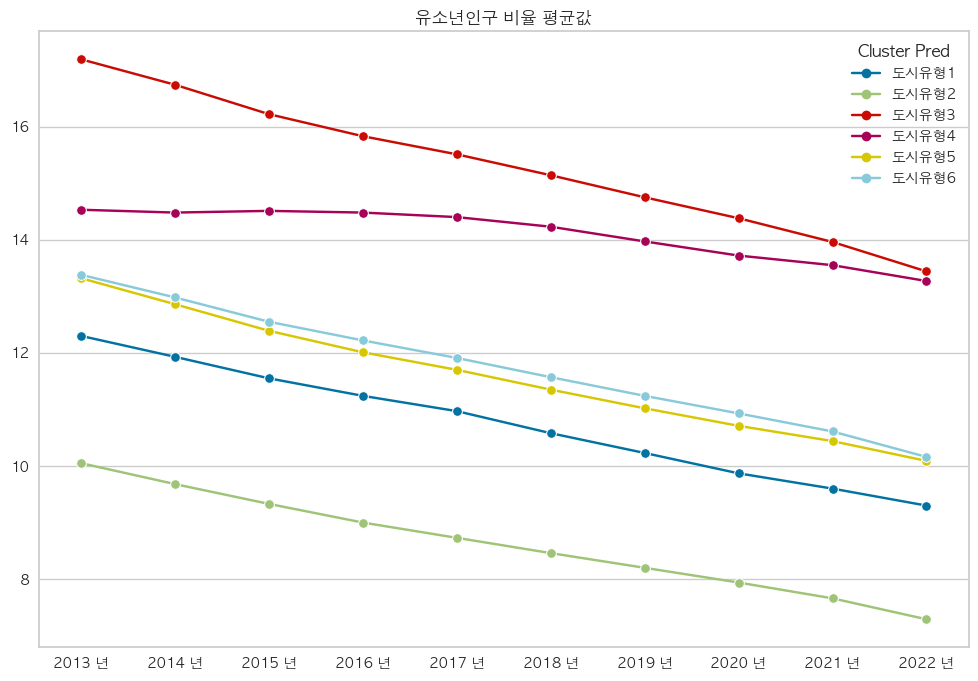

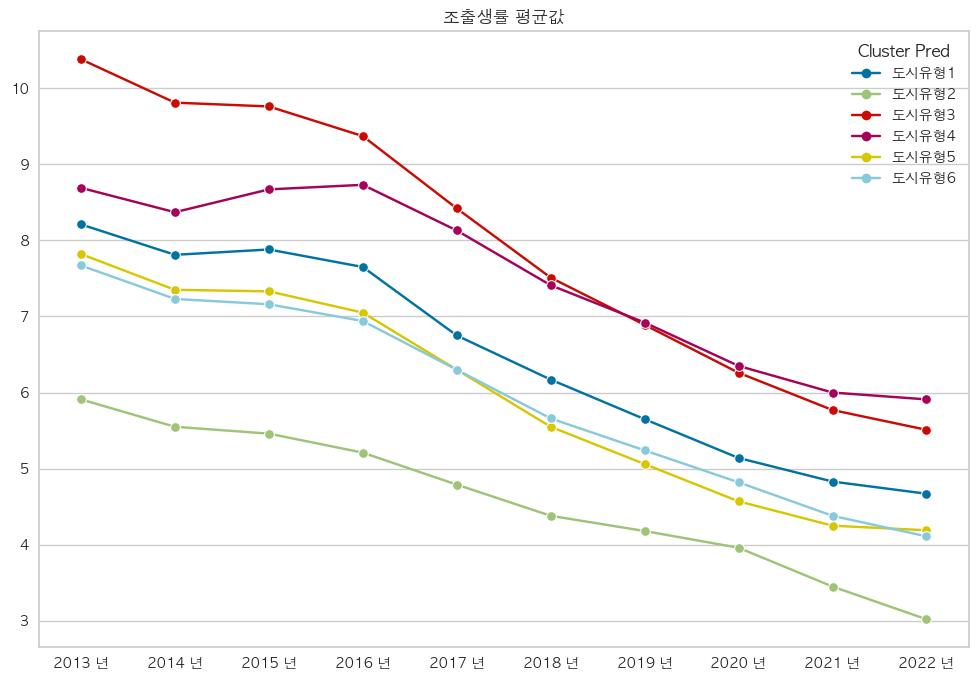

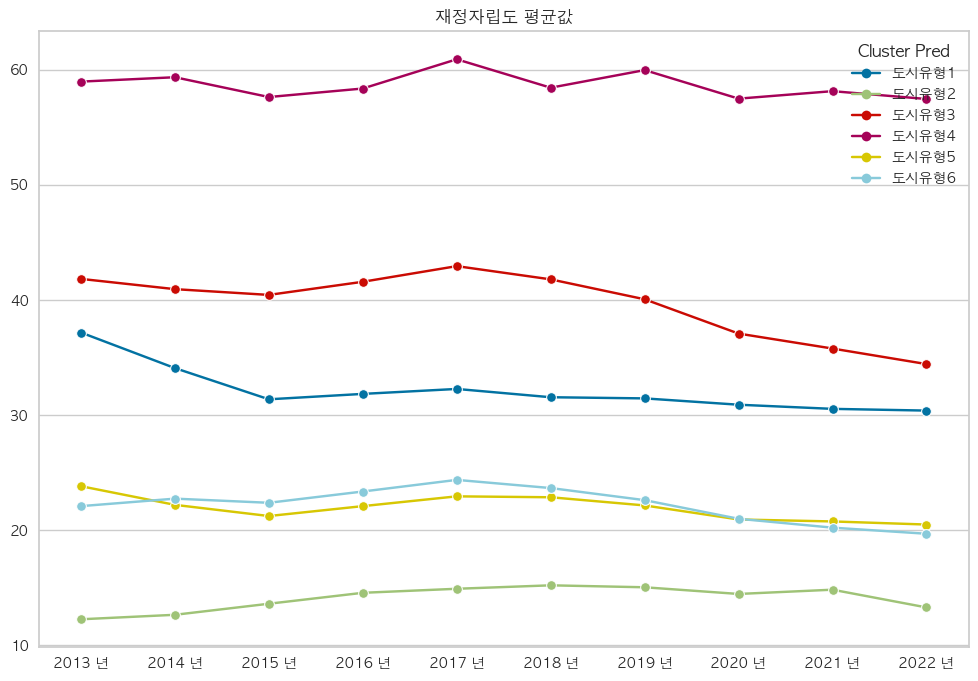

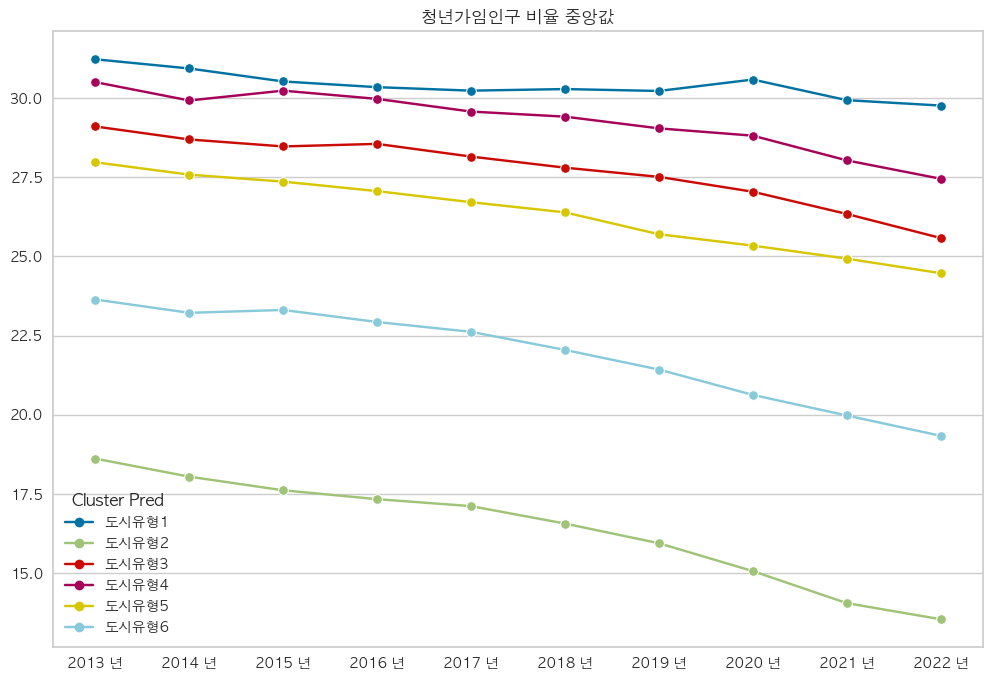

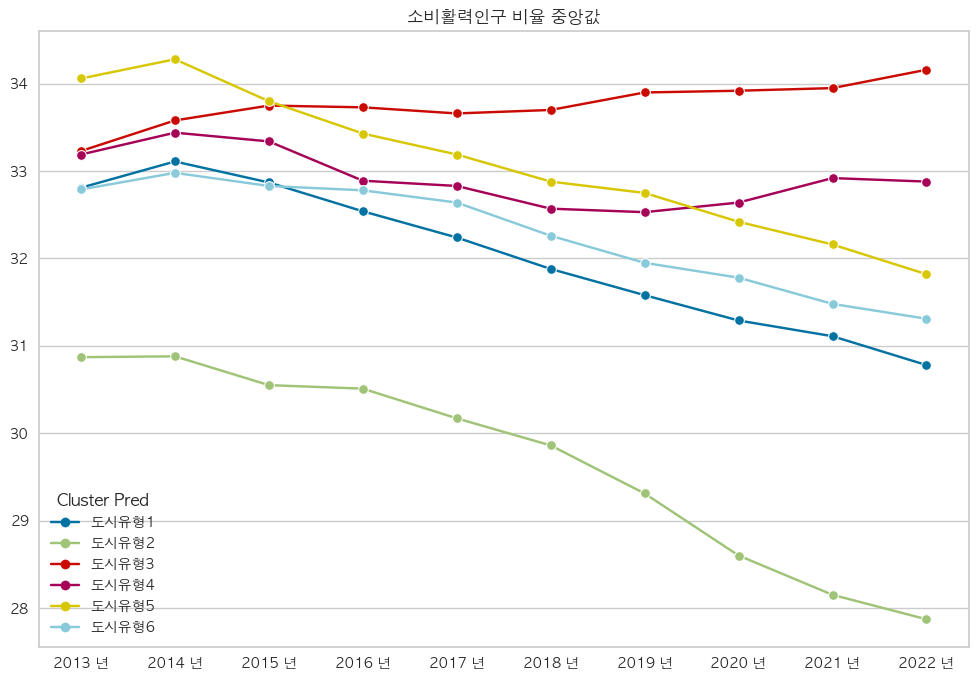

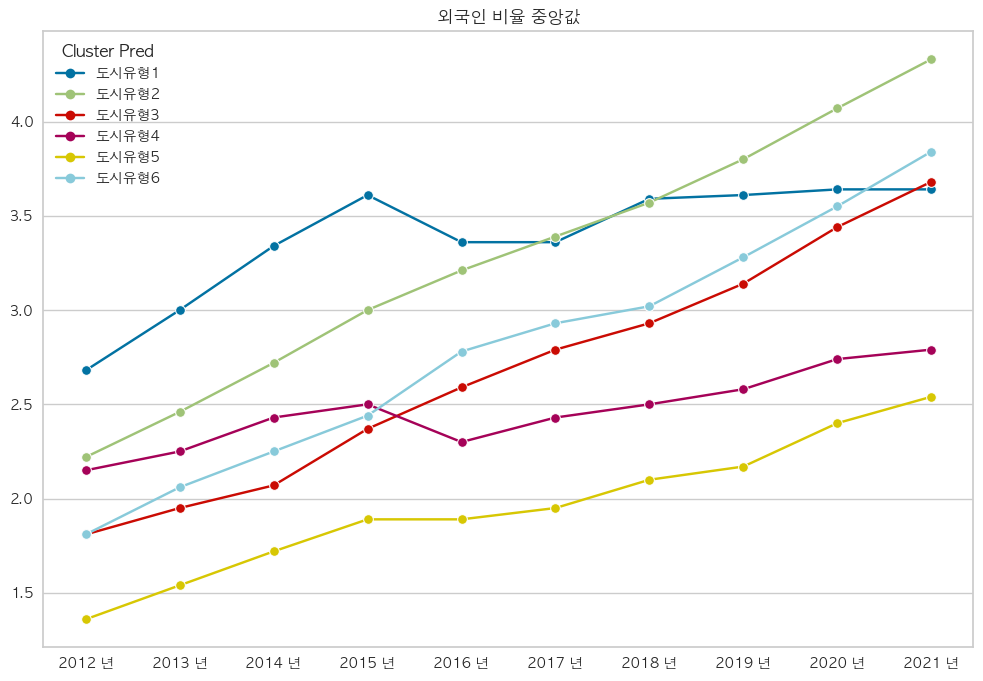

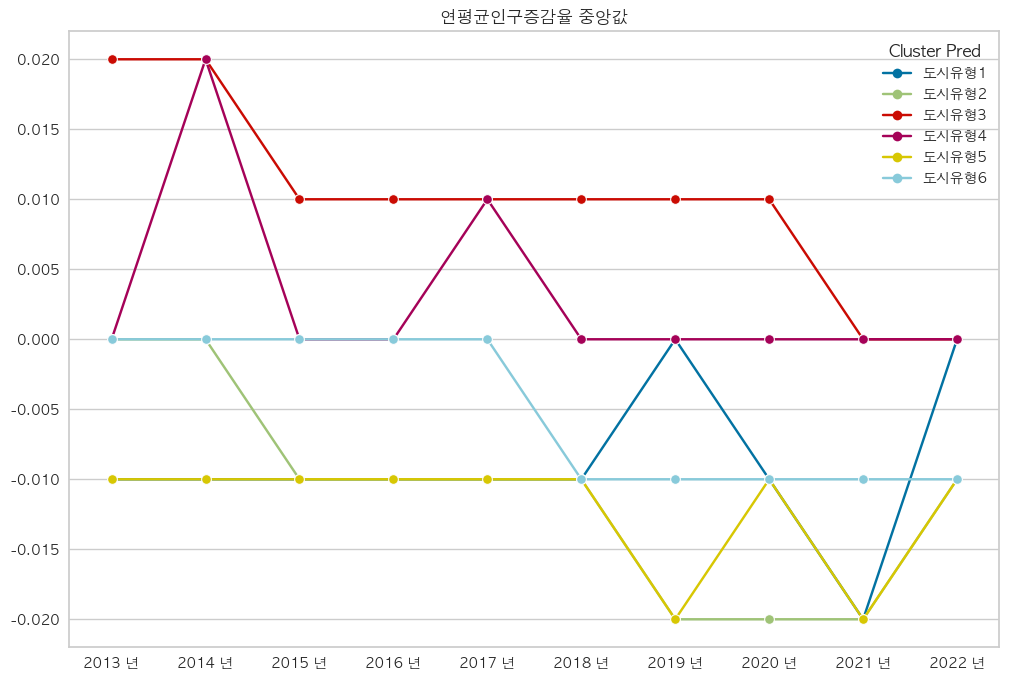

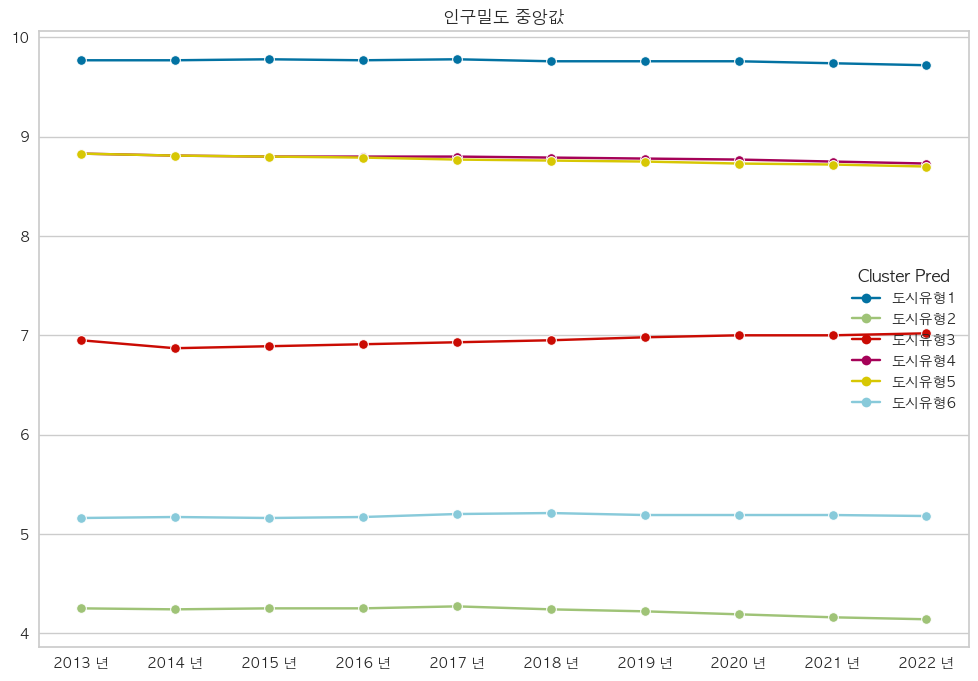

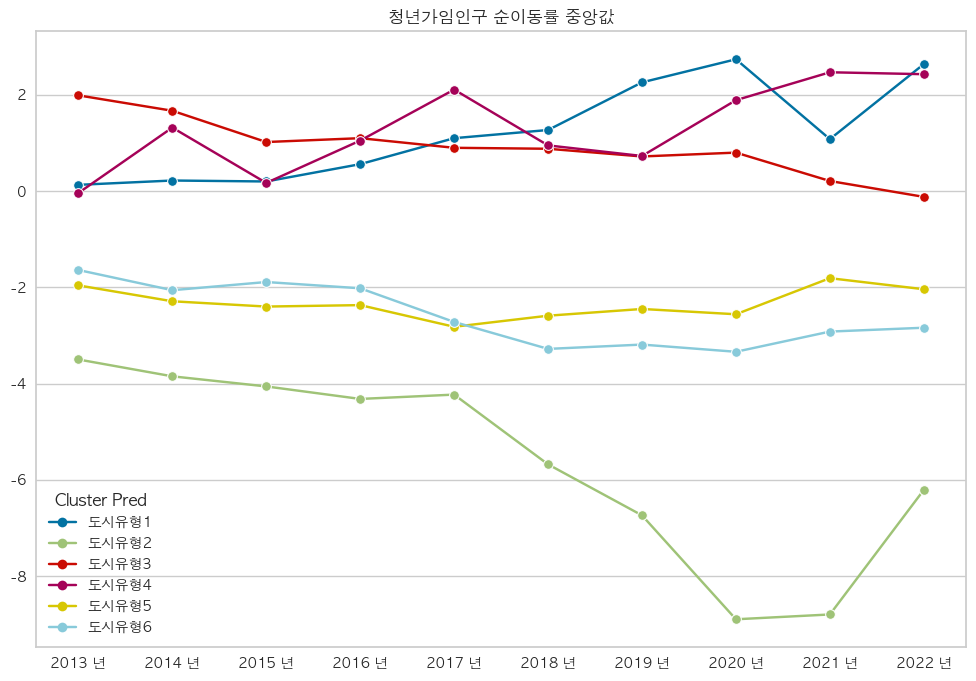

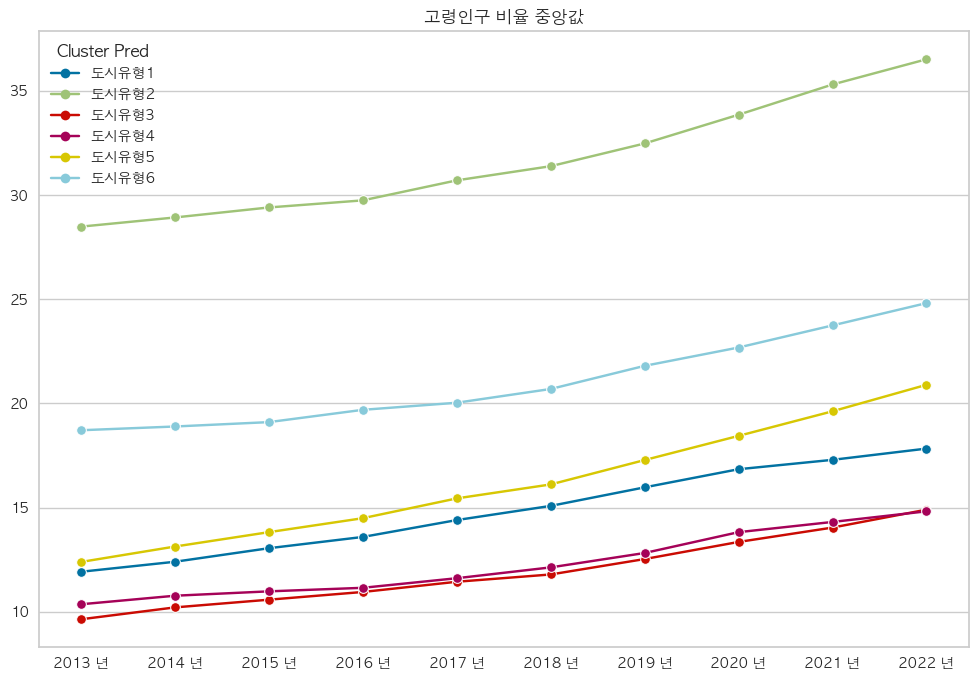

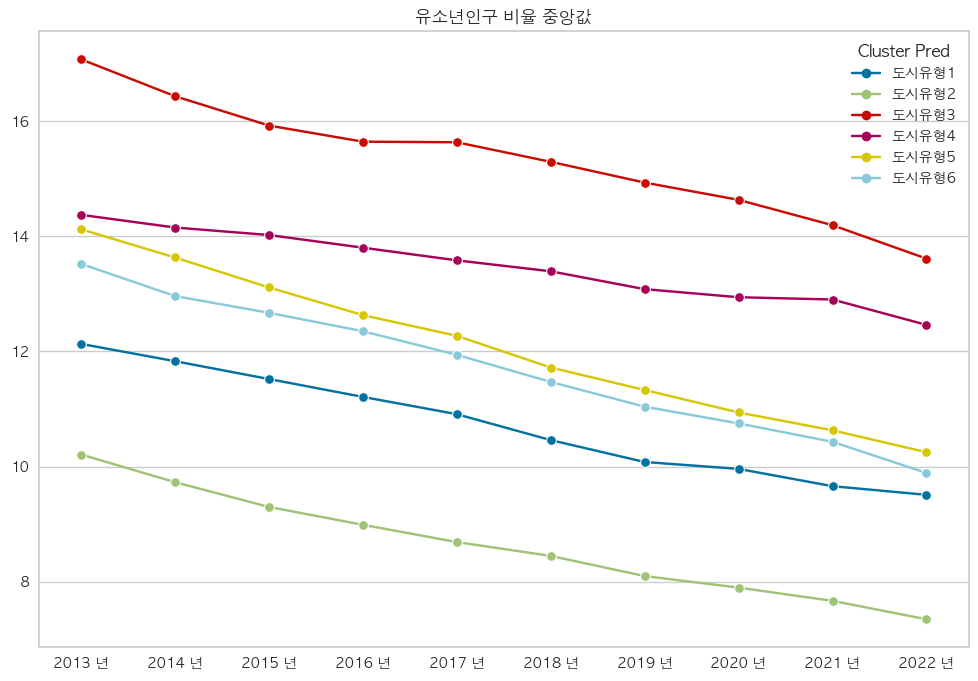

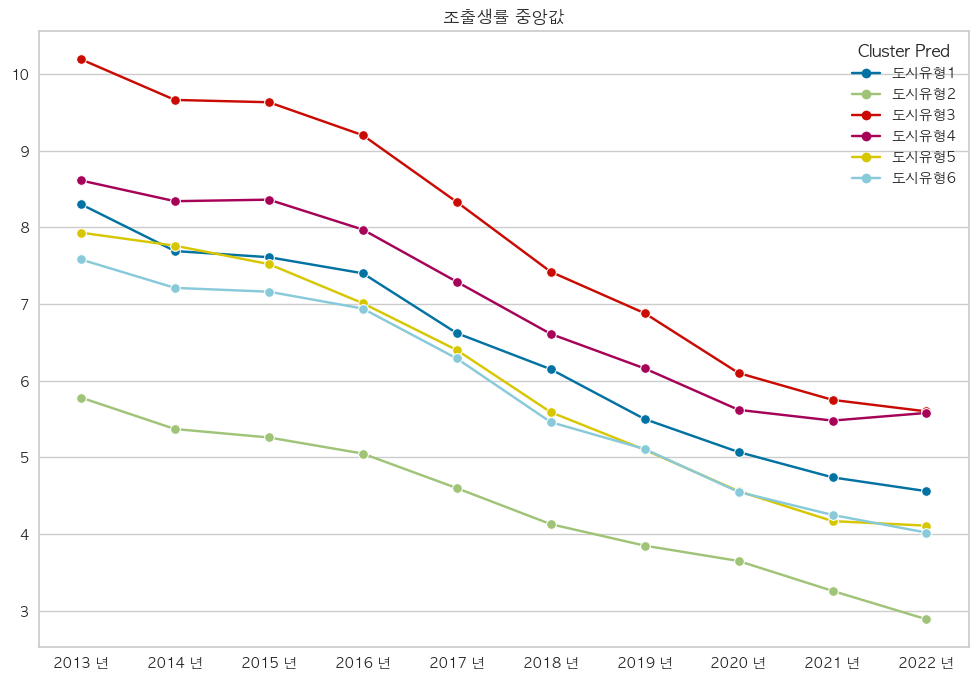

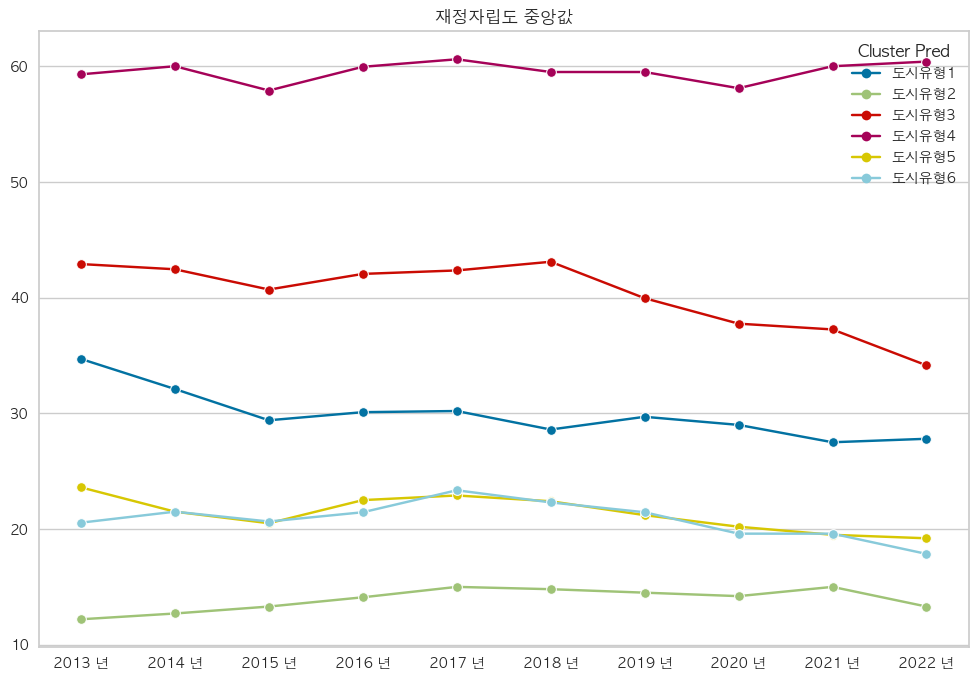

In [36]:
data_value_vis(mean_df_list, analysis_dict, '평균')
data_value_vis(median_df_list, analysis_dict, '중앙')

In [37]:
def data_cluster_vis(dataframe, best_k, columns_dict, type_name= '평균', use_columns= list(), yticks_list= list(), x_lw= 0):
    for k in range(best_k):
        # tmp_cluster_list = list()
        tmp_cluster_df = pd.DataFrame()
        for i, df in enumerate(dataframe):
            tmp_df = df[df['Cluster Pred'] == '도시유형{}'.format(k + 1)]
            tmp_df = tmp_df.drop(['Cluster Pred'], axis= 1)

            if '2012 년' in list(tmp_df.columns):
                tmp_df = tmp_df.drop(['2012 년'], axis= 1)

            tmp_df = tmp_df.T
            print(tmp_df.columns)
            tmp_df = tmp_df.rename(columns= {k : list(columns_dict.keys())[i]})

            # tmp_df = tmp_df.rename(columns= )
            # tmp_df['Value'] = list(analysis_dict.keys())[i]
            tmp_cluster_df = pd.concat([tmp_cluster_df, tmp_df], axis= 1)
            
            
            # tmp_cluster_list.append(tmp_df)
        # print(tmp_cluster_df.columns)
        if len(use_columns) > 0:
                tmp_cluster_df = tmp_cluster_df[use_columns]

        # return tmp_cluster_df
        # for i, vis_df in enumerate(tmp_cluster_list): 
        # plot_vis = df.set_index(['Cluster Pred']).T
        plot_title = '도시유형{}'.format(k + 1)

        plt.figure(figsize=(12, 8))

        if x_lw > 0:
            plt.axhline(0, lw= 2, c= 'gray')

        sns.lineplot(tmp_cluster_df, markers= 'o', dashes= False)
        plt.title('{} {}'.format(plot_title, type_name))
        # plt.legend(
        #     labels= plot_df.columns.tolist(), 
        #     bbox_to_anchor= (1, 1)
        # )
        if len(yticks_list) > 0:
             plt.yticks(yticks_list)
             
        plt.grid(False, axis= 'x')
        plt.savefig(SAVE_PATH + '{} {}값.png'.format(plot_title, type_name))

In [38]:
main_dict = {
    '조출생률' : ['Birth Rate', 'Rate', pop_birth_df],
    '유소년인구 비율' : ['Boyhood Rate', 'Rate', pop_boyhood_df],
    '청년가임인구 비율' : ['Childbearing Young Rate', 'Rate', young_rate_df],
    '소비활력인구 비율' : ['Prime & Consume Rate', 'Rate', prime_rate_df],
    '고령인구 비율' : ['Elder Rate', 'Rate', pop_elder_df],
    '외국인 비율' : ['Foreigner Rate', 'Rate', foreigner_rate_df],
}
print("시각화에 사용한 변수 개수: ", len(main_dict), "개")

시각화에 사용한 변수 개수:  6 개


In [39]:
etc_dict = {
    '연평균인구증감율' : ['Population CAGR', 'Rate', pop_cagr_df],
    '인구밀도' : ['Population Density', 'Rate', pop_density_df],
    '재정자립도' : ['Foreigner Rate', 'Rate', finance_df],
}
print("시각화에 사용한 변수 개수: ", len(etc_dict), "개")

시각화에 사용한 변수 개수:  3 개


Index([0], dtype='int64')
Index([0], dtype='int64')
Index([0], dtype='int64')
Index([0], dtype='int64')
Index([0], dtype='int64')
Index([0], dtype='int64')
Index([0], dtype='int64')
Index([0], dtype='int64')
Index([0], dtype='int64')
Index([0], dtype='int64')
Index([1], dtype='int64')
Index([1], dtype='int64')
Index([1], dtype='int64')
Index([1], dtype='int64')
Index([1], dtype='int64')
Index([1], dtype='int64')
Index([1], dtype='int64')
Index([1], dtype='int64')
Index([1], dtype='int64')
Index([1], dtype='int64')
Index([2], dtype='int64')
Index([2], dtype='int64')
Index([2], dtype='int64')
Index([2], dtype='int64')
Index([2], dtype='int64')
Index([2], dtype='int64')
Index([2], dtype='int64')
Index([2], dtype='int64')
Index([2], dtype='int64')
Index([2], dtype='int64')
Index([3], dtype='int64')
Index([3], dtype='int64')
Index([3], dtype='int64')
Index([3], dtype='int64')
Index([3], dtype='int64')
Index([3], dtype='int64')
Index([3], dtype='int64')
Index([3], dtype='int64')
Index([3], d

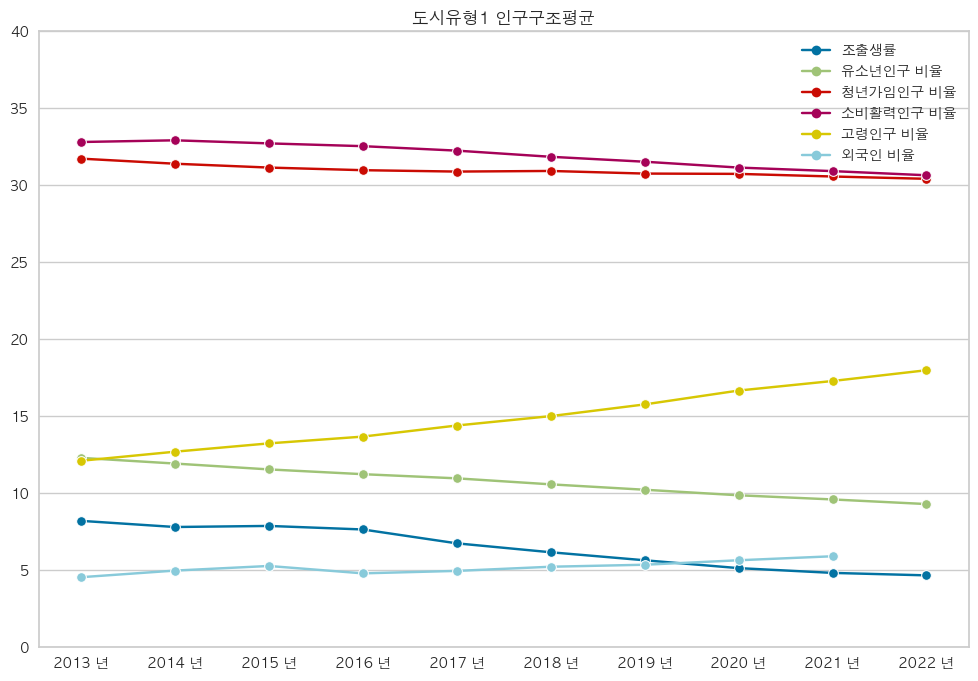

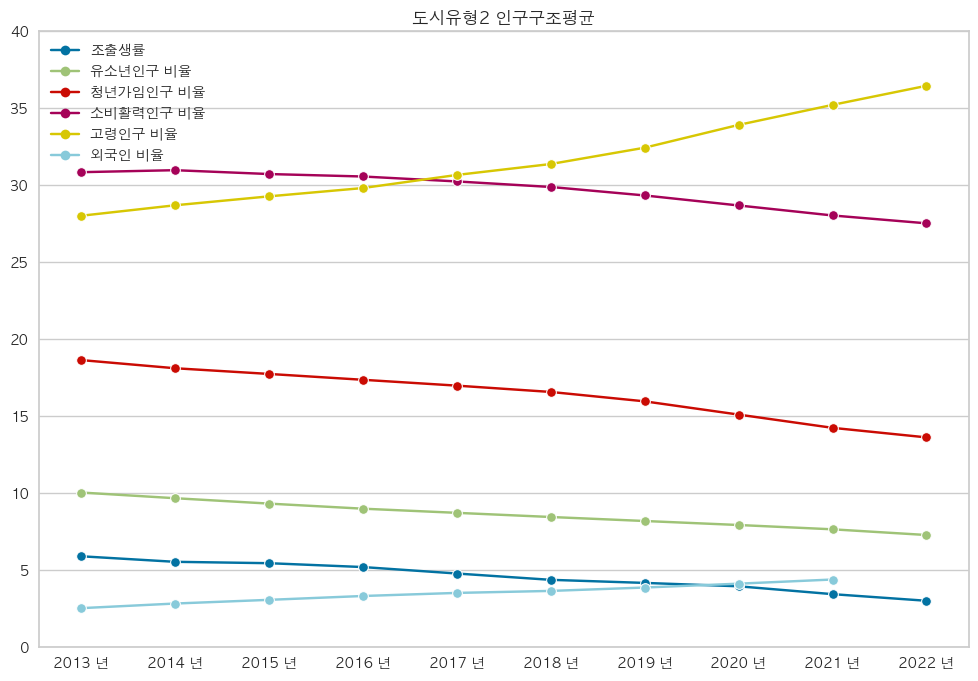

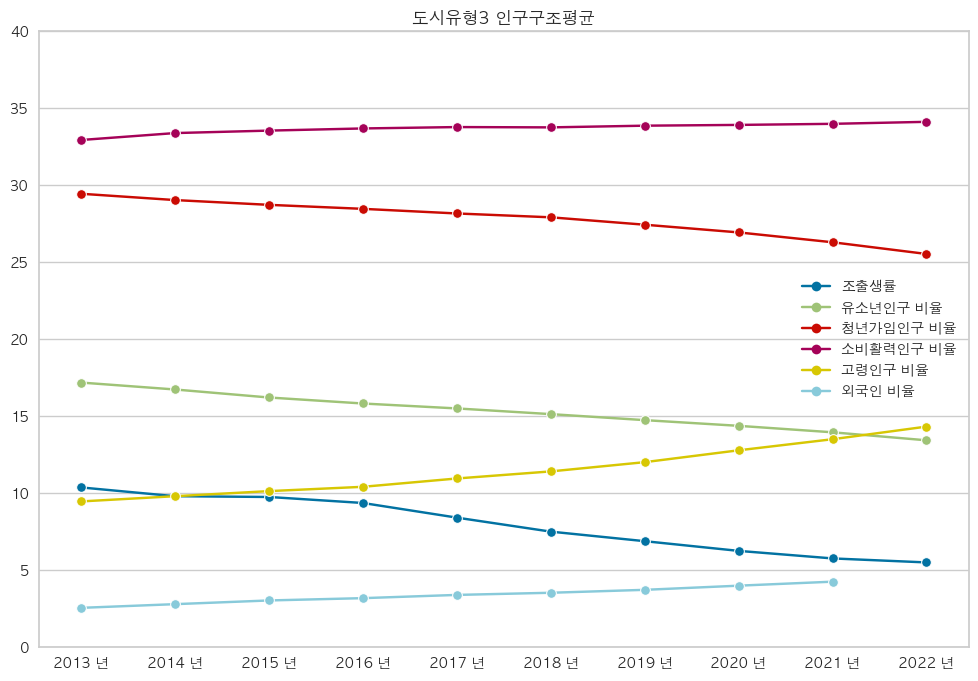

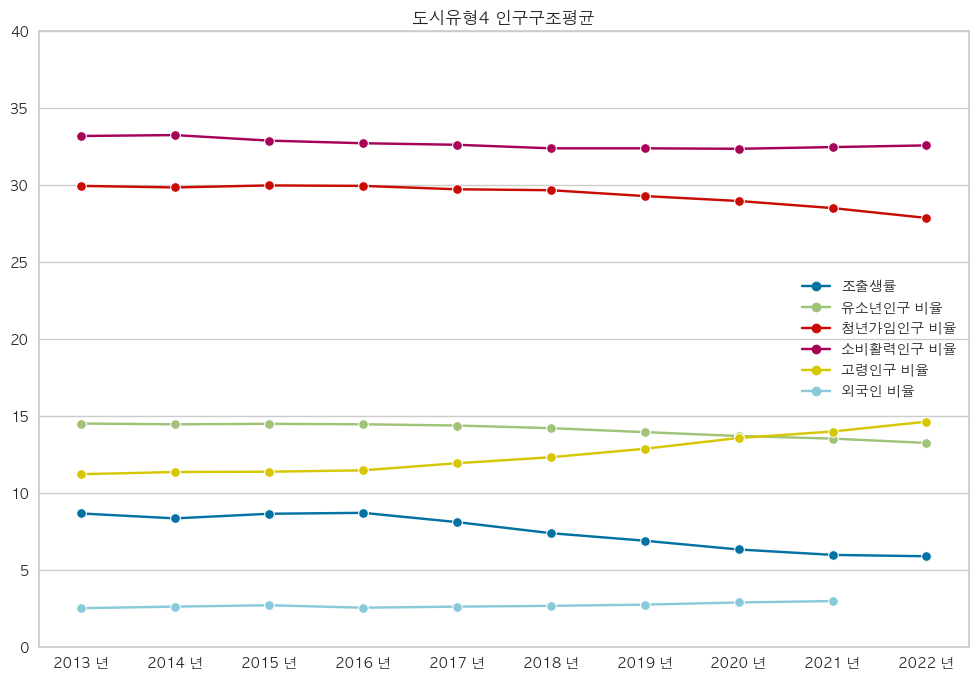

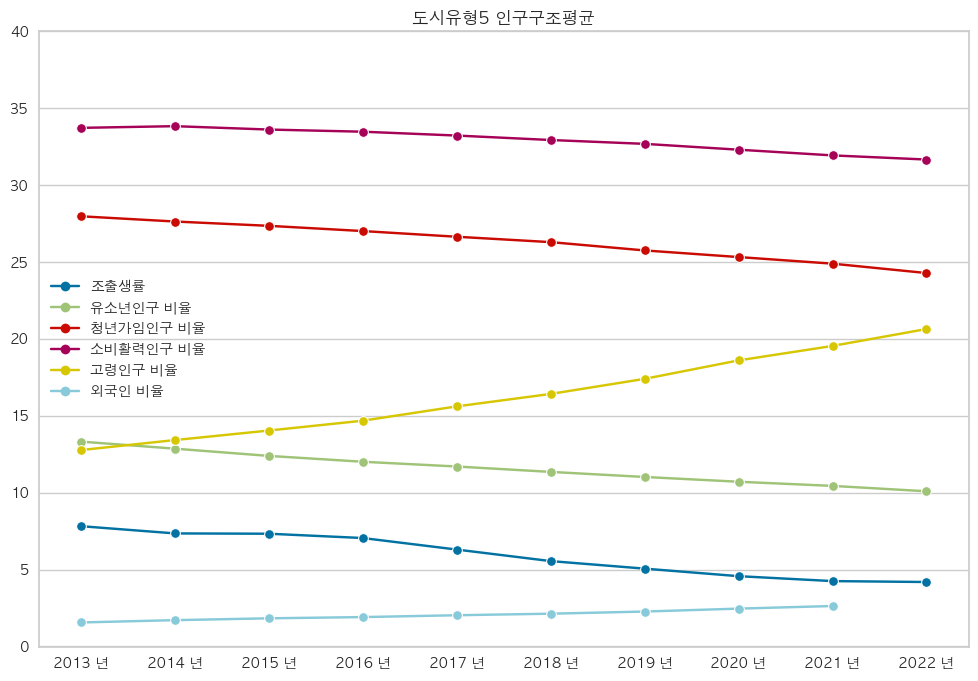

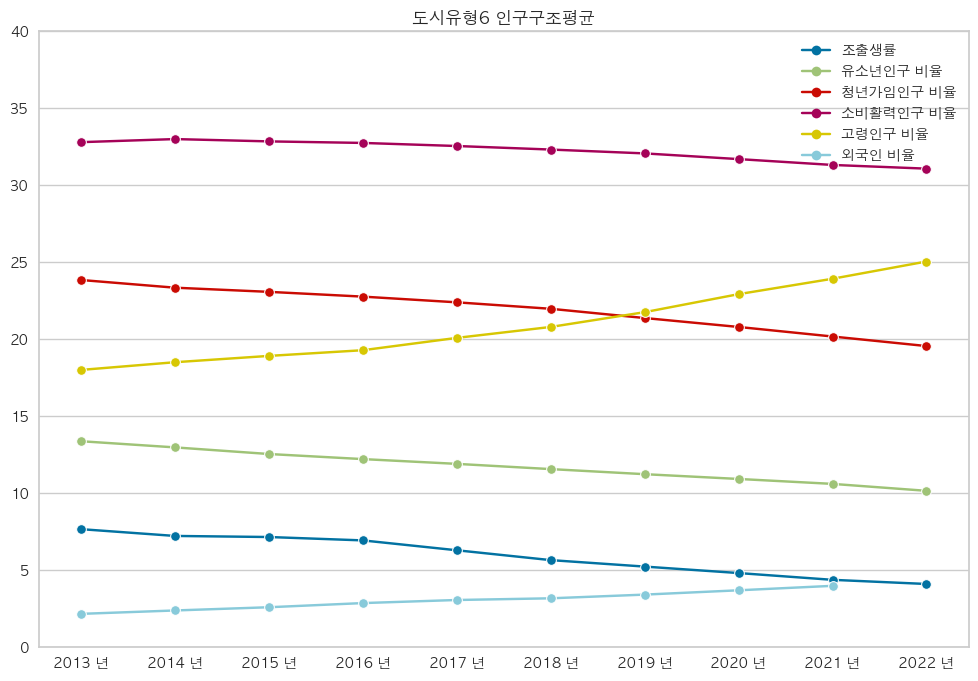

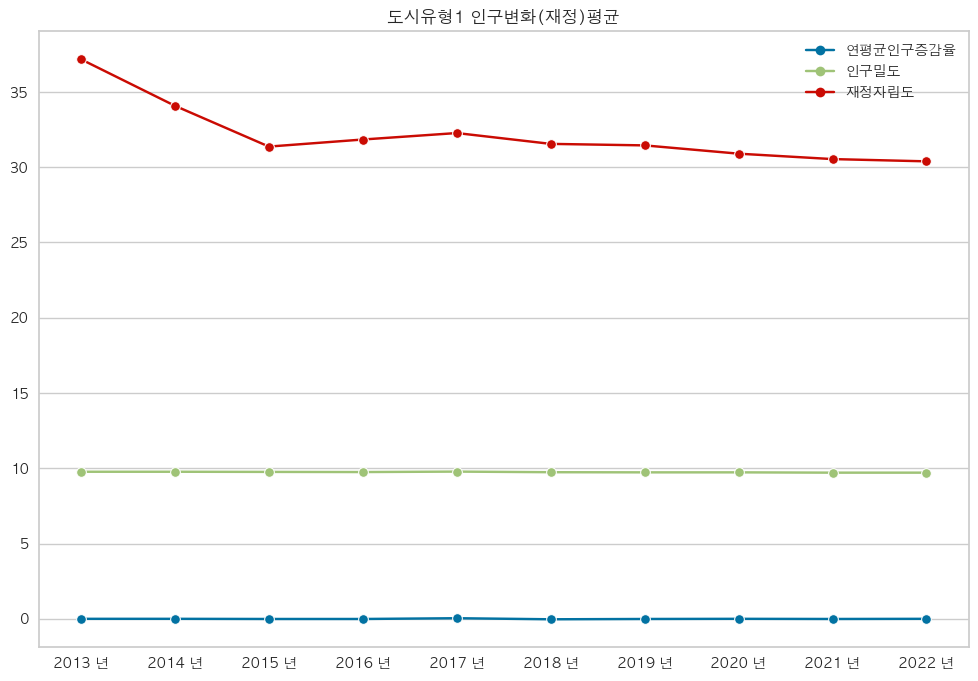

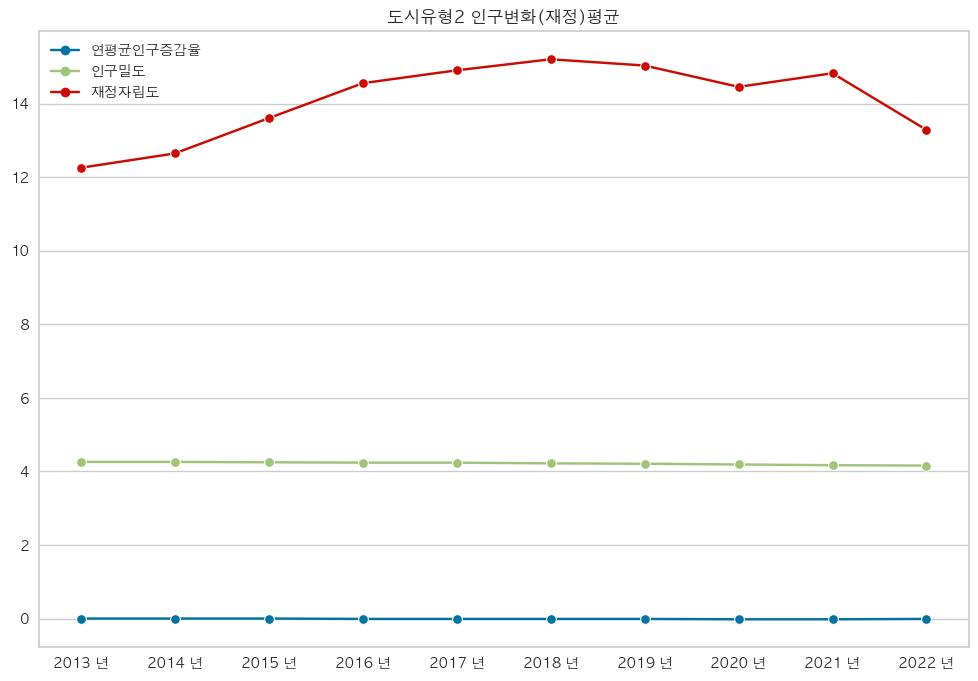

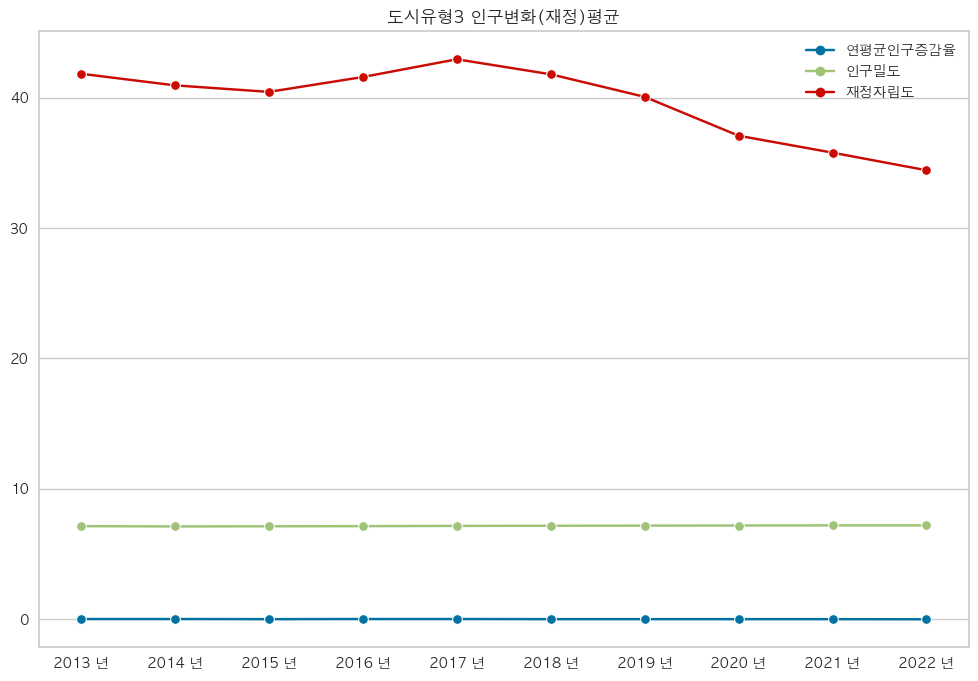

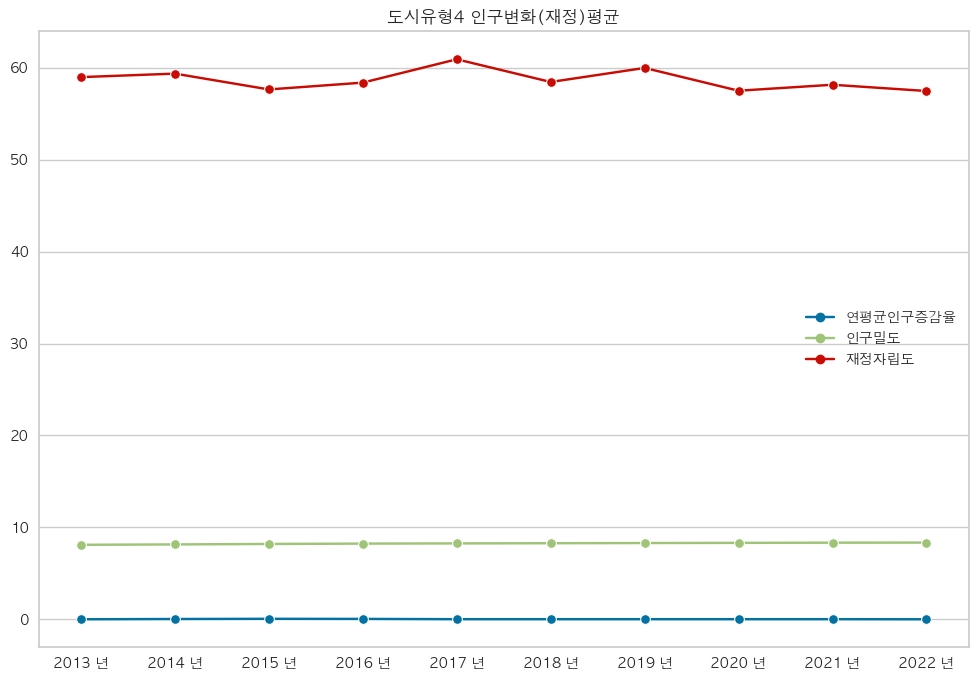

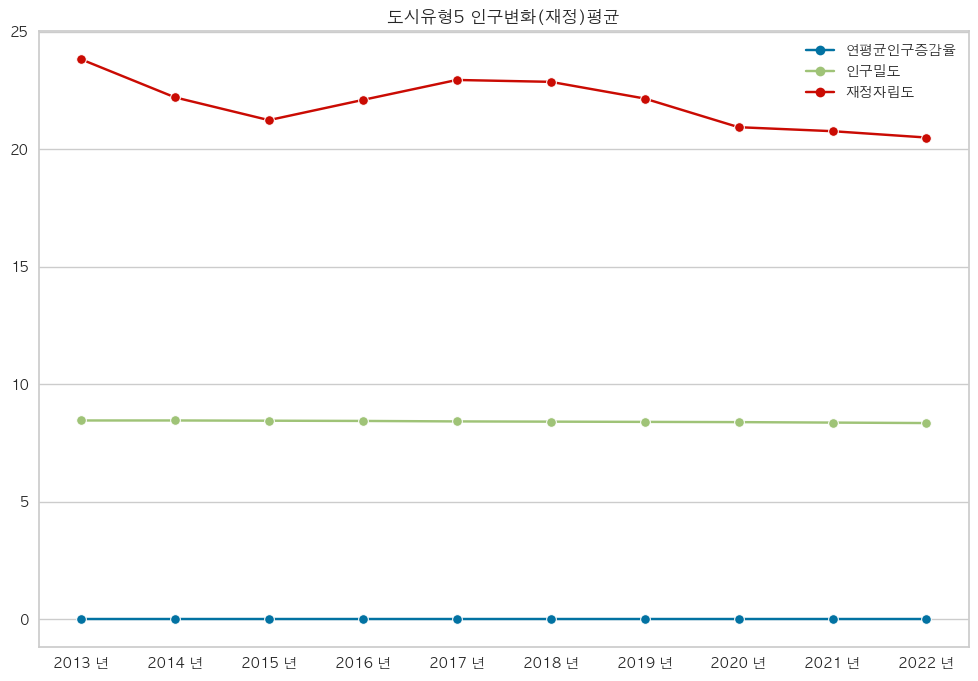

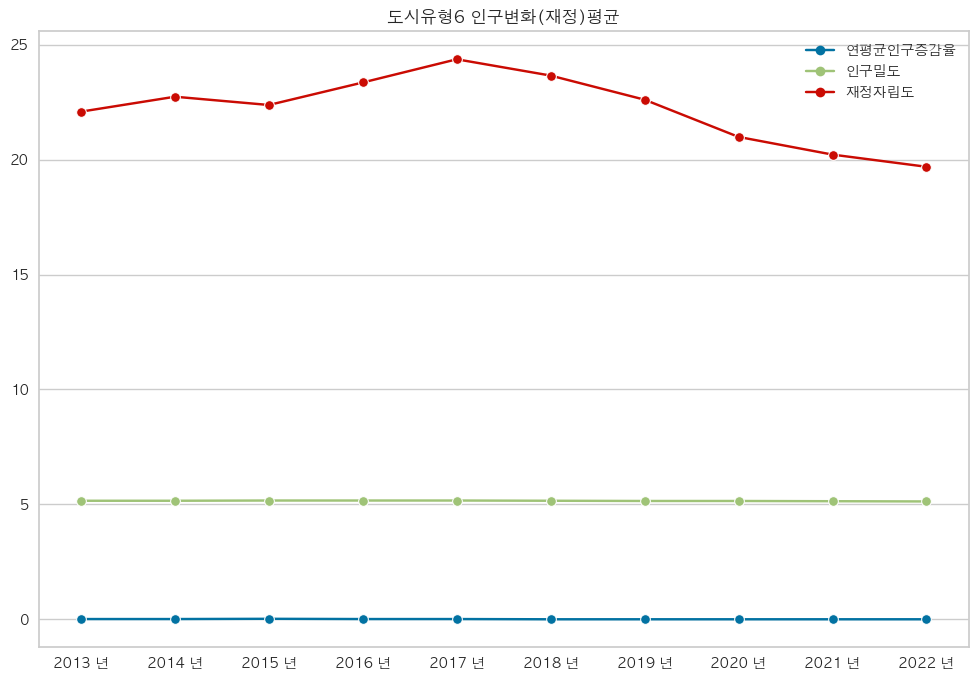

In [40]:
# data_cluster_vis(mean_df_list, best_k, analysis_dict, '평균')
# data_cluster_vis(median_df_list, best_k, analysis_dict, '중앙')

data_cluster_vis(mean_df_list, best_k, analysis_dict, '인구구조평균', list(main_dict.keys()), np.arange(0, 45, 5))
data_cluster_vis(mean_df_list, best_k, analysis_dict, '인구변화(재정)평균', list(etc_dict.keys()))

* 연령별 순이동률 시각화

In [41]:
move_dict = {
    '유소년 순이동률' : ['Boyhood Move', 'Rate', boyhood_move_df],
    '청년가임인구 순이동률' : ['Young Man Move', 'Rate', pop_youngman_move_df],
    '소비활력인구 순이동률' : ['Prime & Consume Move', 'Rate', pop_prime_move_df],
    '고령화인구 순이동률' : ['Elder Move', 'Rate', pop_elder_move_df],
    '전체인구 순이동률' : ['Total Move', 'Rate', total_move_df],
}

In [42]:
scaler_model_move_list = list()

for file_name in move_dict.keys():
    tmp_model = load(open(SAVE_PATH + 'MinMaxScaler_{}.pkl'.format(file_name), 'rb'))
    scaler_model_move_list.append(tmp_model)

In [43]:
real_values_move_list = list()

for i, key in enumerate(move_dict.keys()):
    tmp_value = inverse_minmaxscaler_func(move_dict[key][-1], scaler_model_move_list[i])
    tmp_value = pre_merge_func(tmp_value, pred_df)
    real_values_move_list.append(tmp_value)

In [44]:
mean_df_move_list = list()

for i, key in enumerate(move_dict.keys()):
    mean_df = real_values_move_list[i].drop(['행정구역(시도)', '행정구역(시군구)별'], axis= 1).groupby(['Cluster Pred']).mean()
    mean_df = np.round(mean_df, 2)
    mean_df = mean_df.reset_index(drop= False)
    mean_df.to_excel(SAVE_PATH + 'mean_move_{}.xlsx'.format(key), index= False)
    mean_df_move_list.append(mean_df)

median_df_move_list = list()

for i, key in enumerate(move_dict.keys()):
    median_df = real_values_move_list[i].drop(['행정구역(시도)', '행정구역(시군구)별'], axis= 1).groupby(['Cluster Pred']).median()
    median_df = np.round(median_df, 2)
    median_df = median_df.reset_index(drop= False)
    median_df.to_excel(SAVE_PATH + 'median_move_{}.xlsx'.format(key), index= False)
    median_df_move_list.append(median_df)

In [45]:
def data_cluster_vis(dataframe, best_k, columns_dict, type_name= '평균', use_columns= list(), yticks_list= list(), x_lw= 0):
    for k in range(best_k):
        # tmp_cluster_list = list()
        tmp_cluster_df = pd.DataFrame()
        for i, df in enumerate(dataframe):
            print(k)
            tmp_df = df[df['Cluster Pred'] == (k + 1)]
            tmp_df = tmp_df.drop(['Cluster Pred'], axis= 1)

            if '2012 년' in list(tmp_df.columns):
                tmp_df = tmp_df.drop(['2012 년'], axis= 1)

            tmp_df = tmp_df.T
            print(tmp_df.columns)
            tmp_df = tmp_df.rename(columns= {k : list(columns_dict.keys())[i]})

            # tmp_df = tmp_df.rename(columns= )
            # tmp_df['Value'] = list(analysis_dict.keys())[i]
            tmp_cluster_df = pd.concat([tmp_cluster_df, tmp_df], axis= 1)
            
            
            # tmp_cluster_list.append(tmp_df)
        # print(tmp_cluster_df.columns)
        if len(use_columns) > 0:
                tmp_cluster_df = tmp_cluster_df[use_columns]

        # return tmp_cluster_df
        # for i, vis_df in enumerate(tmp_cluster_list): 
        # plot_vis = df.set_index(['Cluster Pred']).T
        plot_title = '도시유형{}'.format(k + 1)

        plt.figure(figsize=(12, 8))

        if x_lw > 0:
            plt.axhline(0, lw= 2, c= 'gray')

        sns.lineplot(tmp_cluster_df, markers= 'o', dashes= False)
        plt.title('{} {}'.format(plot_title, type_name))
        # plt.legend(
        #     labels= plot_df.columns.tolist(), 
        #     bbox_to_anchor= (1, 1)
        # )
        if len(yticks_list) > 0:
             plt.yticks(yticks_list)
             
        plt.grid(False, axis= 'x')
        plt.savefig(SAVE_PATH + '{} {}값.png'.format(plot_title, type_name))

In [46]:
mean_df_move_list[0]['Cluster Pred'][0]

1

0
Index([0], dtype='int64')
0
Index([0], dtype='int64')
0
Index([0], dtype='int64')
0
Index([0], dtype='int64')
0
Index([0], dtype='int64')
1
Index([1], dtype='int64')
1
Index([1], dtype='int64')
1
Index([1], dtype='int64')
1
Index([1], dtype='int64')
1
Index([1], dtype='int64')
2
Index([2], dtype='int64')
2
Index([2], dtype='int64')
2
Index([2], dtype='int64')
2
Index([2], dtype='int64')
2
Index([2], dtype='int64')
3
Index([3], dtype='int64')
3
Index([3], dtype='int64')
3
Index([3], dtype='int64')
3
Index([3], dtype='int64')
3
Index([3], dtype='int64')
4
Index([4], dtype='int64')
4
Index([4], dtype='int64')
4
Index([4], dtype='int64')
4
Index([4], dtype='int64')
4
Index([4], dtype='int64')
5
Index([5], dtype='int64')
5
Index([5], dtype='int64')
5
Index([5], dtype='int64')
5
Index([5], dtype='int64')
5
Index([5], dtype='int64')


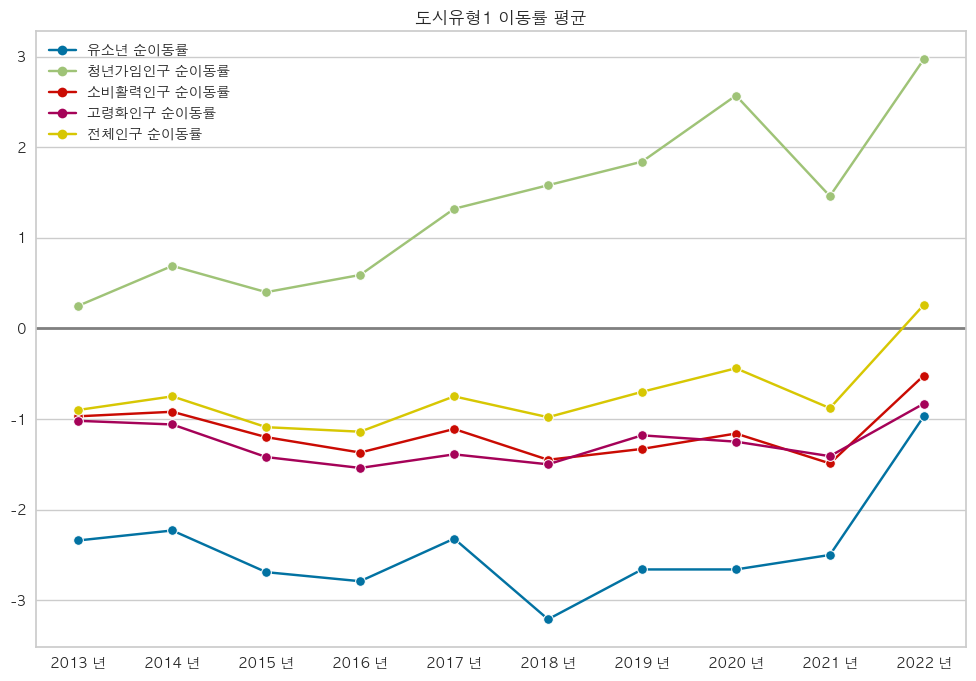

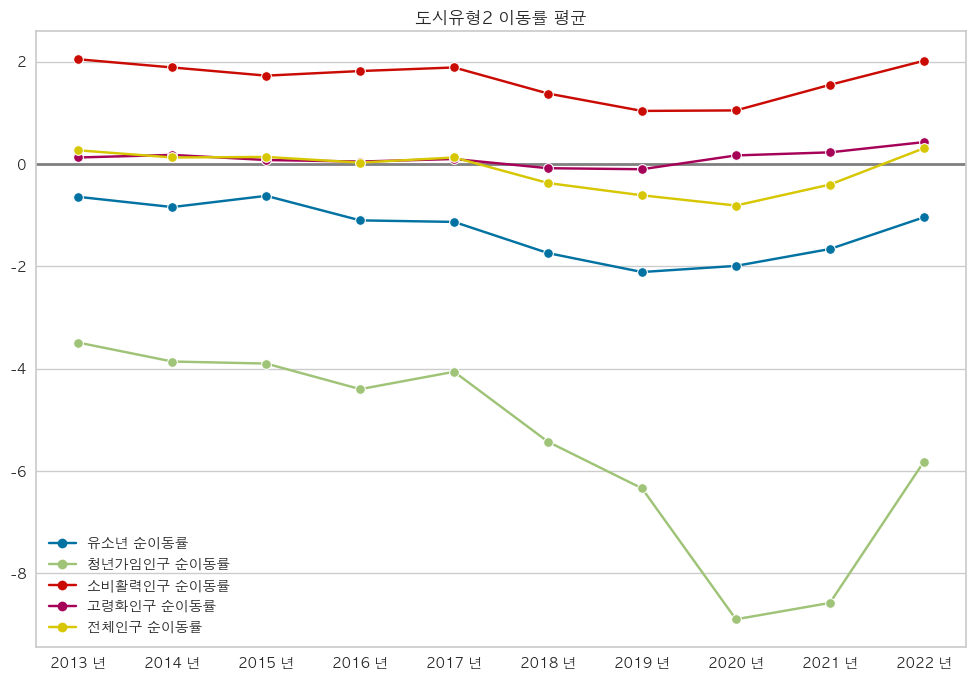

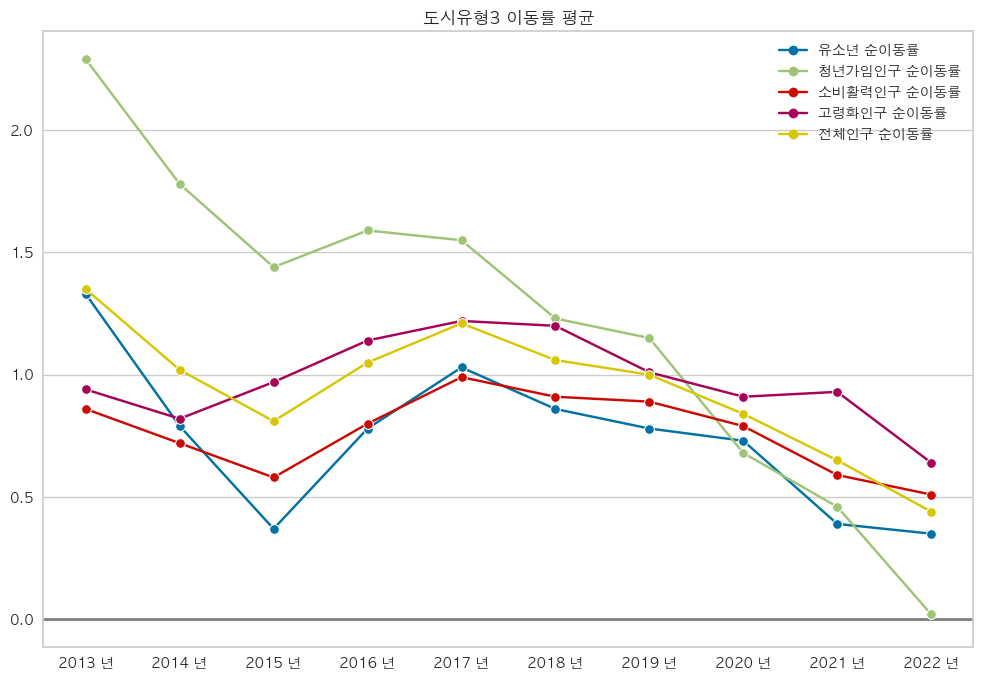

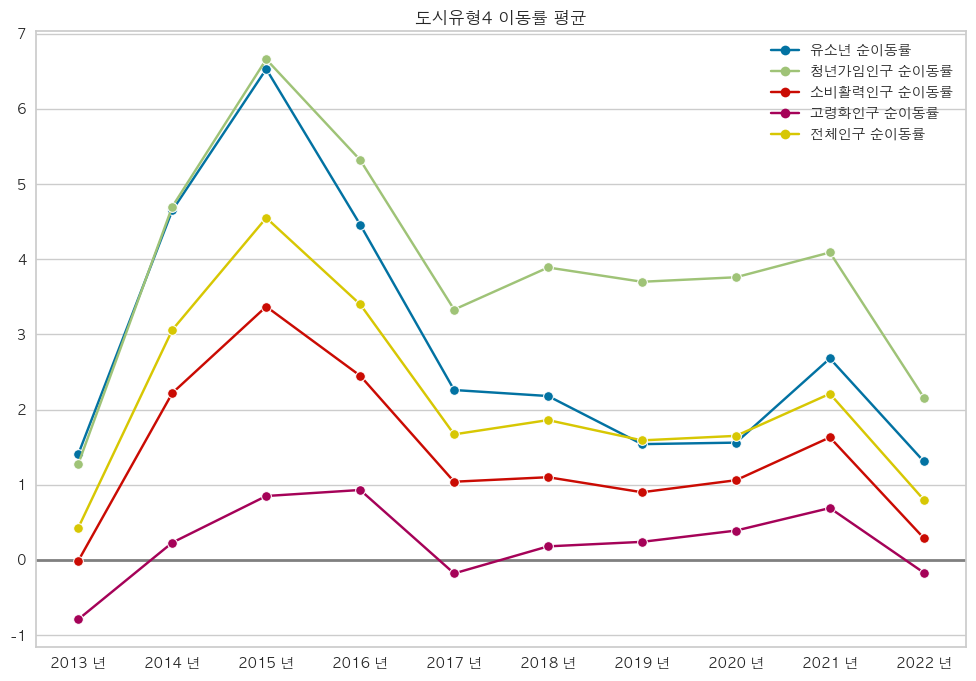

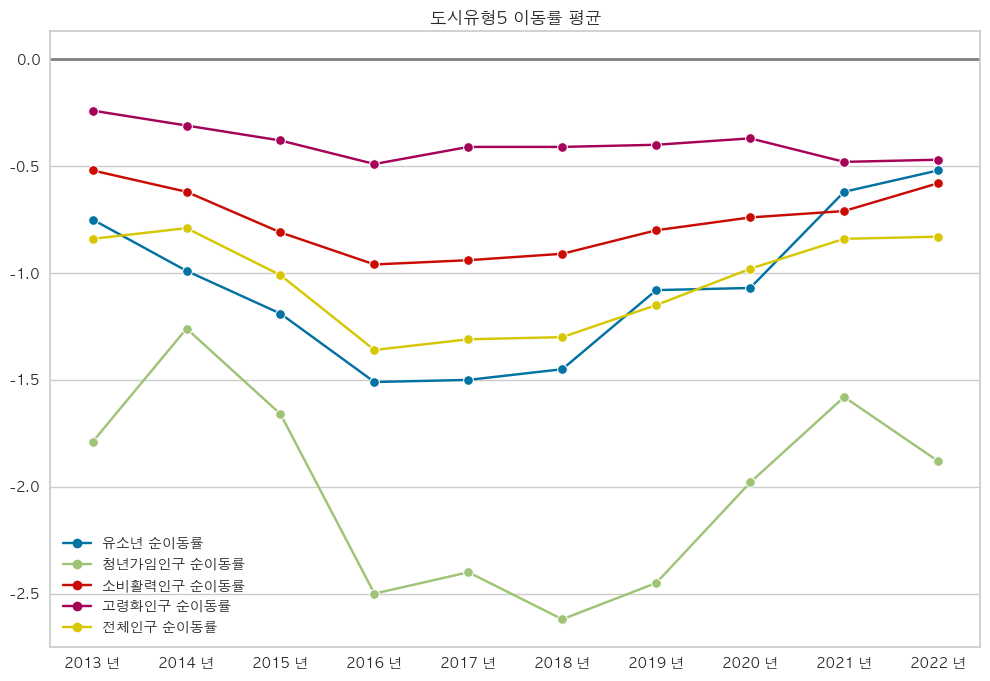

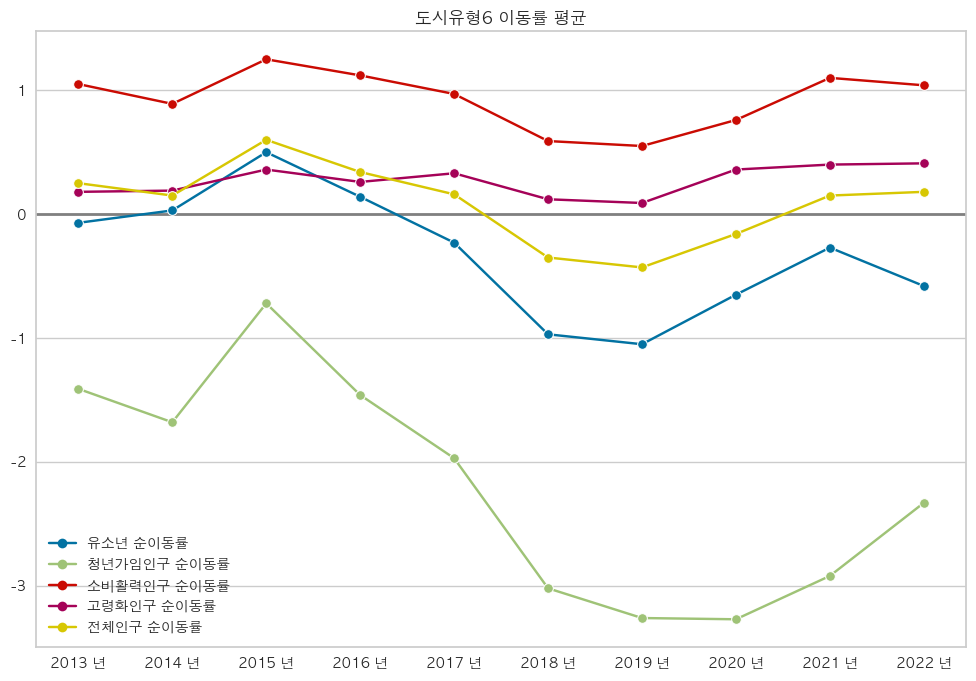

In [47]:
# data_value_vis(mean_df_move_list, move_dict, '이동률 평균')
# data_value_vis(median_df_move_list, move_dict, '이동률 중앙')
data_cluster_vis(mean_df_move_list, best_k, move_dict, '이동률 평균', x_lw= 2)
# data_cluster_vis(median_df_move_list, best_k, move_dict, '이동률 중앙')

* 도시유형화 계보 만들기

In [48]:
kmeans_model = load(open('./Data/한미연_도시유형화/TimeSereies_Cluster_Best_Model.pkl', 'rb'))

pred_timeseries_df = pd.DataFrame()
pred_start_year = 2033

for i, key in enumerate(analysis_dict.keys()):
    tmp_df = pd.read_excel('./Data/한미연_도시유형화/예측데이터/[{}] Centerios.xlsx'.format(key))
    # tmp_df = tmp_df.reset_index(drop= False)
    tmp_df = tmp_df.rename(columns= {'Unnamed: 0' : 'Cluster Pred'})
    # print(tmp_df.head())
    tmp_columns_list = [list(tmp_df.columns)[0]]
    add_year_list = list(tmp_df.columns)[pred_start_year - 2012 : pred_start_year + 10 - 2012]
    tmp_columns_list.extend(add_year_list)
    tmp_df = tmp_df[tmp_columns_list]

    if i == 0:
        print(tmp_df.columns)

    tmp_scaler = load(open(SAVE_PATH + 'MinMaxScaler_{}.pkl'.format(file_name), 'rb'))
    tmp_values = tmp_df.drop(['Cluster Pred'], axis= 1)
    # scaler_values = tmp_scaler.transform(tmp_values.values)
    # tmp_values = pd.DataFrame(scaler_values, columns= tmp_values.columns)

    tmp_df = pd.concat([tmp_df[['Cluster Pred']], tmp_values], axis= 1)

    pred_timeseries_df = pp.mk_analysis_dataframe(
        pred_timeseries_df, tmp_df, key,
        columns= ['Cluster Pred']
    )

# pred_timeseries_df.head()

timesereis_preprocessing_data = np.array(pred_timeseries_df[list(analysis_dict.keys())].values.tolist())
timeseries_flatten = np.reshape(timesereis_preprocessing_data, (timesereis_preprocessing_data.shape[0], -1))

y_pred = kmeans_model.predict(timeseries_flatten)
y_pred = y_pred + 1
print(y_pred)

FileNotFoundError: [Errno 2] No such file or directory: './Data/한미연_도시유형화/예측데이터/[청년가임인구 비율] Centerios.xlsx'

In [ ]:
# from tslearn.metrics import dtw

# cluster_center = kmeans_model.cluster_centers_
# cluster_labels = kmeans_model.labels_

# print('timeseries_data:', timesereis_preprocessing_data.shape)
# print('timeseries_flatten:', timeseries_flatten.shape)
# print('center:', cluster_center.shape)
# print('labels:' , cluster_labels.shape)

# raw_timeseries_data = np.array(self.timeseries_data[list(self.analysis_columns_dict.keys())].values.tolist())
# distance_pred = [dtw(timesereis_preprocessing_data[i], cluster_center[y_pred[i]]) for i in range(len(timeseries_flatten))]
# distance_df = pd.Series(distance_pred, name= 'distance').to_frame()
# distance_df = pd.concat([self.pre_df[['행정구역(시도)', '행정구역(시군구)별', 'Cluster Pred']], distance_df], axis= 1)
# print(distance_pred)